In [1]:
# State the parameters of the pipeline

disk = '/mnt/pre_epi_seizures/'
baseline_files = 'h5_files/processing_datasets/baseline_datasets_new'
seizure_files = 'h5_files/processing_datasets/seizure_datasets_new'


# Exploratory Data Analysis
from classification.load_for_class import *
import convertpandas as cv_pd
import pandas as pd
import sklearn.preprocessing as pp
from sklearn.kernel_approximation import RBFSampler
from interim_processing import *
import iopes

# Set parameters of analyssis
feature_slot = 'pca_beat_amp_computation'

# Chose hyper-parameters of acquisition (ix of saved files)
hyper_param = 0


patient_list = [5]
lead_list = ['ECG-']
scaler = pp.StandardScaler()
rbf_feature = RBFSampler(gamma=1, random_state=1)
interim_processing = [scaler]
hist_bins = None
dist = None
flag_hist = True
flag_andrews = True
flag_series = True
flag_box = True
flag_pair = True
assign_baseline = 'assign_equal_baseline_seizure'
label_struct = {
                        'inter_ictal':{
                            'label': 'Inter-Ictal Data Points',
                            'color': 'blue',
                            'intervals_samples': [(1000 * 0 * 60, 1000 * 0 * 60 )]
                                     },
                        'pre_ictal':{
                            'label': 'Pre-Ictal data points',
                            'color': 'yellow',
                            'intervals_samples': [(1000 * 20 * 60, 1000 * 49 * 60 )]
                                     },
                        'ictal':{
                            'label': 'Ictal data points',
                            'color': 'red',
                            'intervals_samples': [(1000 * 50 * 60, 1000 * 55 * 60 )]
                                 },
                        }
baseline_label_struct = {
                         'baseline':{
                            'label': 'Baseline Data Points',
                            'color': 'green',
                            'intervals_samples': [(0, 1000 * 120 * 60 )]
                                    },
                        }

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
eda_dir = 'EDAnalysis/'

eda_id = iopes.get_eda_params_path(disk=disk,
                                    eda_dir=eda_dir,
                                    patient_list = patient_list,
                                    lead_list = lead_list,
                                    scaler = scaler,
                                    interim_processing = interim_processing,
                                    hist_bins = hist_bins,
                                    dist = dist,
                                    flag_hist = flag_hist,
                                    flag_andrews = flag_andrews,
                                    flag_series = flag_series,
                                    flag_box = flag_box,
                                    assign_baseline = assign_baseline,
                                    label_struct = label_struct,
                                    baseline_label_struct = baseline_label_struct)
path = disk + eda_dir + eda_id + '/'

('flag_box', True)('flag_series', True)('dist', None)('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))('lead_list', ['ECG-'])('interim_processing', [StandardScaler(copy=True, with_mean=True, with_std=True)])('flag_hist', True)('assign_baseline', 'assign_equal_baseline_seizure')('label_struct', {'pre_ictal': {'color': 'yellow', 'intervals_samples': [(1200000, 2940000)], 'label': 'Pre-Ictal data points'}, 'inter_ictal': {'color': 'blue', 'intervals_samples': [(0, 0)], 'label': 'Inter-Ictal Data Points'}, 'ictal': {'color': 'red', 'intervals_samples': [(3000000, 3300000)], 'label': 'Ictal data points'}})('baseline_label_struct', {'baseline': {'color': 'green', 'intervals_samples': [(0, 7200000)], 'label': 'Baseline Data Points'}})('flag_andrews', True)('patient_list', [5])('hist_bins', None)


/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['params', 'id']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [3]:
if not os.path.exists(path):
    os.mkdir(path)

In [4]:
# Ingest Seizure Data
path_to_load = disk + seizure_files + '.h5'
path_to_map = disk + seizure_files + '_map.txt'

# Feature group to analyse -- point of entry
feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[hyper_param]

print feature_name


seizure_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, label_struct)
seizure_data

[2018-04-12 02:16:14.854007]:get_signal:20:Loading [signal: 5_FA7773TC_ECG-_2016-08-23 08:24:24.000000_0][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_]


/3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_


[2018-04-12 02:16:15.245160]:get_signal:20:Loading [signal: 5_FA7773TT_ECG-_2016-08-24 13:48:00.000000_1][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_]
[2018-04-12 02:16:15.248580]:get_signal:20:Loading [signal: 5_FA7773U1_ECG-_2016-08-25 01:44:21.000000_2][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_end

[2018-04-12 02:16:15.285088]:get_signal:20:Loading [signal: window_5_FA7773TC_ECG-_2016-08-23 08:24:24.000000_0][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_]
[2018-04-12 02:16:15.285909]:get_signal:20:Loading [signal: window_5_FA7773TT_ECG-_2016-08-24 13:48:00.000000_1][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_metho

closed
closed
closed
data
5
0
data
5
1
data
5
2
data
5
3
data
5
4
data
5
5
data
5
6
data
5
7
Empty data passed with indices specified.


eig_value_1  eig_value_2  eig_value_3  eig_value_4   eig_value_5  \
0        2.066526     6.512721    36.545376   324.581275  33065.019084   
1        1.389886     6.556581    33.202390   280.888256  33353.493583   
2        6.044573    12.410503    92.558268  6014.976410  29518.966735   
3        0.337362    11.869073    21.127745  6127.136882  30195.987944   
4        0.284447    10.080564    57.095211  5984.991107  28510.410816   
5        1.391178    11.914525    54.890970  5863.886916  27523.626379   
6        0.805308     9.166212    61.504795  5936.369229  26935.019456   
7        0.838756     9.379792    63.552239  6032.463048  27090.154601   
8        2.779764    10.375664    56.798350  6158.605340  28906.500082   
9        1.215221    12.327794    24.428216  6270.369282  29700.323962   
10       1.523505    12.287392    42.954941  6239.158116  28932.616059   
11       2.059819    14.983430    42.496258  8713.285891  24154.539426   
12       1.641900    11.682995    41.129159  3894.705068  28405.192775   
13       4.403683    16.837914    54.834269  4073.705183  29365.337891   
14       8.357365    33.479767   130.479344  4105.828710  30533.702142   
15       1.805076    22.372186   124.700781  8229.433810  27298.549513   
16       8.026122    37.236896   158.806069  4811.917856  30198.356308   
17      10.459706    35.415358   151.159258  4880.866612  29019.849833   
18      13.363499    32.512854    68.480551  4649.182503  27477.594112   
19       6.980112    28.935882    57.683829  4605.491761  27191.491502   
20       6.030091    28.909513    49.944925  6201.291669  27667.023615   
21      10.633324    16.537840    41.889114  6303.198254  29003.575769   
22      10.329375    19.870199    32.938952  6109.091460  27896.222585   
23      17.013153    18.067501    66.747470  6025.584054  27798.010954   
24       1.071849    21.016872    38.582501  5872.284255  27815.978511   
25       1.610187    21.052867    38.450805  5055.010206  27741.812064   
26       8.828752    32.627354    46.643937  8942.178006  26736.068052   
27      10.543538    22.172056    45.653339  8938.617729  28657.572785   
28      11.557490    31.781879    42.674614  7687.716384  27935.740889   
29       5.472893    35.765895    59.535058  6114.141050  27515.290749   
...           ...          ...          ...          ...           ...   
7073    11.288902    28.338344    65.289328   200.766541  50819.117312   
7074    11.851028    43.599967    63.120467   154.144050  48648.192485   
7075    18.522086    25.041602    56.845202   241.693497  42712.747548   
7076     7.442073    22.169501    72.387827   244.242073  40585.347435   
7077     6.222836    45.691311    55.786090    83.080646  40149.033666   
7078     5.610571    22.591328    69.961231    81.013341  42615.481581   
7079    18.177616    24.546212    45.591256   295.227285  44367.227368   
7080     5.198654    20.998389    78.605264   296.897072  43849.863652   
7081    19.503568    27.643615    94.326354   279.284803  43008.098242   
7082     5.864201    34.599029    74.782410   278.894735  41698.196267   
7083     7.047925     8.919534   109.711330   398.919919  39424.513540   
7084     3.298189    22.182935    60.075607   255.108340  39164.608095   
7085     4.449210    20.385751    88.234606   151.966578  41060.598377   
7086     1.650593    15.628262    90.949732   139.173286  41654.628899   
7087     1.716800    27.396612    83.586045   244.226201  42705.361381   
7088    13.485829    36.448796    76.989296   186.308691  42446.405206   
7089     5.497459    31.062955    39.642078   212.574199  39850.318640   
7090     4.849635     6.120408    37.132271   244.451248  37620.241494   
7091     4.892043    36.839333    99.031655   346.313558  37213.619682   
7092     1.013897    25.196387    96.203661   229.946166  37296.162679   
7093     4.765491    19.802755    89.337560   199.434105  39295.339472   
7094     7.450285    54.559526   100.423246   402.735679  41593.420684   
7095    15

In [5]:
# Ingest Baseline Data

# set Labeling structure
path_to_load = disk + baseline_files + '.h5'
path_to_map = disk + baseline_files + '_map.txt'

# Feature group to analyse -- point of entry
feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[0]

print feature_name

baseline_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, baseline_label_struct)

baseline_data

[2018-04-12 02:16:15.370569]:get_signal:20:Loading [signal: 5_FA7773TA_ECG-_2016-08-23 04:23:59.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_]
[2018-04-12 02:16:15.371649]:get_signal:20:Loading [signal: 5_FA7773TB_ECG-_2016-08-23 06:24:12.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_com

/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_
closed
closed
closed
data
5
0
data
5
0


eig_value_1  eig_value_2  eig_value_3  eig_value_4   eig_value_5  \
0        0.575724     7.767423    23.952340   100.800725  30557.631898   
1        1.792966     6.771575    20.674260   109.367920  30539.597891   
2        2.052845     3.938696    16.082790    96.514907  31442.903044   
3        0.835127     2.391083    22.146784    84.701039  31855.977498   
4        1.371964     4.349529    18.581972    61.922027  32309.816860   
5        1.386555     4.596082    36.677110   104.637076  32253.378656   
6        1.222065     9.379530    29.327831   106.634836  32687.583698   
7        2.533762    12.764791    33.972638   107.221484  33225.212462   
8        3.652466    10.251013    25.014885   170.979811  32531.663882   
9        2.752621     4.511827    29.671844   159.727829  31567.982445   
10       1.896337    14.127183    24.094498   138.241870  32139.553872   
11       1.519704    14.610416    26.989278   148.110935  32800.104037   
12       2.400705    16.691415    35.250273   163.535515  32995.586323   
13       5.037357    19.671287    36.090304   106.835854  33412.678659   
14       0.431960    25.725943    33.728235    89.204132  33247.594686   
15       0.381180    15.798043    26.085578    43.634453  32672.221949   
16       2.007819    16.609423    32.497626    43.980869  32437.753096   
17       5.925085    10.394075    27.503293    33.861125  32649.779115   
18       0.473381    12.295580    19.755777    31.986185  32948.565907   
19       0.566176     9.886758    18.343937    34.568980  32547.574536   
20       0.520256     1.502286    23.778529    28.715331  31621.129503   
21       0.849060     7.719387    11.783728    29.665940  31834.460562   
22       1.456702     9.501468    17.307578    22.818093  31808.890409   
23       0.500615     3.513653    20.383776    23.484651  31996.445225   
24       0.549026     7.345548    19.937736    27.886923  31955.996051   
25       0.959001     3.660276    21.736249    44.566300  31942.722937   
26       1.134733     3.919344    13.630141    45.571913  31201.562228   
27       1.905066     4.230331    25.760307    48.468032  31371.008631   
28       1.026819     2.886643    17.227840    55.349322  32540.380517   
29       0.508421     2.714808    14.773280    44.647002  33485.096979   
...           ...          ...          ...          ...           ...   
7808     0.687668     6.847263    20.043819    70.883478  10389.205327   
7809     0.968173    16.308191    25.151608    60.002072  10233.546657   
7810     3.196383     8.654692    39.734381    79.794975  11363.553962   
7811     3.608609     8.301003    59.790702    89.445090  11221.939639   
7812     2.297035     7.005774    45.080490    86.948648   9634.260185   
7813     3.190630    11.068816    84.370797   126.978997  10913.055125   
7814     3.426389     4.153579    74.792867   131.546668  11286.849792   
7815     0.281441     4.908797    74.279399   166.201959  10376.501893   
7816     0.287180     8.129664    63.751432   146.209317  11556.882753   
7817     0.601096     9.188745    52.341179   126.278752  11795.969550   
7818     0.283339    13.150940    19.910226   176.860611   9670.862521   
7819     4.290402     4.807194    15.248294   171.476535   9857.766084   
7820     1.008695     5.329801    18.716762   139.431771  11061.323116   
7821     1.367288     5.211523    18.711727   124.055811  11076.111887   
7822     1.022691     6.201467    12.937461    70.578535  11370.116257   
7823     1.238385     7.117626    14.099313   218.331548  12119.224720   
7824     2.921228     6.780384    18.598984   209.069076  11326.970580   
7825     1.395603    10.006703    13.142635   209.278474  10760.095136   
7826     0.244590    10.142018    15.731650   185.629241  10939.369901   
7827     1.165225     6.701397    20.249797   161.570857  11243.781996   
7828     1.254858     6.449242    14.176280    75.306070  10611.532876   
7829     1.265217     8.752274    13.217388   103.725323  10660.891830   
7830     1

In [6]:
# Treat Baseline Data
baseline_data = baseline_data.dropna(axis=0, how='any').reset_index(drop=True)

baseline_data = globals()[assign_baseline](baseline_data,
                                          seizure_data,
                                         'seizure_nr',
                                         'patient_nr')

seizure_data = seizure_data.dropna(axis=0, how='any').reset_index(drop=True)

data = pd.concat([seizure_data, baseline_data],
                 ignore_index=True)
    

5
0
changing ix
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [7]:
# Add Seizure Type
cv_pd.add_seizure_types(data,
                        'patient_nr',
                        'seizure_nr',
                        'types_of_seizure',
                        'location')

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


eig_value_1  eig_value_2  eig_value_3   eig_value_4   eig_value_5  \
0        13.435317    24.065304    46.046707   4012.601023  32299.878642   
1        21.676679    26.765638    57.483633   3931.515569  30561.324577   
2         3.830323    30.911647    58.835824   3929.976723  30306.219087   
3        10.077788    24.501528    47.366968   8007.357895  24869.769751   
4         9.608700    29.592438    49.765512   8000.954527  25431.932906   
5         5.275180    24.631631    59.724277   9144.090228  25410.628769   
6         4.435120    24.474598    42.829508   9452.804205  25641.916020   
7         5.366425    24.168598    42.281813   8578.397627  25244.159428   
8         1.918930    13.922021    30.078130   8108.962989  24287.130461   
9         5.535525    10.973031    19.771142   7445.105186  24481.613951   
10        6.278402    10.900651    22.706005   8762.214883  23855.190207   
11        1.375068    10.964853    21.421635   5735.913511  28228.191390   
12        3.100922     6.620815    39.527232   9960.833328  26504.991694   
13        3.520086     7.461592    42.758467   9932.802380  26453.955061   
14        2.522122     7.524604    37.506622   5967.725617  29169.540847   
15        7.197364    26.143748    40.164072   5945.350891  27835.411517   
16        2.452322    31.516906    40.148794  10335.079474  24355.537251   
17        2.994089    28.172007    57.607239  10760.564449  24014.061868   
18        3.766011    17.692507    49.998353   9458.679149  27730.917079   
19        3.758328    21.684974    64.032175  10427.135392  28780.712894   
20        1.265900    10.505103    48.103913   6476.614793  33271.650838   
21        0.865356    21.992142    48.342613   9969.533393  27864.407506   
22        8.043981    21.042648    45.124816   9842.412230  26963.765825   
23        2.627421    14.839853    33.606126  10147.516526  26549.176578   
24        3.380833     9.982548    22.101821   9762.184608  26641.201991   
25        0.602599     7.372241    36.009887   9973.335980  26551.916315   
26        0.795541    11.206975    14.370659   9788.881448  25838.741617   
27        3.681817    11.310377    31.746650   6093.976006  28218.538419   
28        3.581517    11.493993    27.727575     82.498755  33162.991321   
29        2.068725    27.551094    32.396477     91.198022  34031.267042   
...            ...          ...          ...           ...           ...   
34552     0.687668     6.847263    20.043819     70.883478  10389.205327   
34553     0.968173    16.308191    25.151608     60.002072  10233.546657   
34554     3.196383     8.654692    39.734381     79.794975  11363.553962   
34555     3.608609     8.301003    59.790702     89.445090  11221.939639   
34556     2.297035     7.005774    45.080490     86.948648   9634.260185   
34557     3.190630    11.068816    84.370797    126.978997  10913.055125   
34558     3.426389     4.153579    74.792867    131.546668  11286.849792   
34559     0.281441     4.908797    74.279399    166.201959  10376.501893   
34560     0.287180     8.129664    63.751432    146.209317  11556.882753   
34561     0.601096     9.188745    52.341179    126.278752  11795.969550   
34562     0.283339    13.150940    19.910226    176.860611   9670.862521   
34563     4.290402     4.807194    15.248294    171.476535   9857.766084   
34564     1.008695     5.329801    18.716762    139.431771  11061.323116   
34565     1.367288     5.211523    18.711727    124.055811  11076.111887   
34566     1.022691     6.201467    12.937461     70.578535  11370.116257   
34567     1.238385     7.117626    14.099313    218.331548  12119.224720   
34568     2.921228     6.780384    18.598984    209.069076  11326.970580   
34569     1.395603    10.006703    13.142635    209.278474  10760.095136   
34570     0.244590    10.142018    15.731650    185.629241  10939.369901   
34571     1.165225     6.701397    20.249797    161.570857  11243.781996   
34572     1.254858     6.449242    14.176280     75.306

In [8]:
# state the Data metafeatures
metafeatures = ['patient_nr', 'seizure_nr', 'time_sample', 'label', 'color', 'types_of_seizure', 'location']
features = [column
            for column in data.columns
            if column not in metafeatures]

# Drop missing values
data = data.dropna(axis=0, how='any').reset_index(drop=True)

In [9]:
# Interim process the data
for step in interim_processing:
    X = data[features]

    X_norm_np = step.fit_transform(X)

    #X_norm = pd.DataFrame(X_norm_np, columns=X.columns)

    data[features] = X_norm_np

In [10]:
# Modelation
import sklearn.svm as svm
from sklearn.model_selection import *
from sklearn.pipeline import *
import sklearn.naive_bayes as nb
from sklearn.feature_selection import *
from sklearn.neural_network import *
from sklearn.neighbors import *
from keras.utils import np_utils
from classification.keras_neural_nets import *

# Group the data
data_groups = data.groupby(['patient_nr',
                            'seizure_nr',
                            'types_of_seizure',
                            'location'])
group_id = 'seizure_nr'

label = 'label'

data_groups_list = list(data_groups)



# choose Pipeline **Details in pipelines.py 
pipe = Pipeline([('SVC', svm.SVC())])
#pipe = Pipeline([('GaussNB', nb.GaussianNB())])
#pipe = Pipeline([('KNN', KNeighborsClassifier())])
#pipe = Pipeline( [('ANN', KerasClassifier(build_fn=dense_network,
 #                                               input_dim = len(features),
 #                                               output_dim = len(y.unique()),
#                                                verbose=0))])

# choose parameter search method *coherent with Pipeline steps
param_grid = [
               {'SVC__C': [2**i for i in xrange(-5, 11)],
                'SVC__gamma':[2**i for i in xrange(-15, 1)]},
                 ]
#param_grid = [
               #{'GaussNB__priors': [None]},
                 # ]
#param_grid = [
#               {'KNN__n_neighbors': [n + 1 
 #                                     for n in xrange(0, 16, 2)]},
 #                 ]


# define cross-validation strategy 
cv_out = LeavePGroupsOut(n_groups=1)
cv_in = LeavePGroupsOut(n_groups=1)

# choose scoring
scoring = ['f1_macro', 'accuracy']

# choose wether to perform new computation
compute_all_new = True
plot_eda_all_new = True

search_function = GridSearchCV

hyper_param_heat = False
# Get path to save the results
#full_path = get_full_pipeline_name(path_to_save,
#                                   file_to_save,
#                                   pipe, 
#                                   scoring,
#                                   param_grid,
#                                   feature_names,
#                                   cv_out,
#                                   cv_in,
#                                   trial)



# plot_scatter(path_to_save, data_struct, class_metadata)

# plot_full(file_to_save, data_struct, class_metadata)

# Create directory to save results
#make_dir(full_path)


Using TensorFlow backend.


In [11]:
clf_id = iopes.get_eda_params_path(disk=disk,
                                   eda_dir=eda_dir + '/' + eda_id + '/' ,
                                   pipe = str(pipe),
                                   param_grid = param_grid,
                                   cv_out = cv_out,
                                   cv_in = cv_in,
                                   scoring = scoring,
                                   search_function = search_function,
                                   group_id=group_id,
                                   label=label)

path_to_save = disk + eda_dir + eda_id + '/' + clf_id

('search_function', <class 'sklearn.model_selection._search.GridSearchCV'>)('scoring', ['f1_macro', 'accuracy'])('cv_in', LeavePGroupsOut(n_groups=1))('label', 'label')('pipe', "Pipeline(memory=None,\n     steps=[('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n  max_iter=-1, probability=False, random_state=None, shrinking=True,\n  tol=0.001, verbose=False))])")('cv_out', LeavePGroupsOut(n_groups=1))('group_id', 'seizure_nr')('param_grid', [{'SVC__gamma': [3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1], 'SVC__C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}])


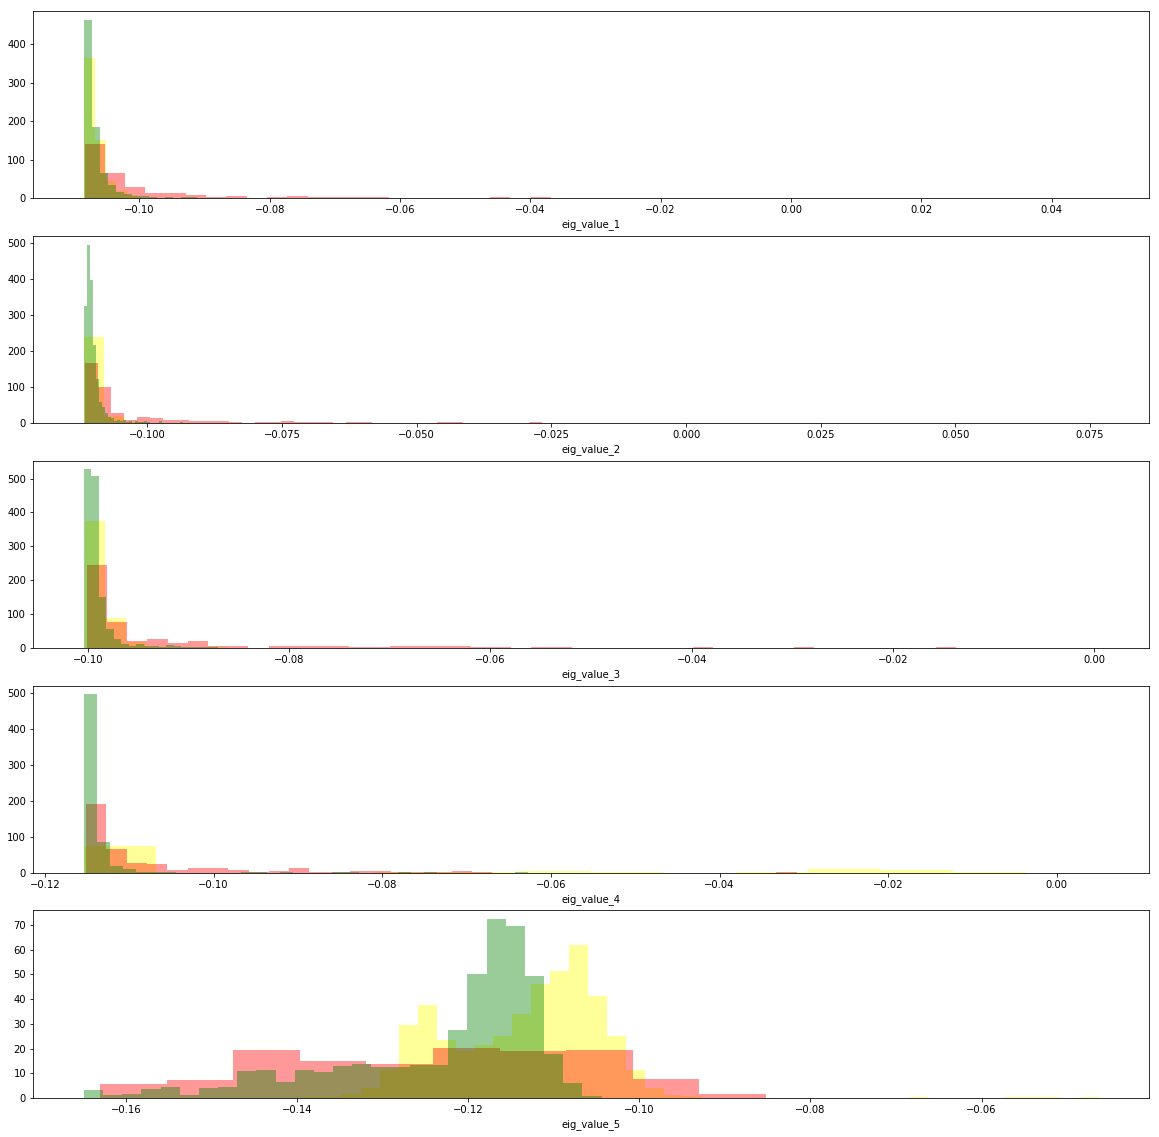

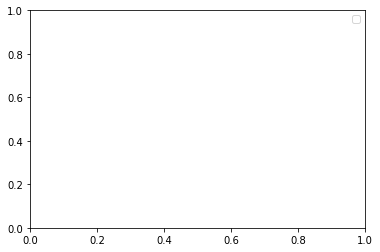

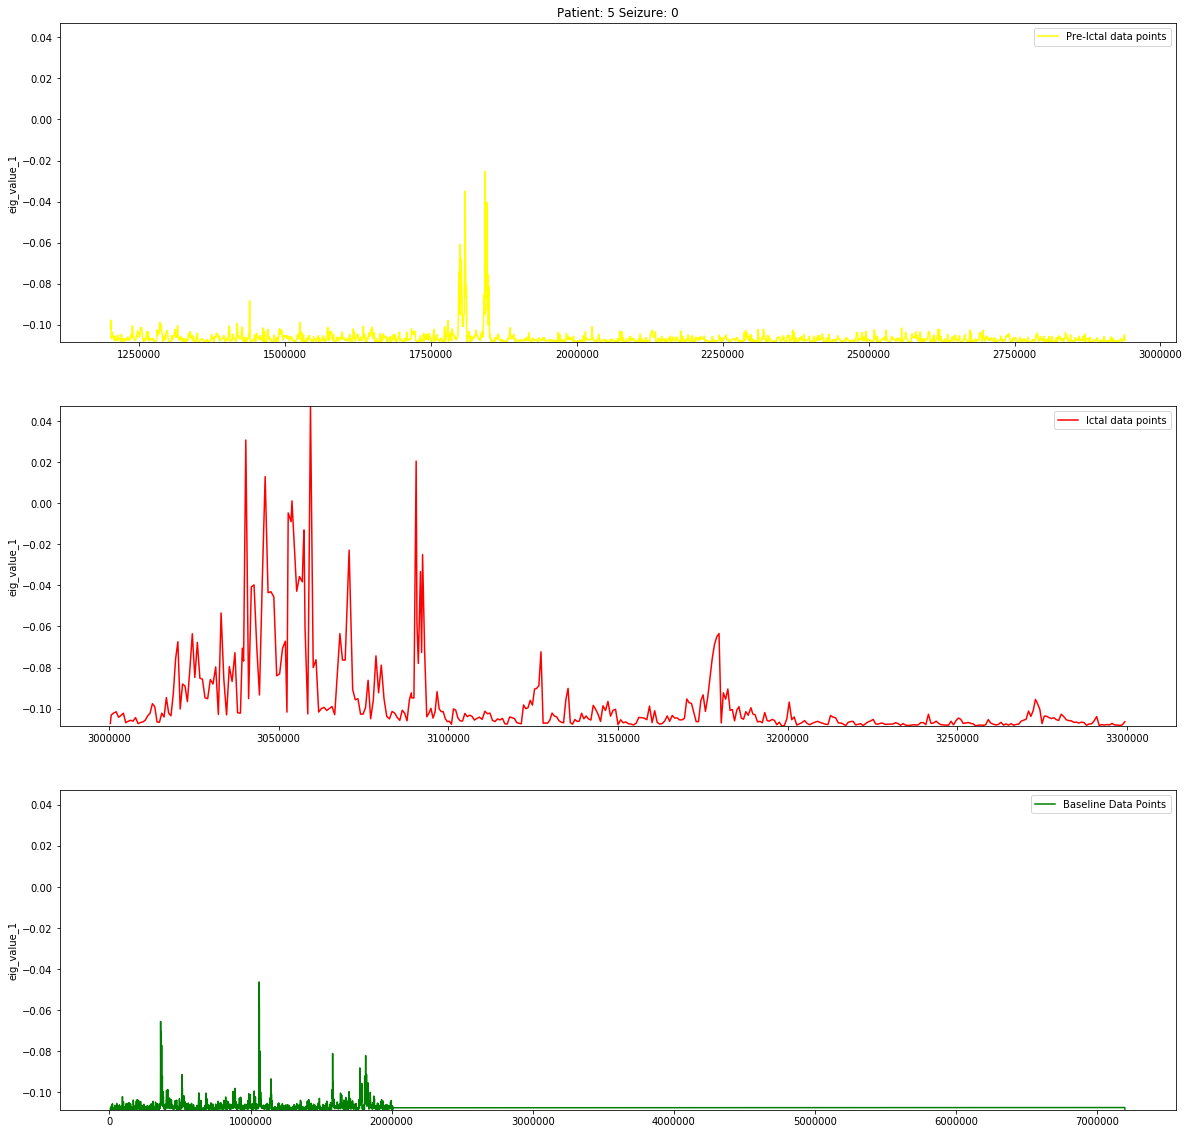

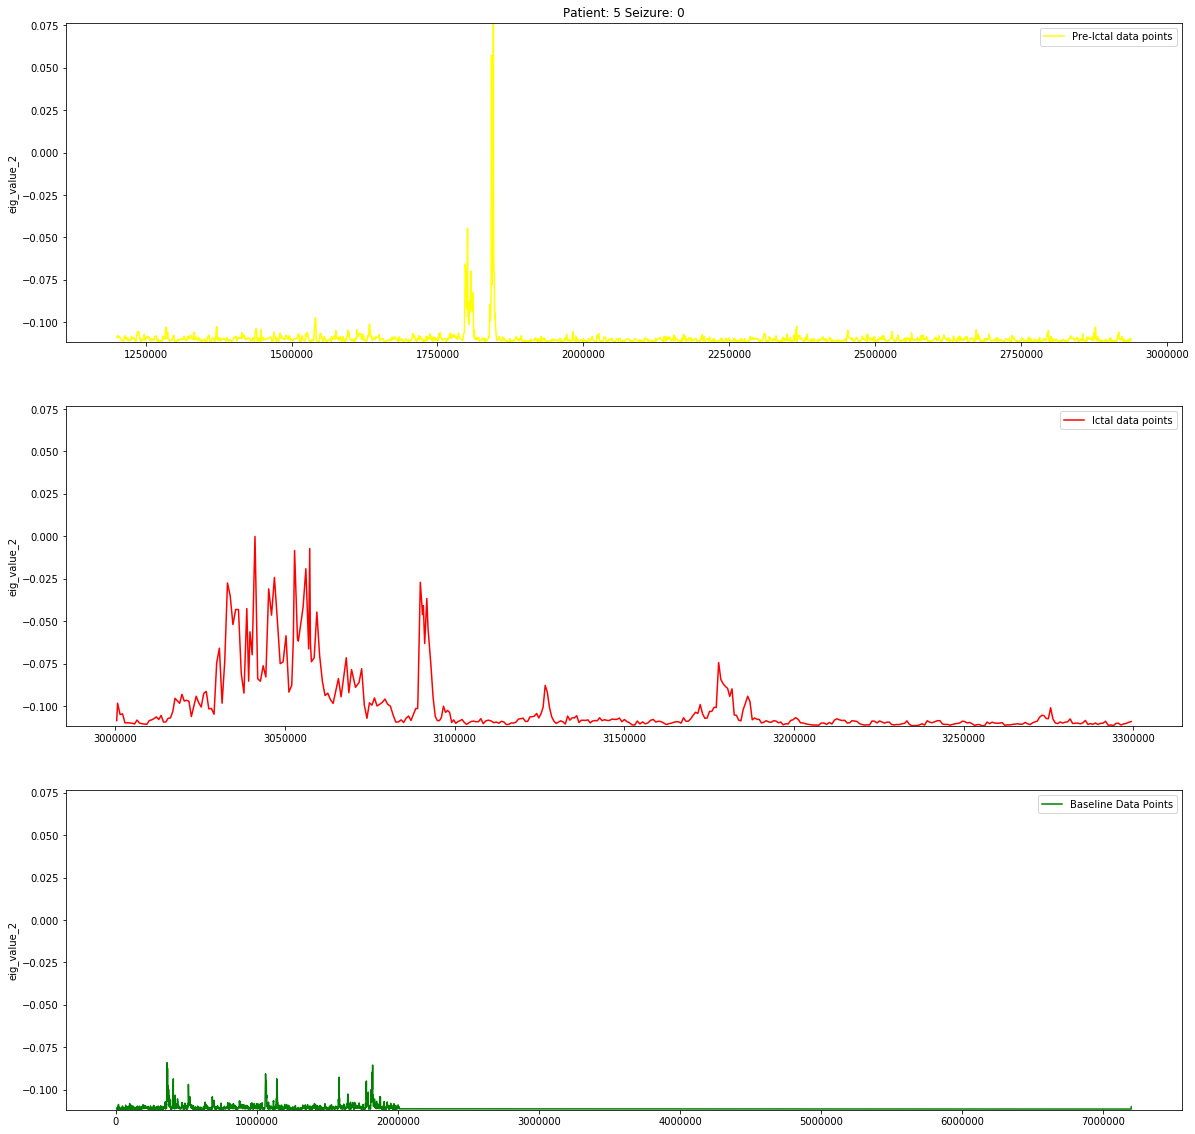

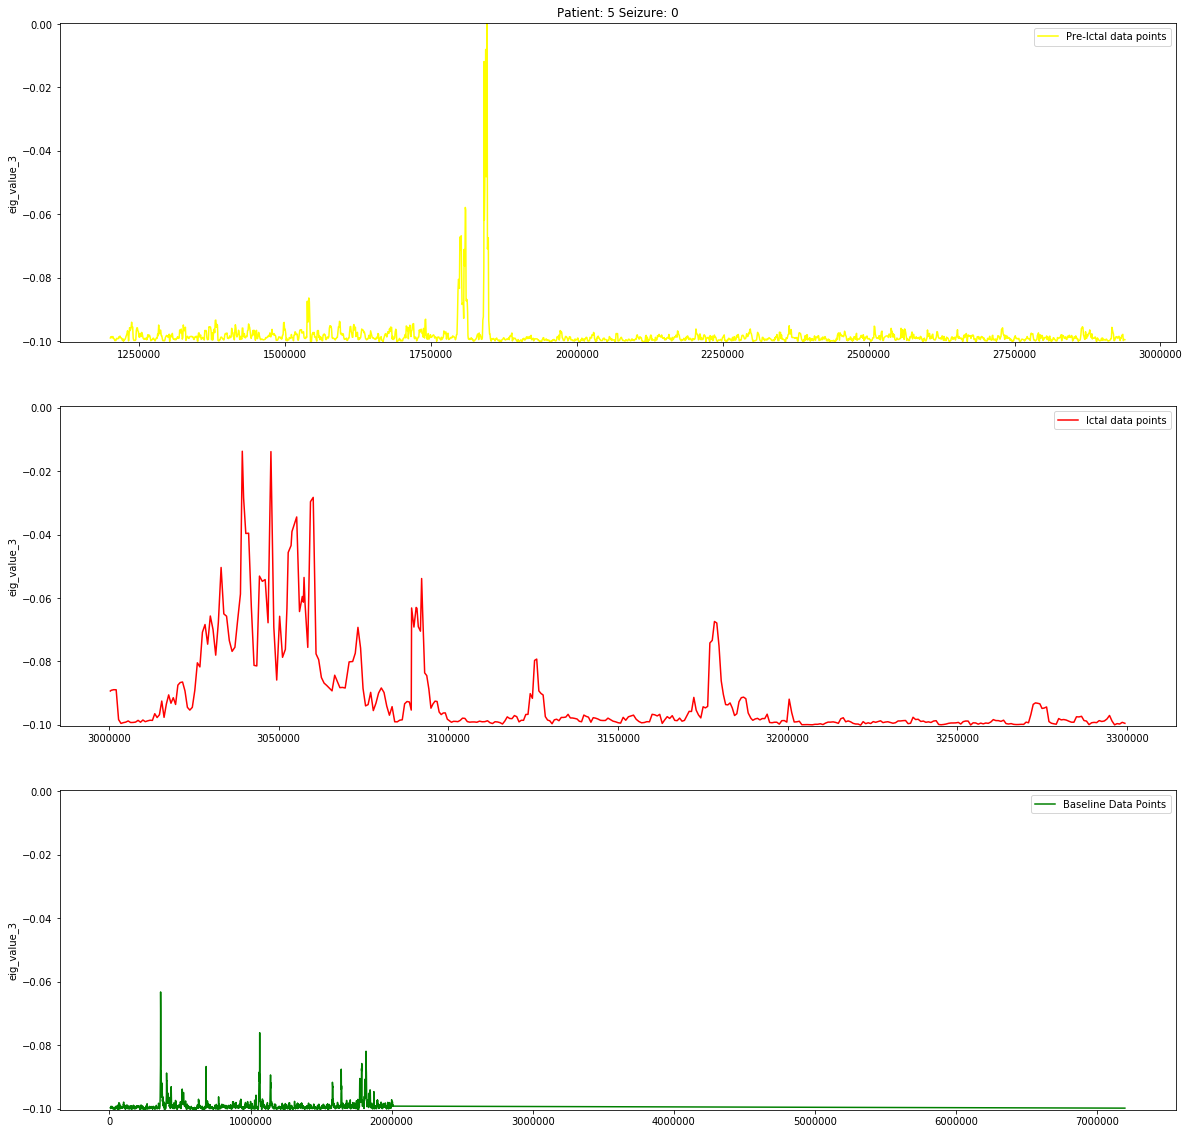

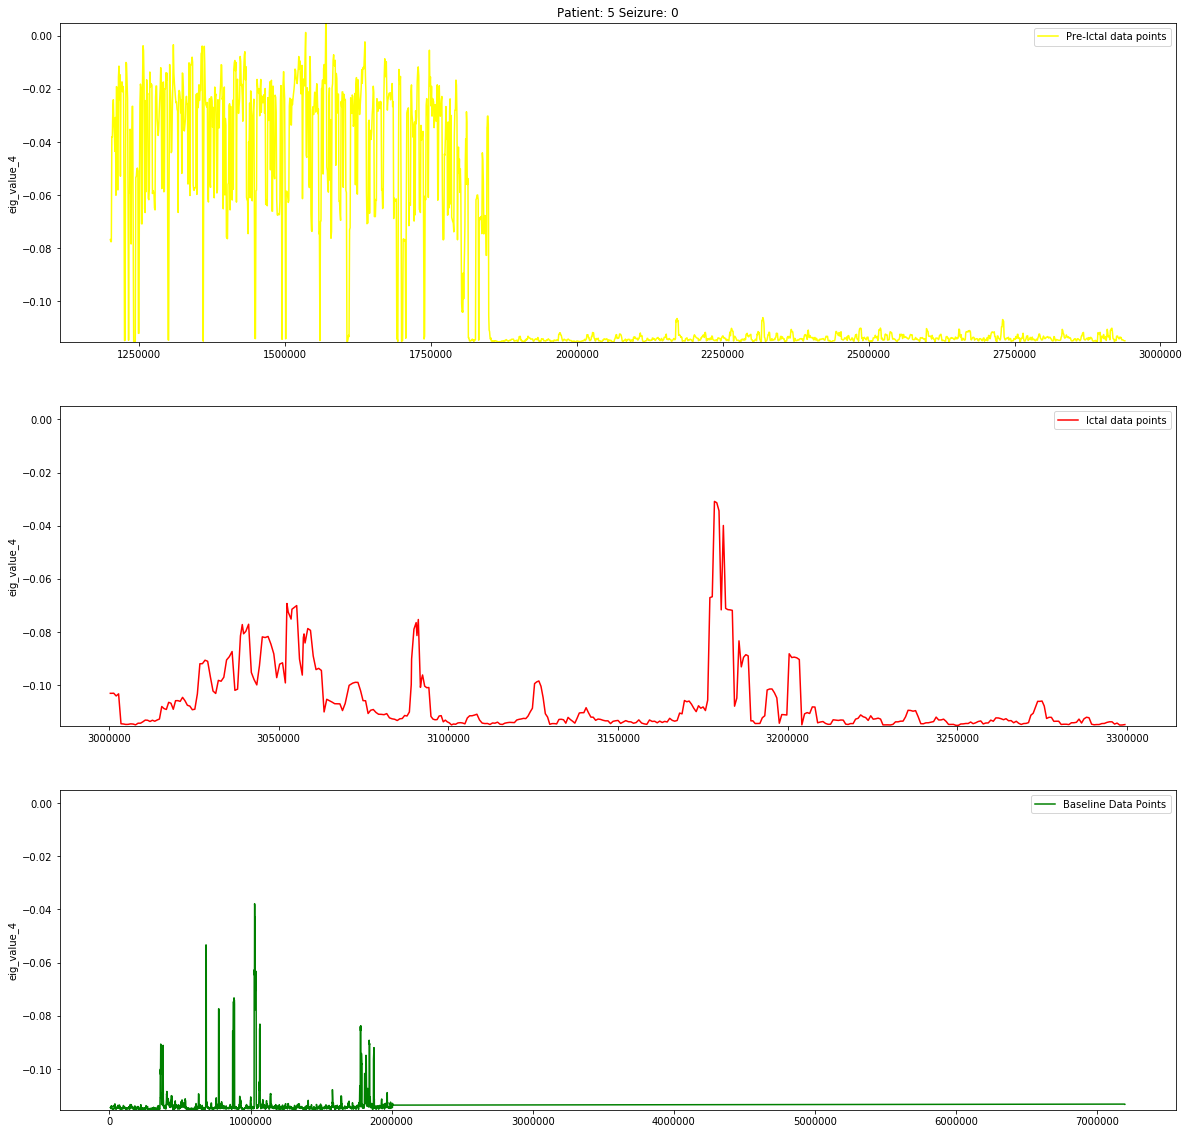

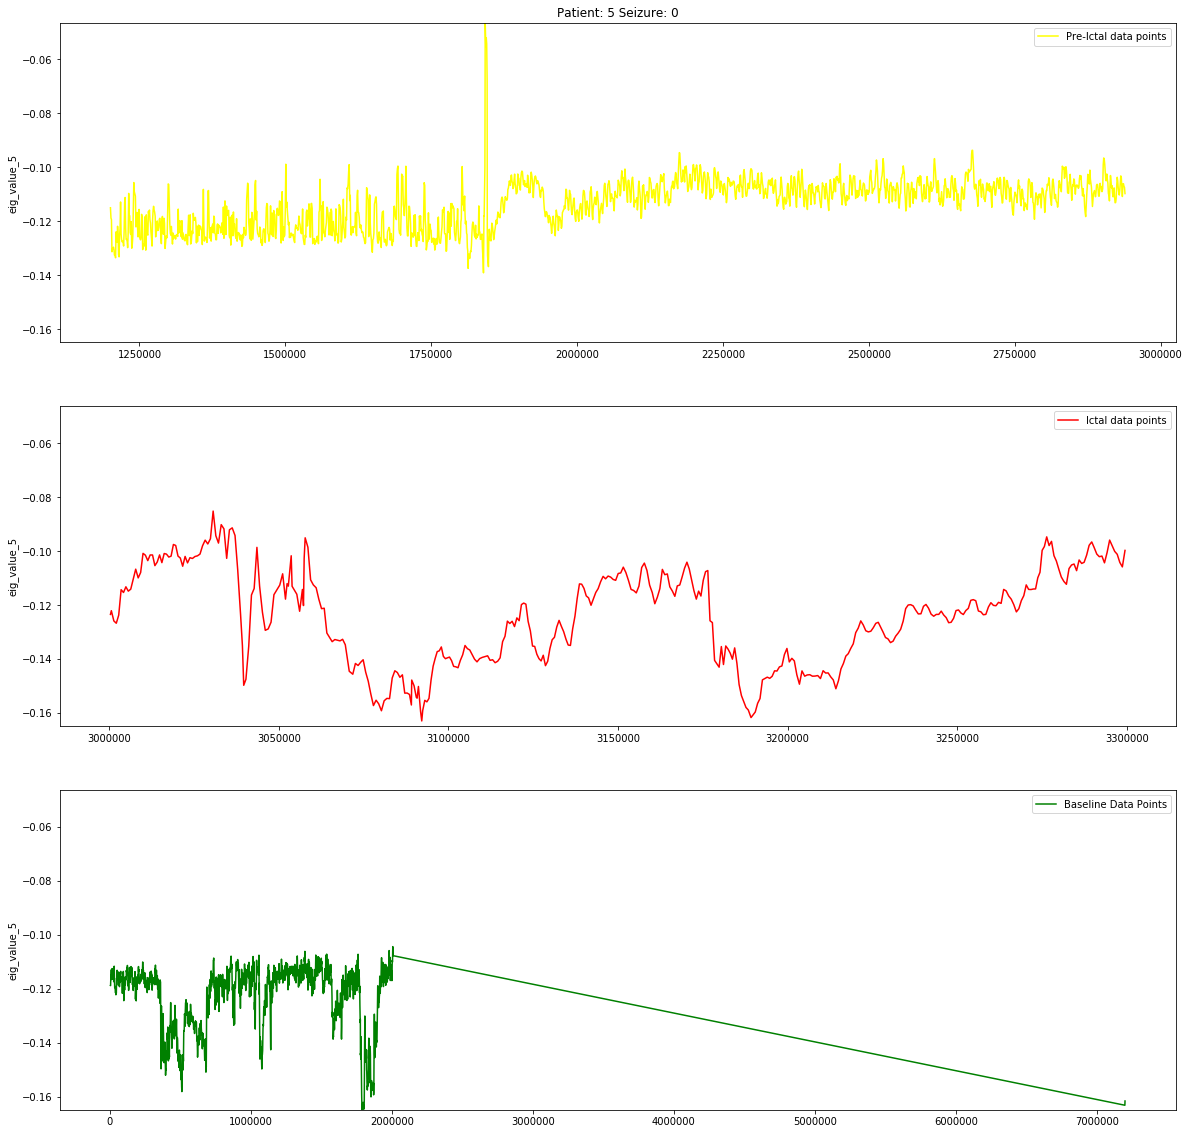

classification/eda/andrews.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


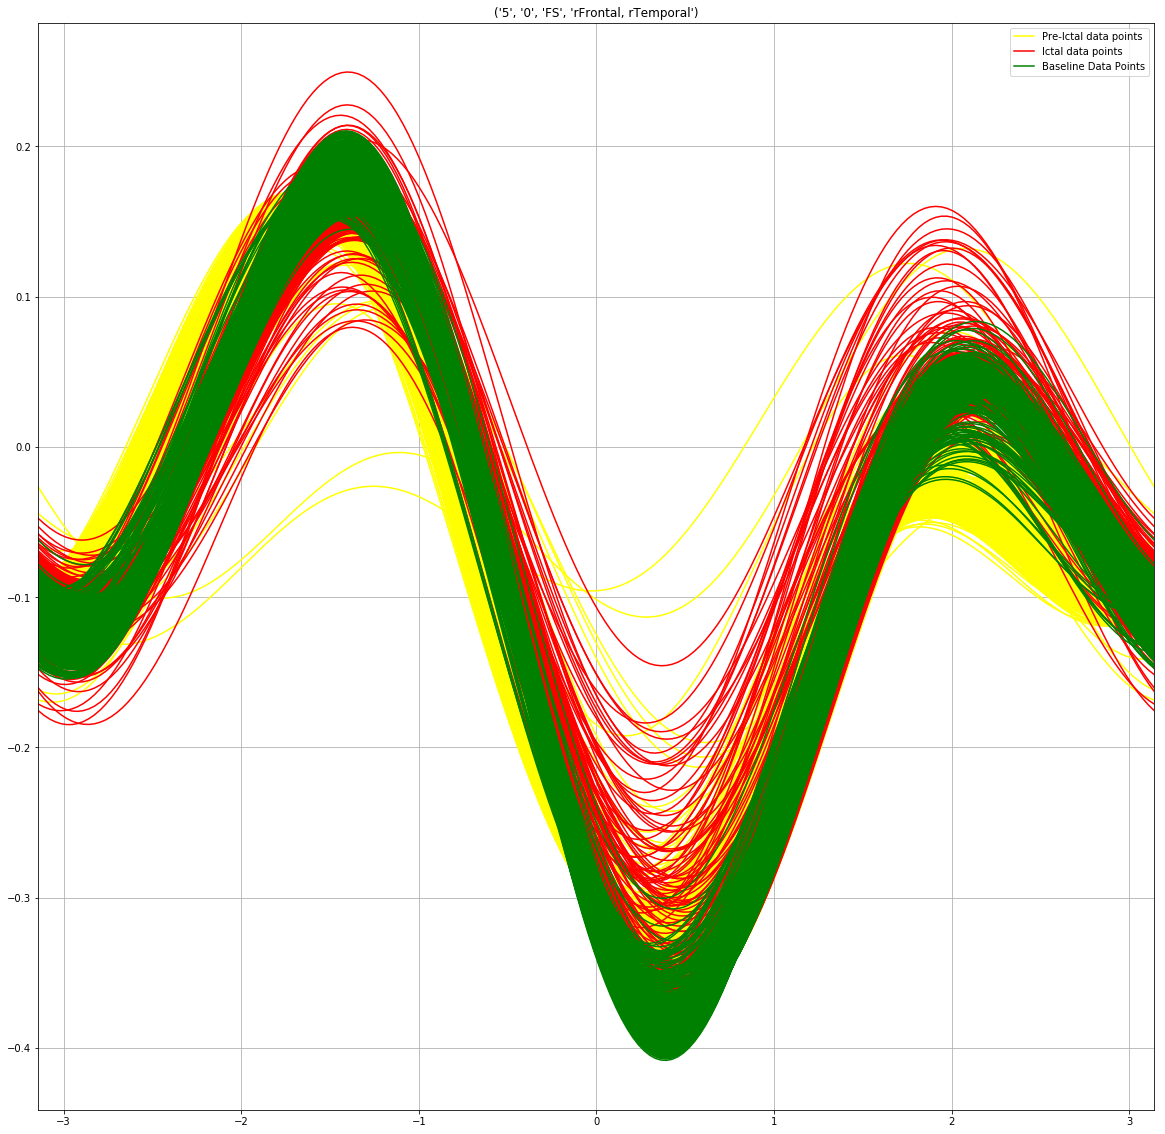

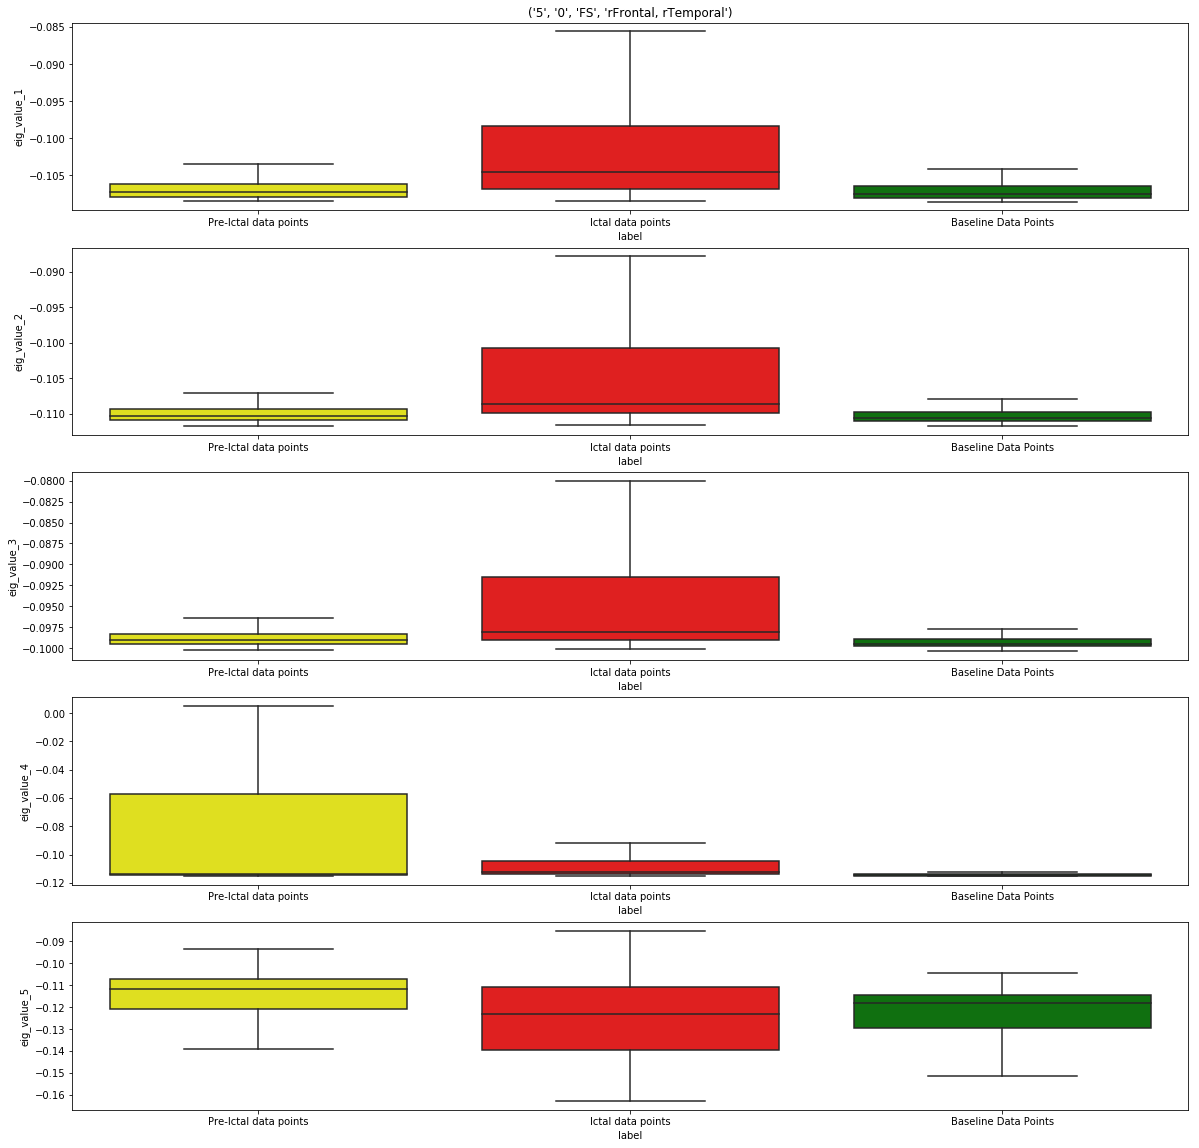

classification/eda/scatter.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


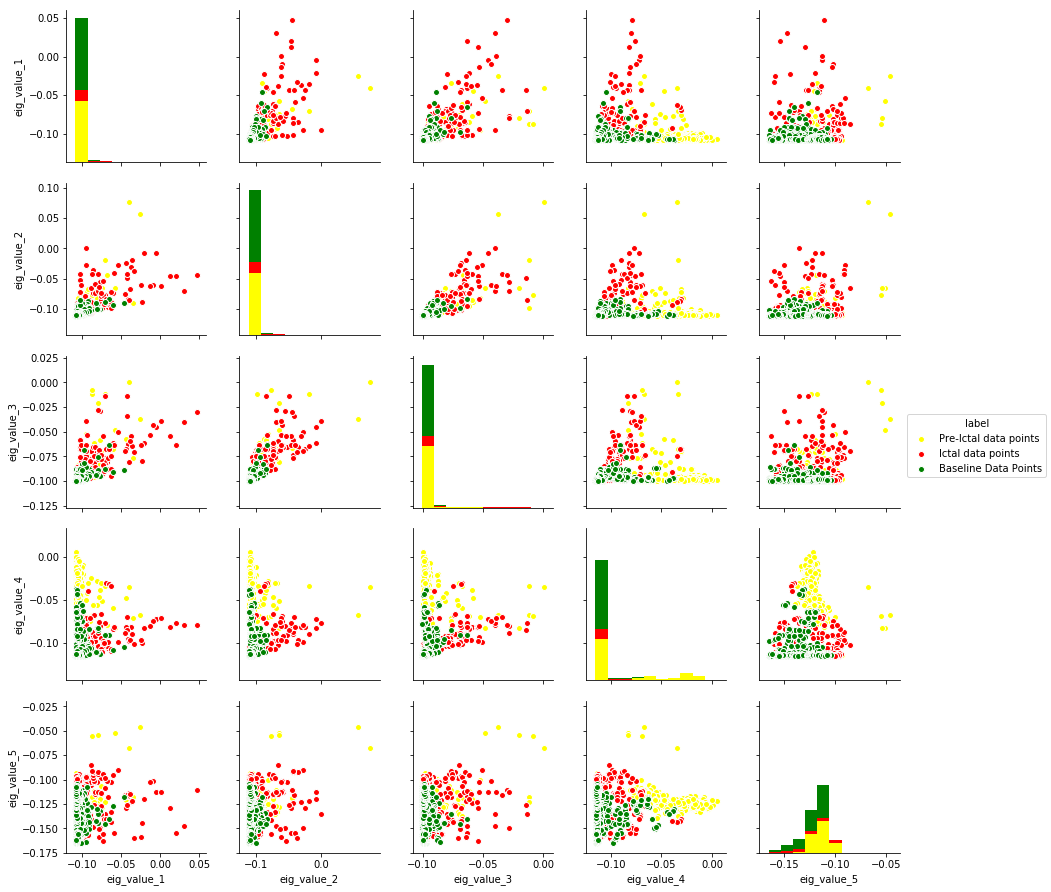

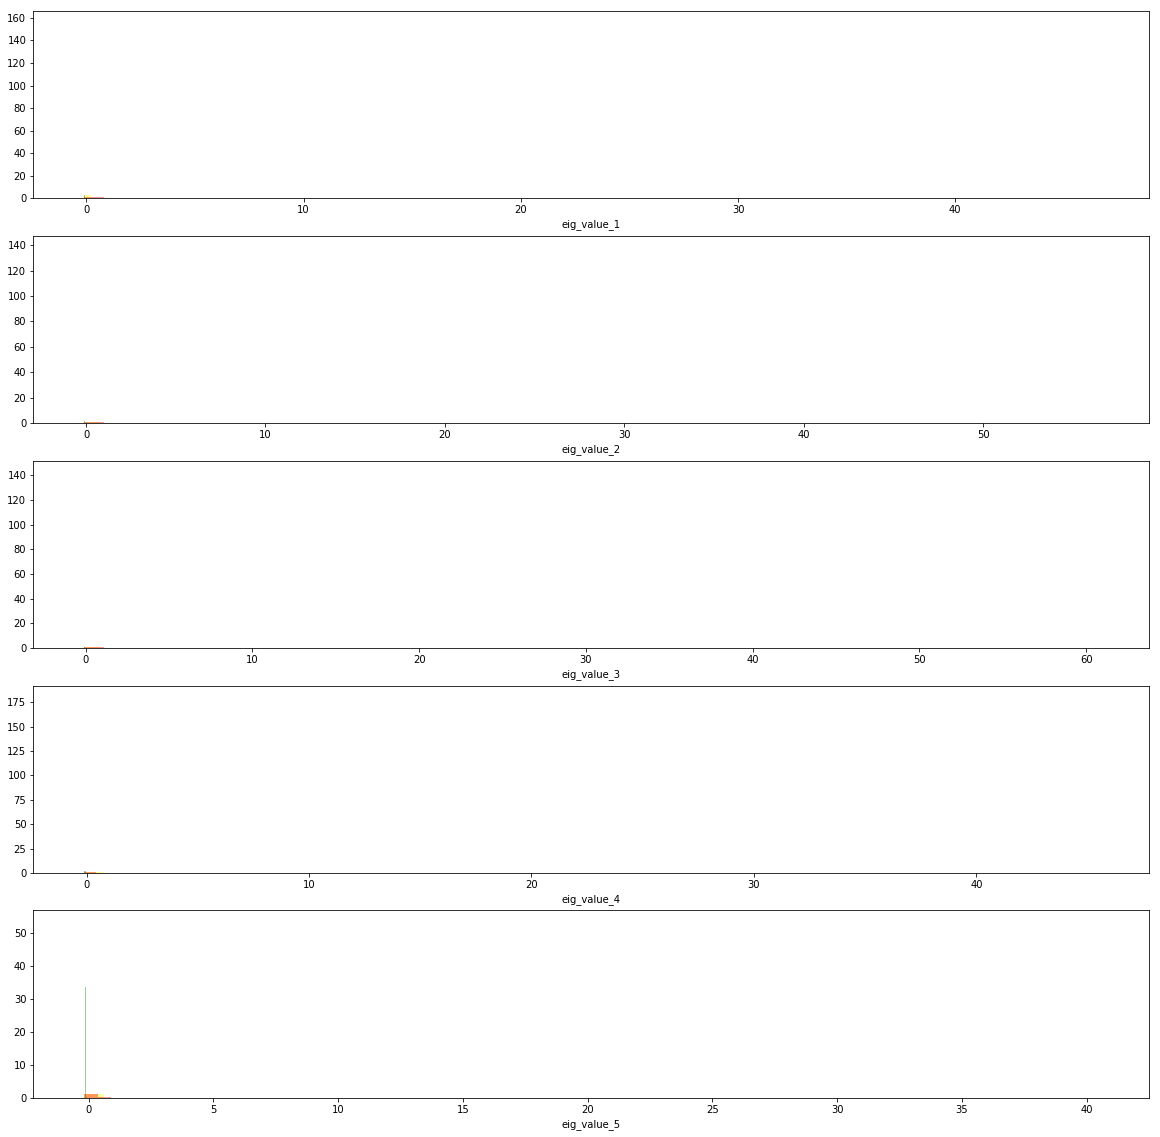

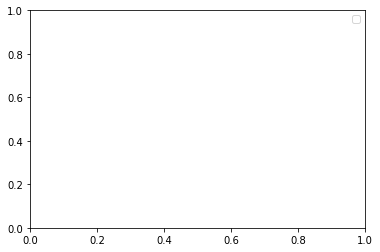

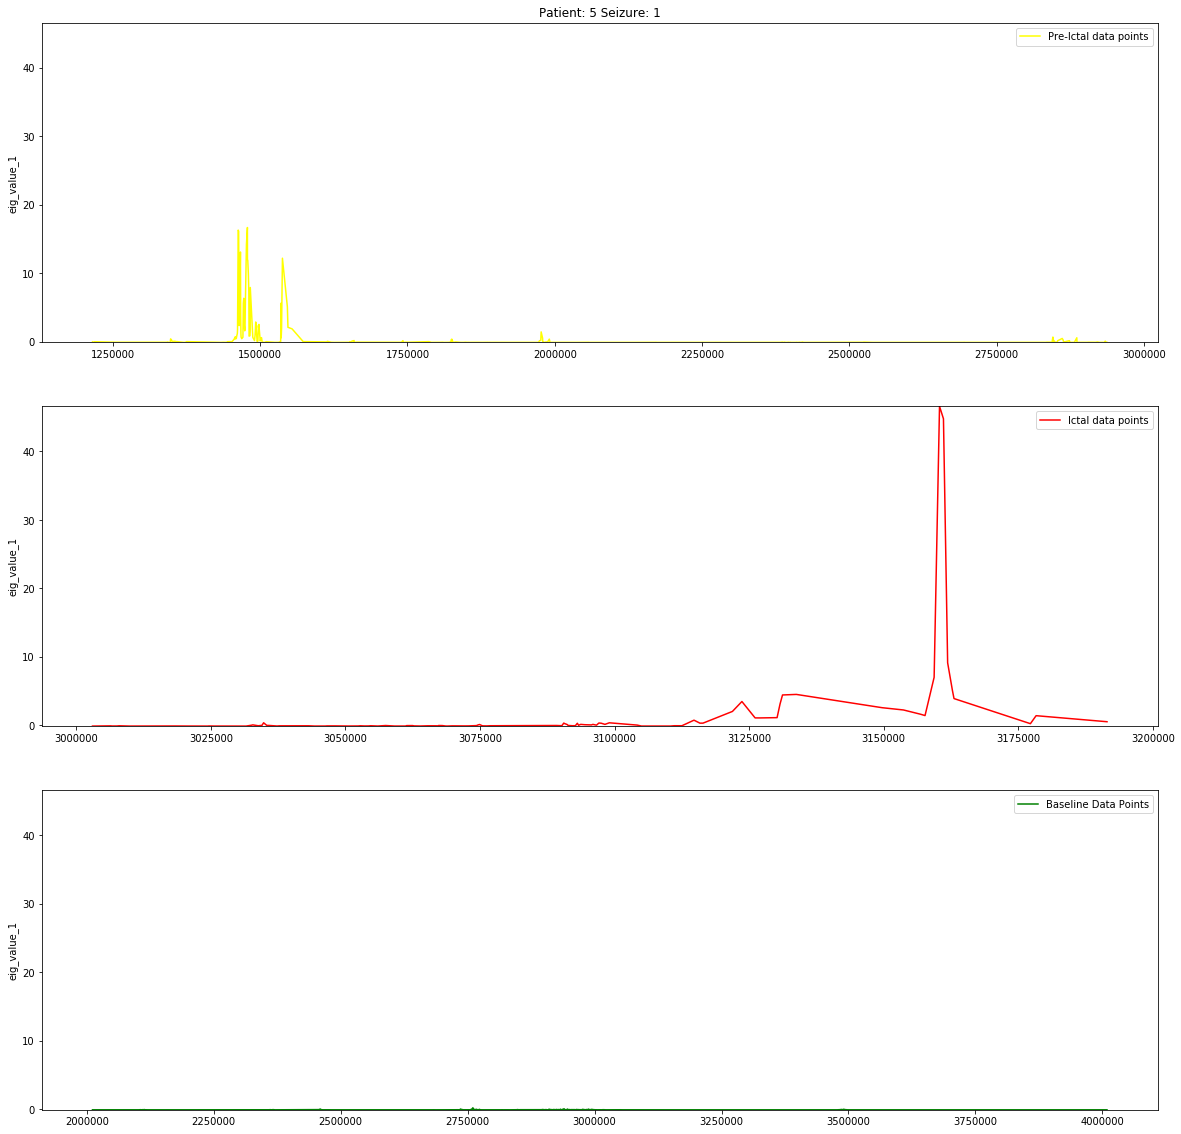

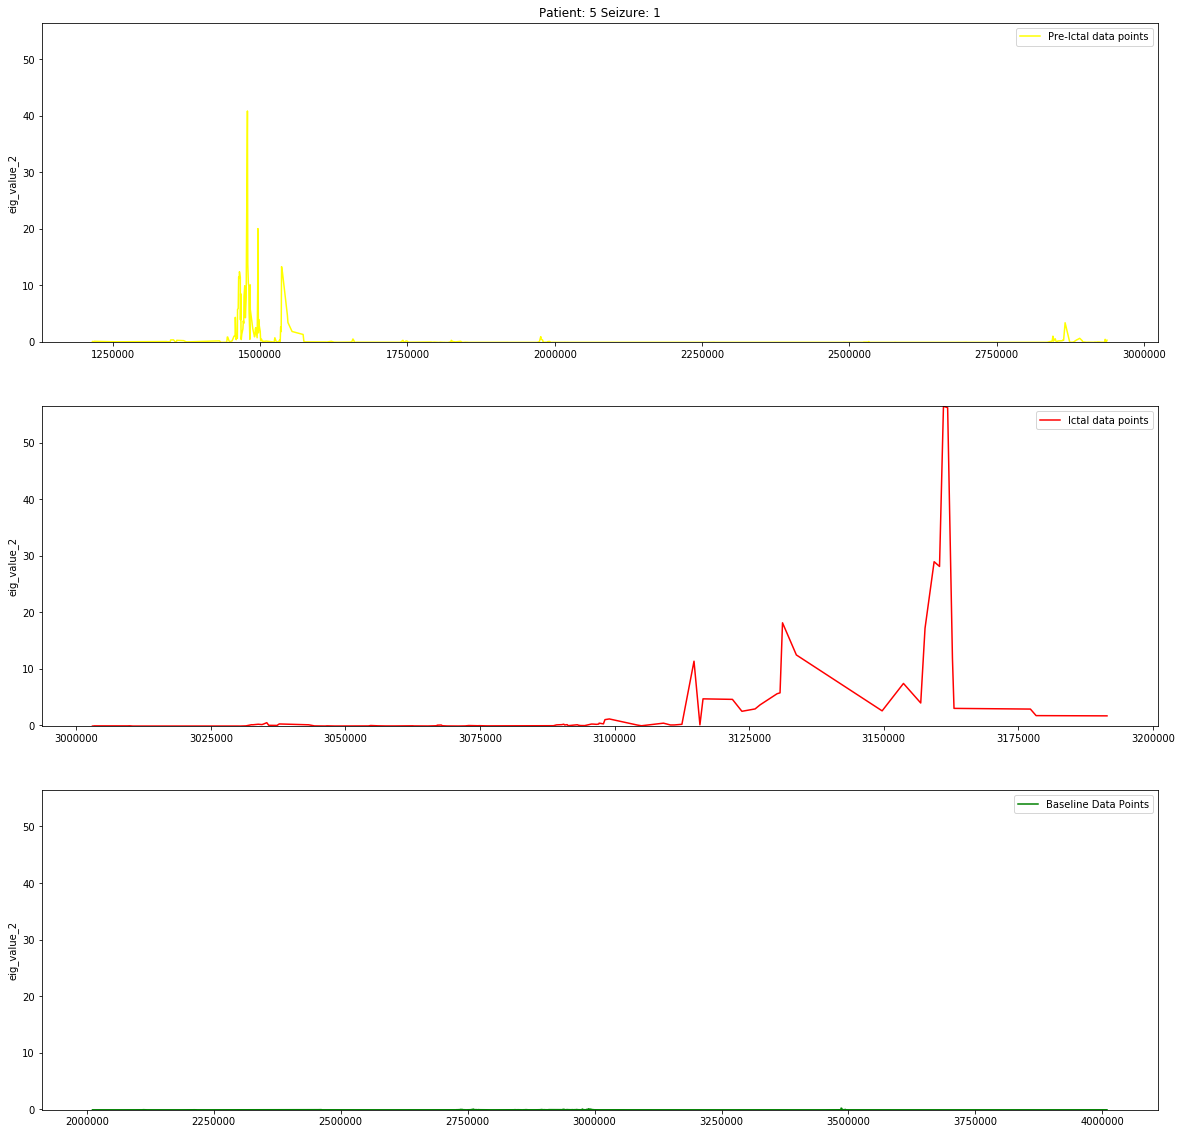

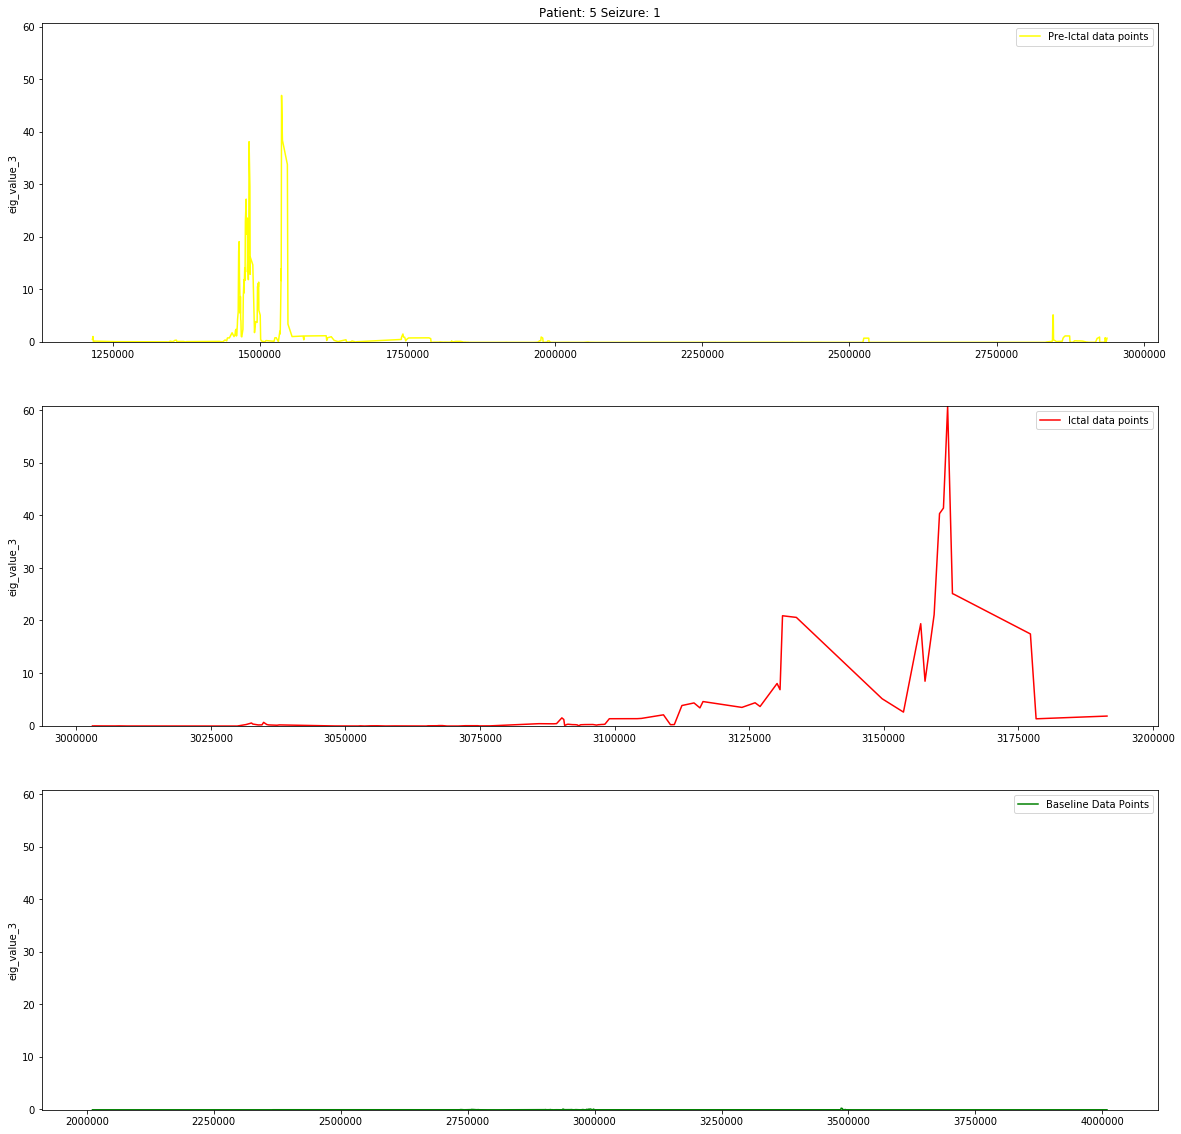

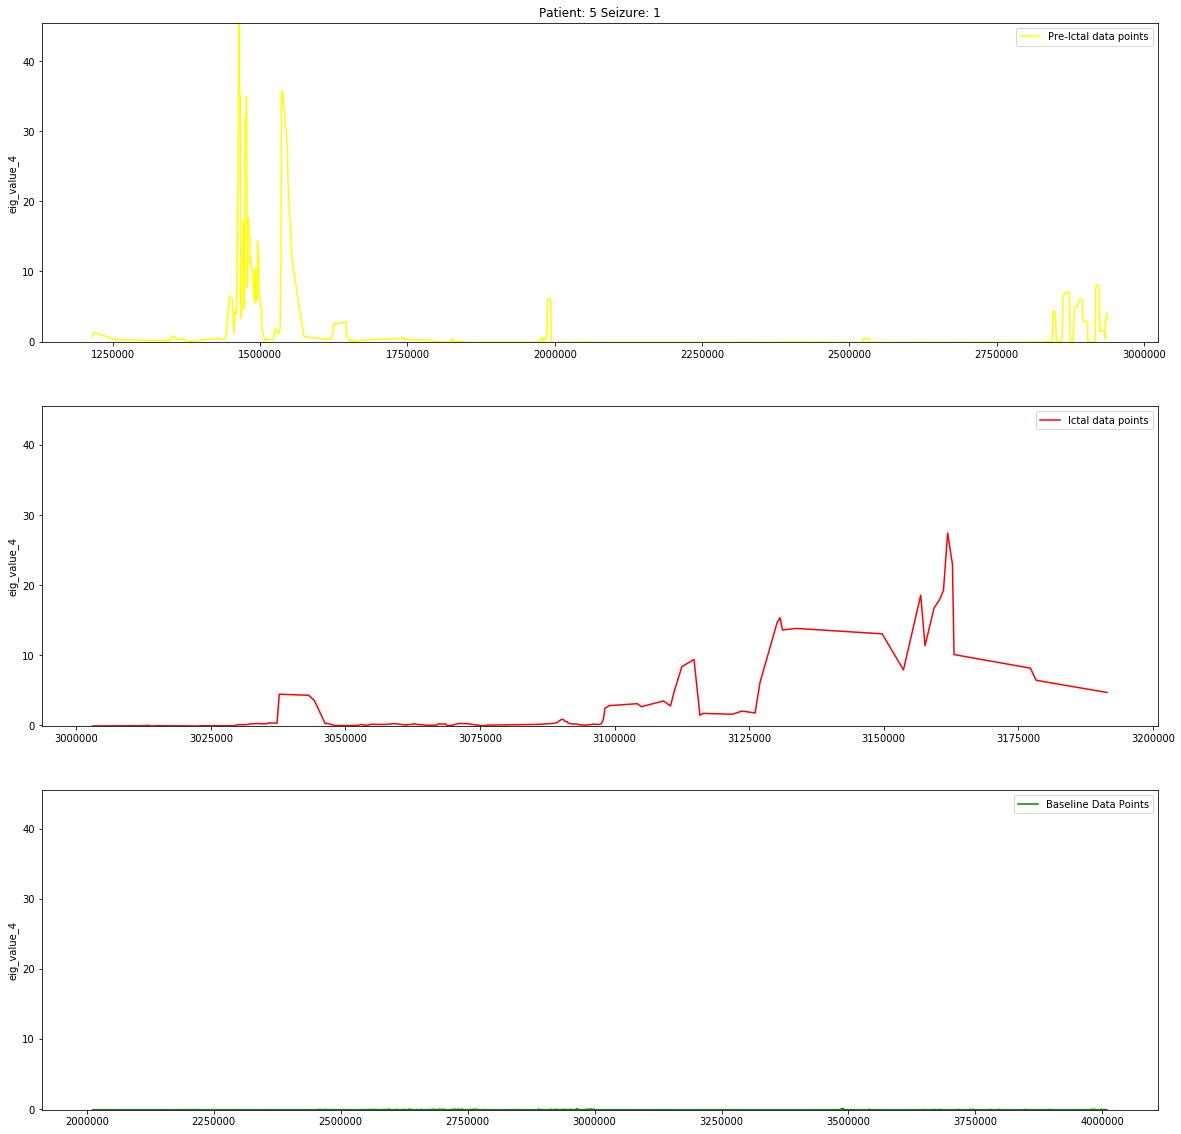

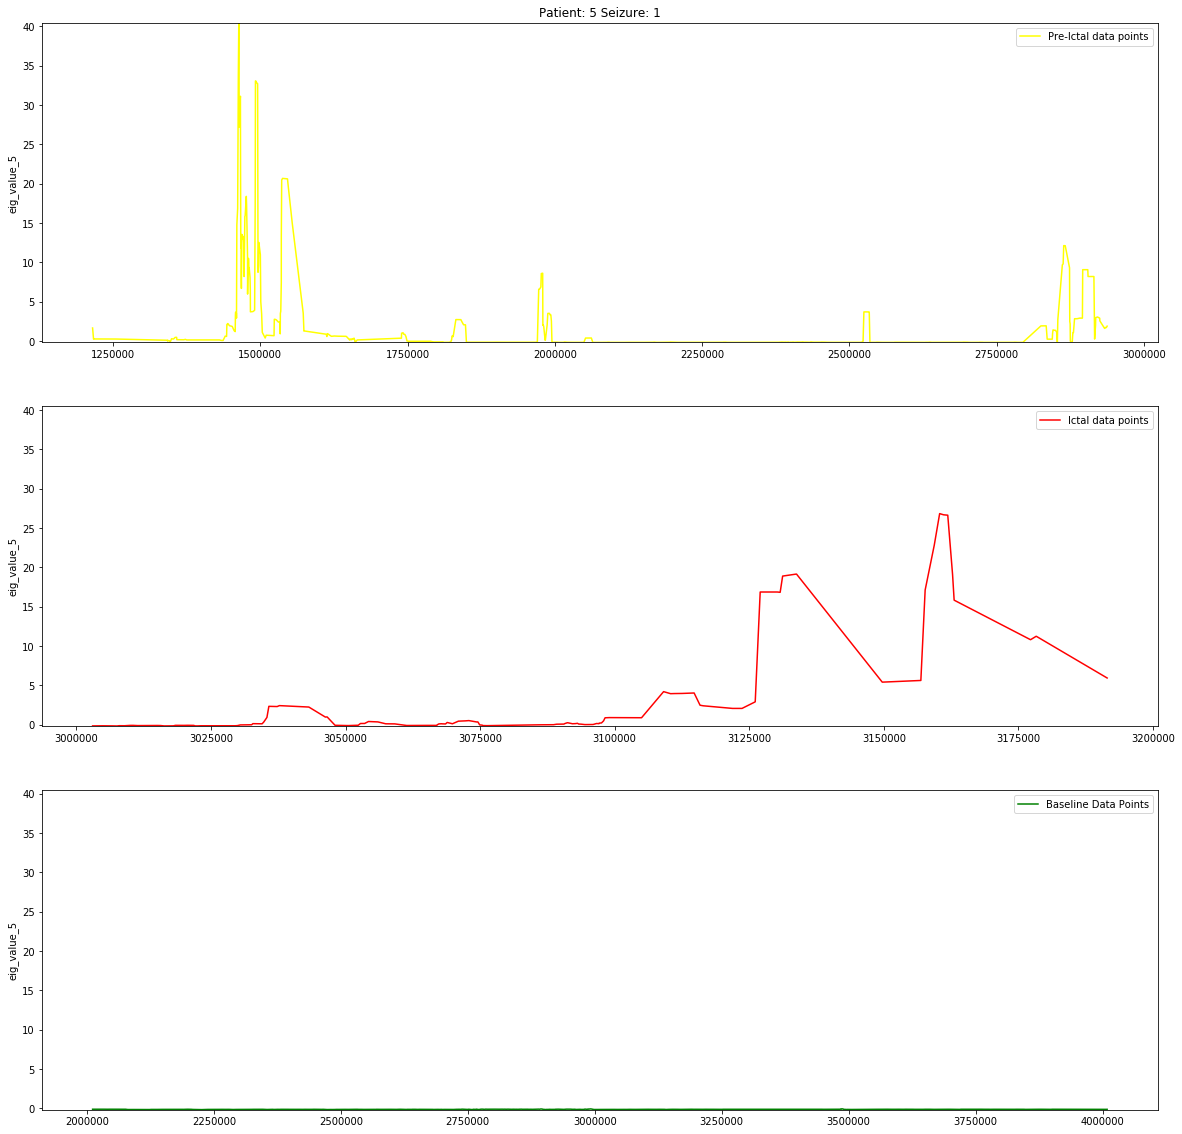

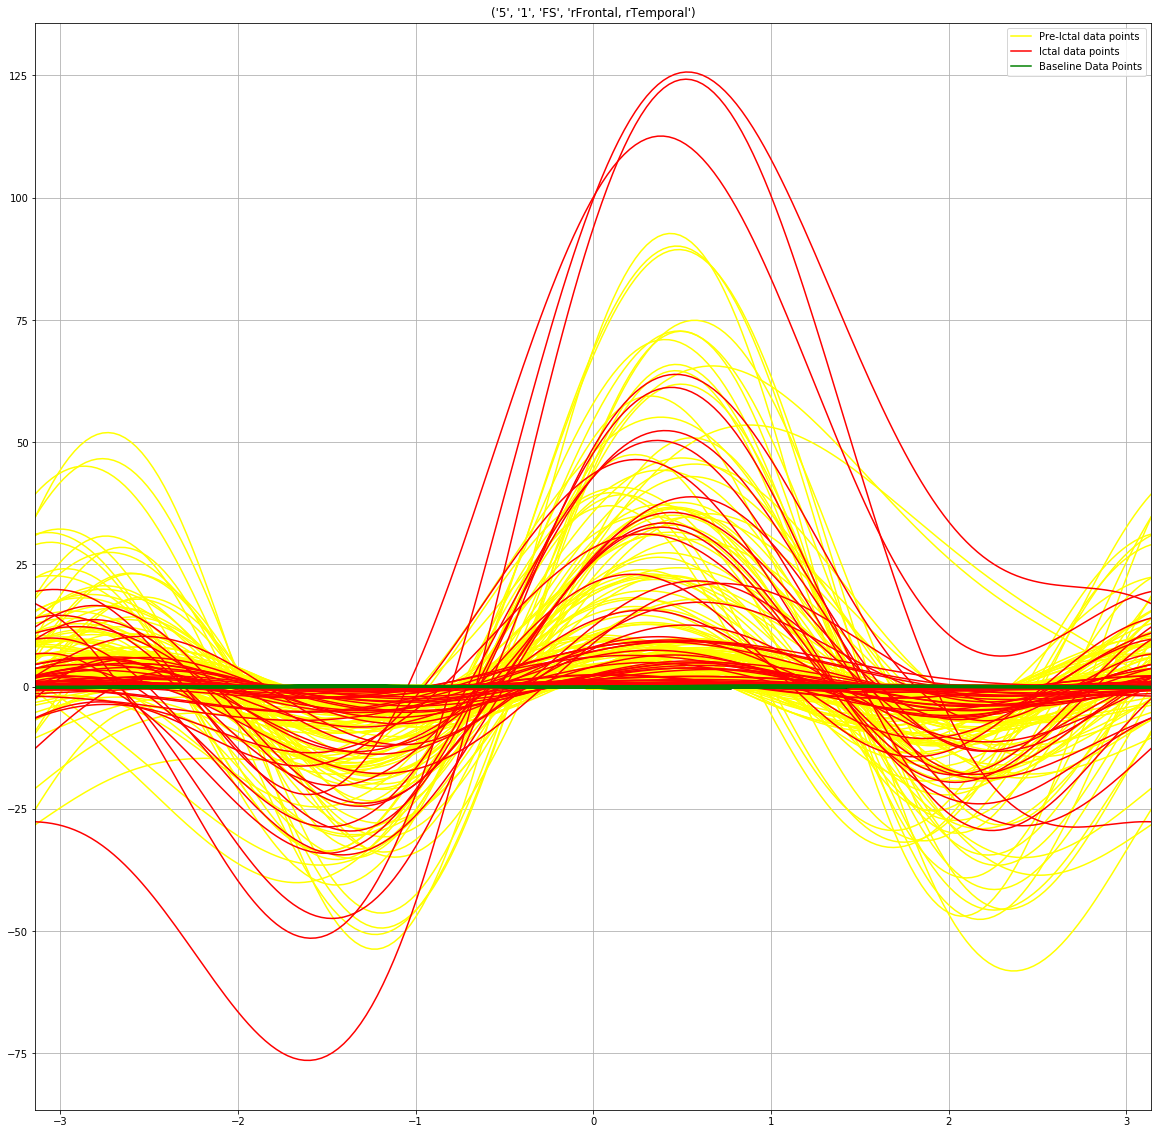

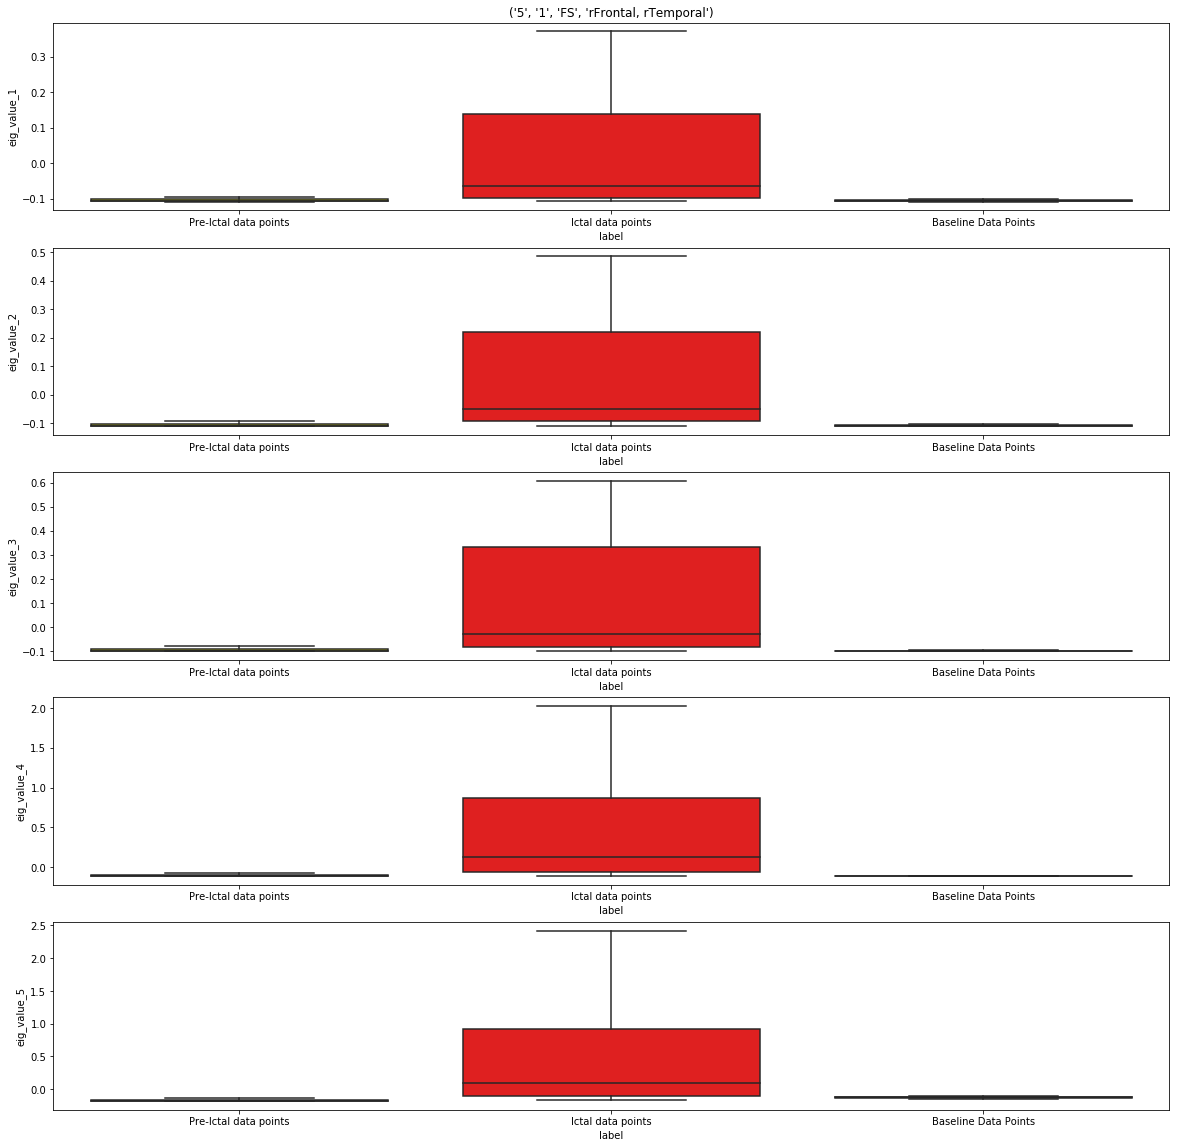

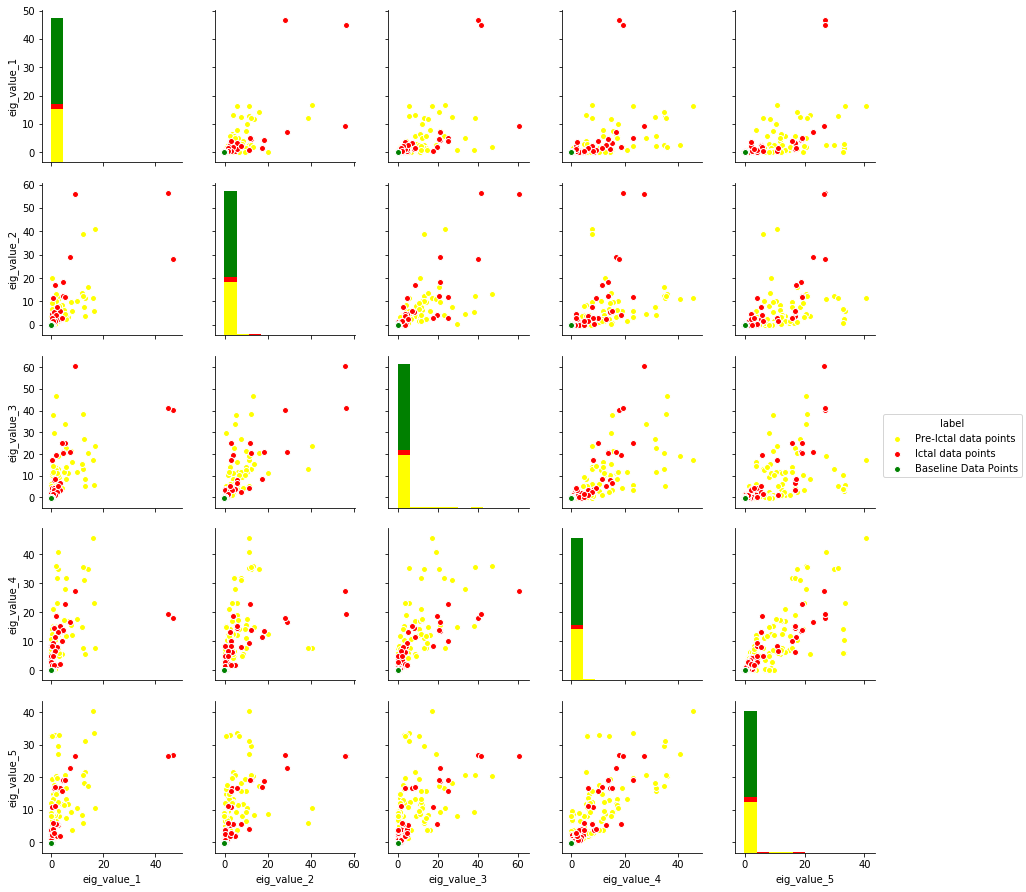

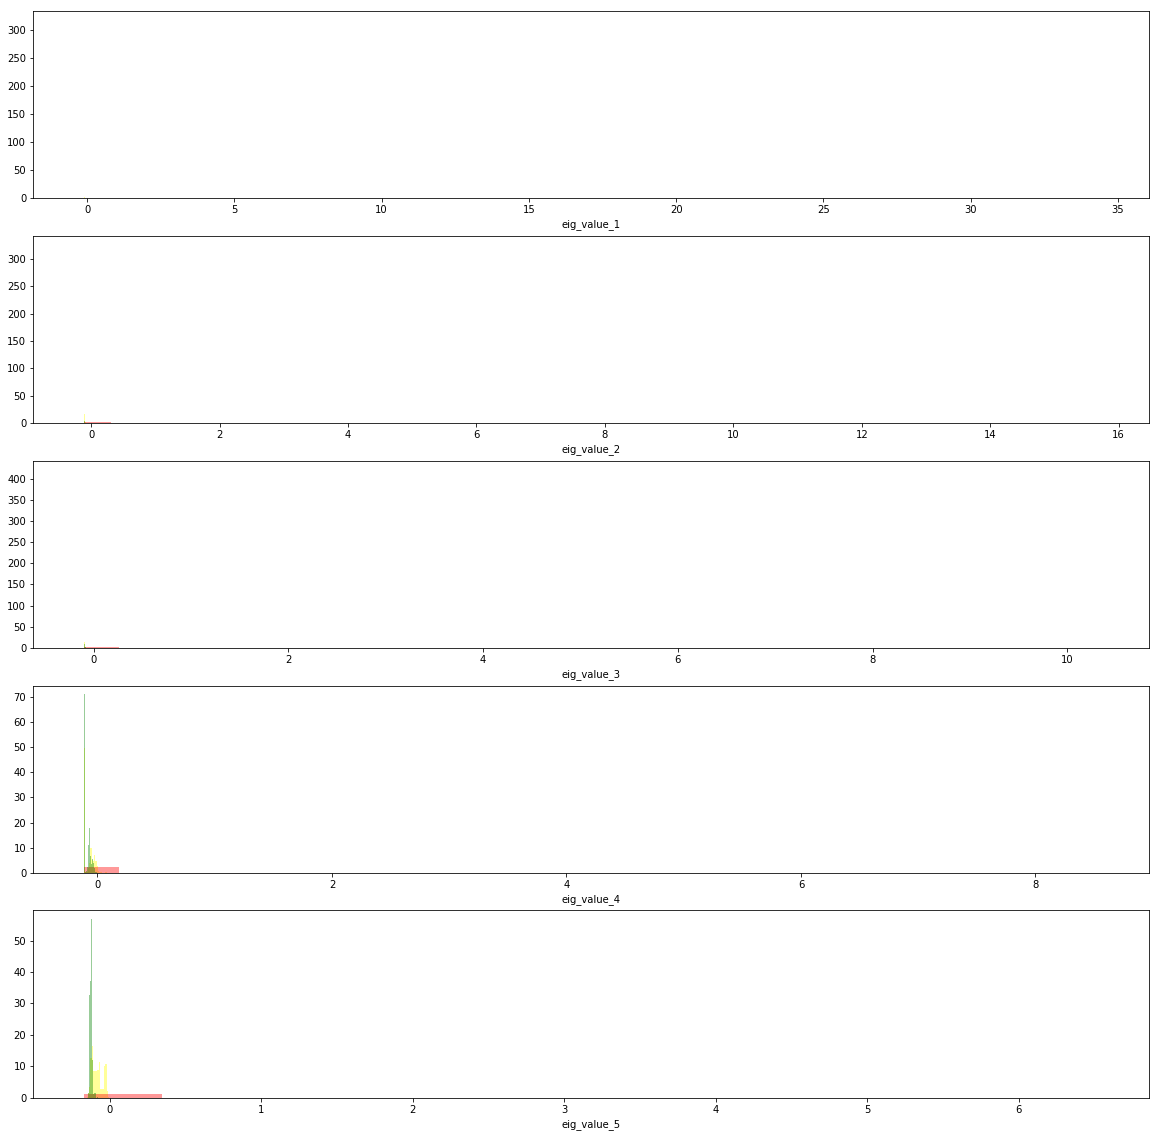

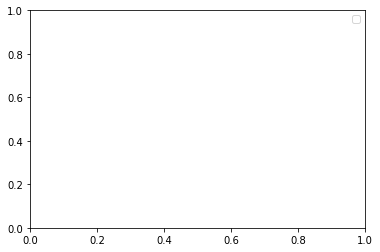

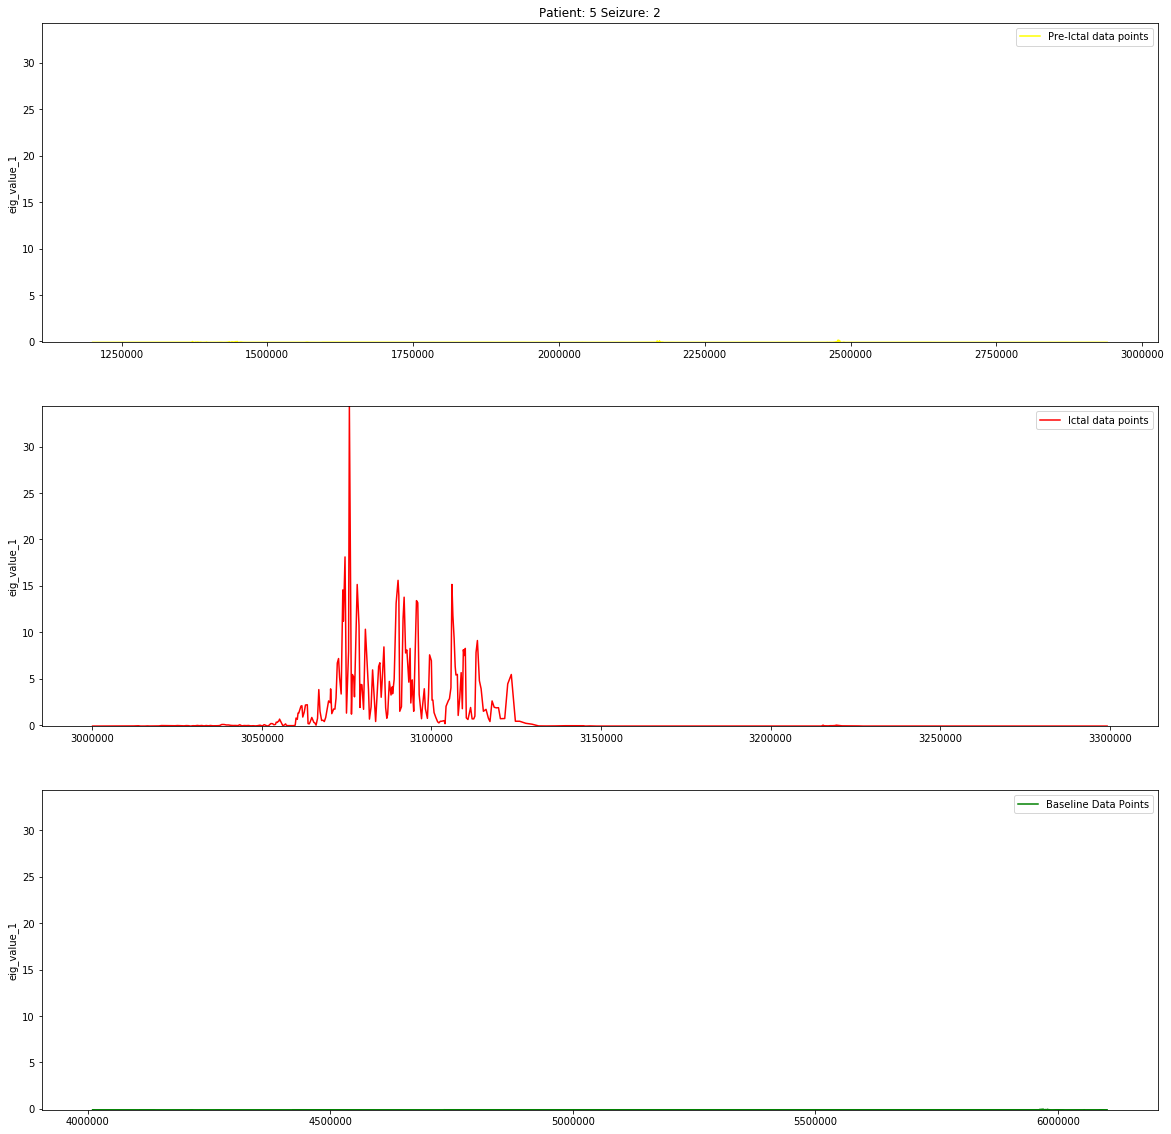

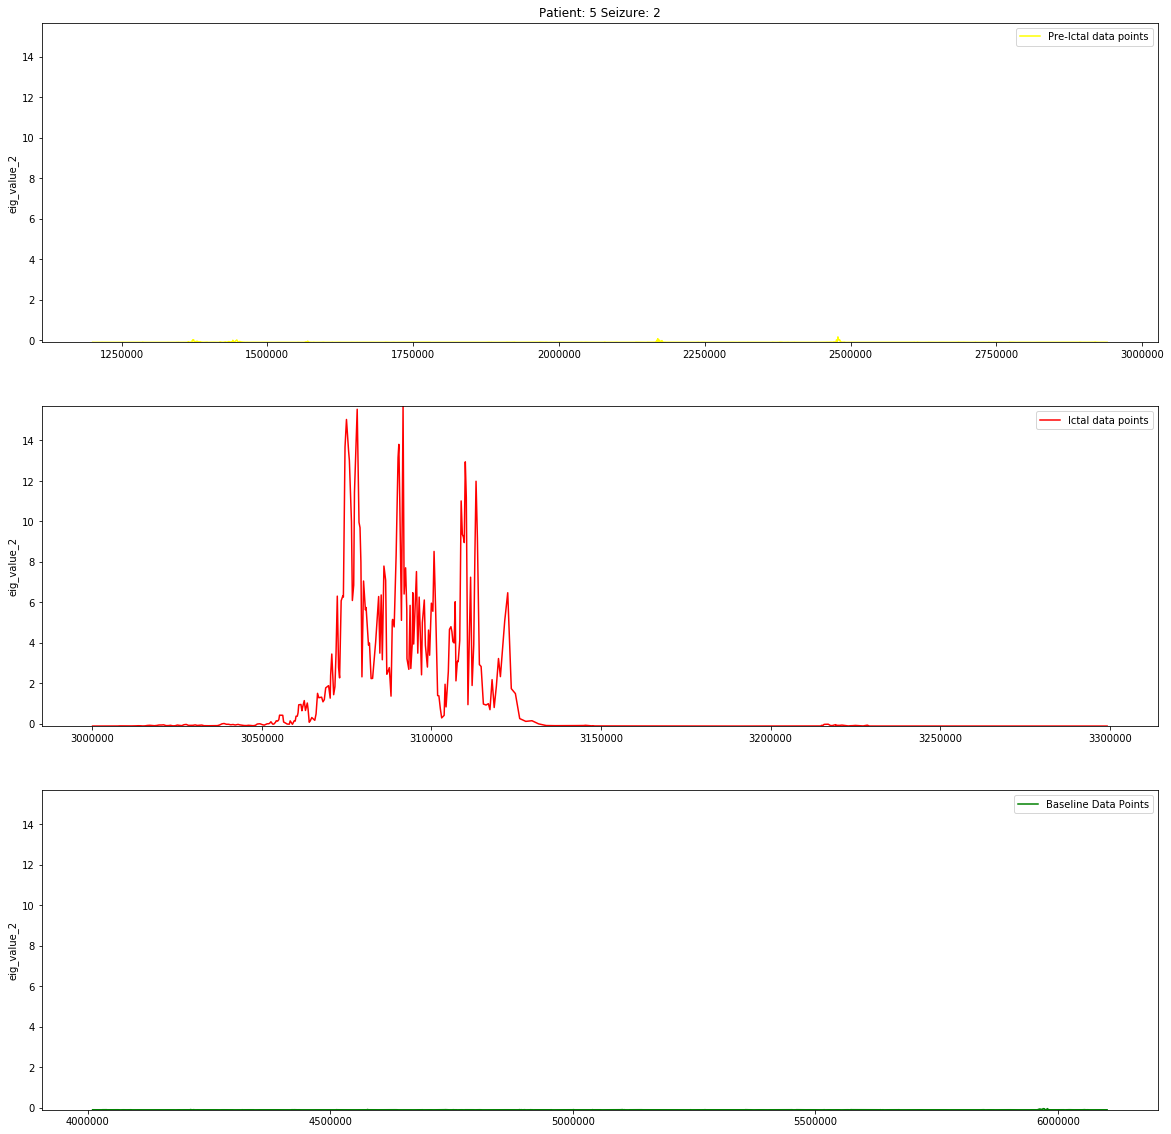

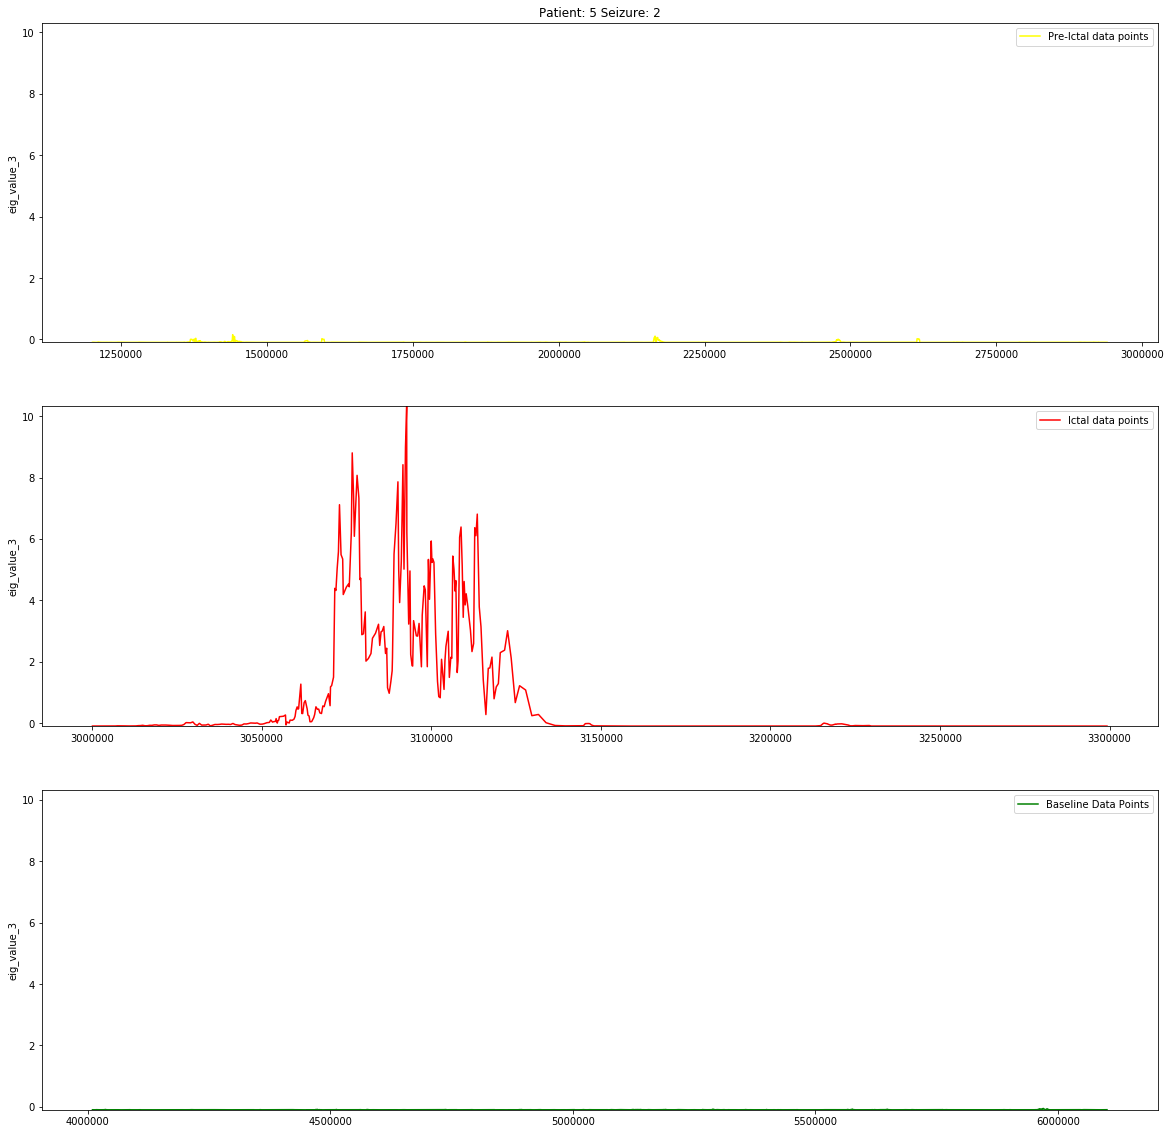

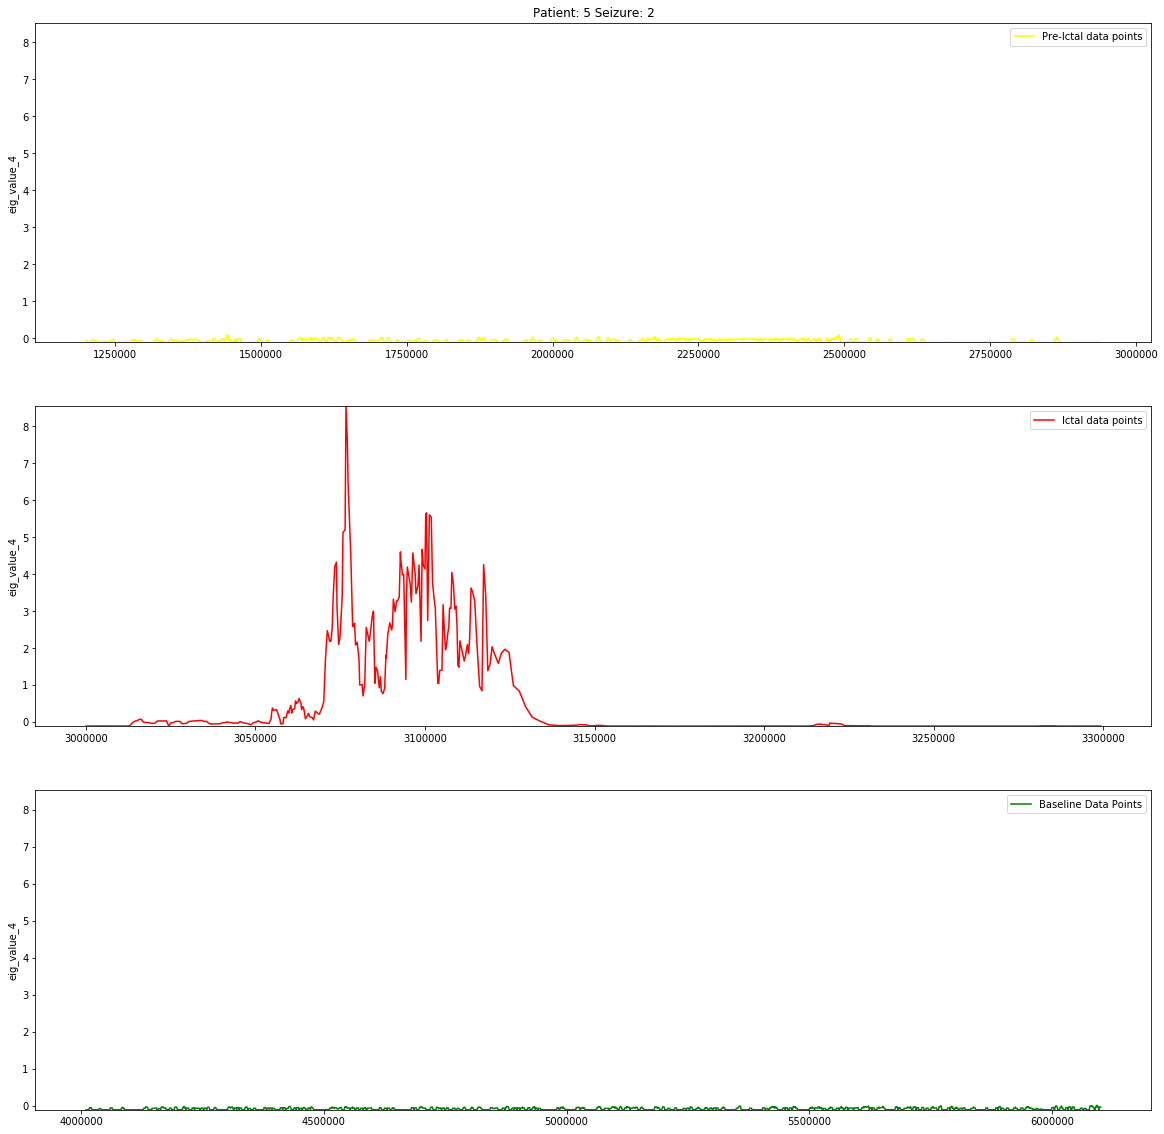

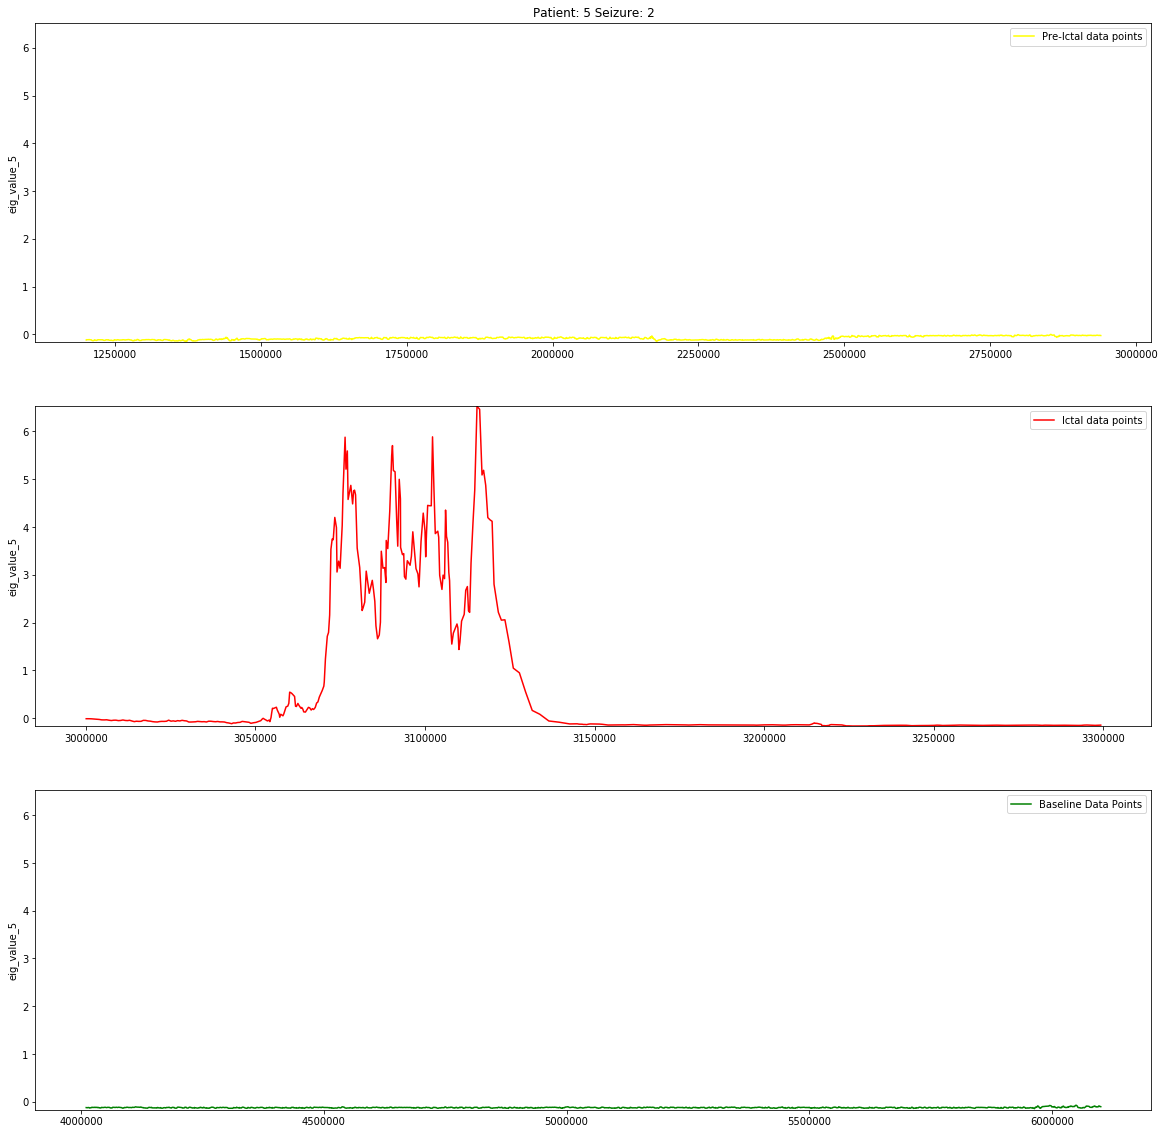

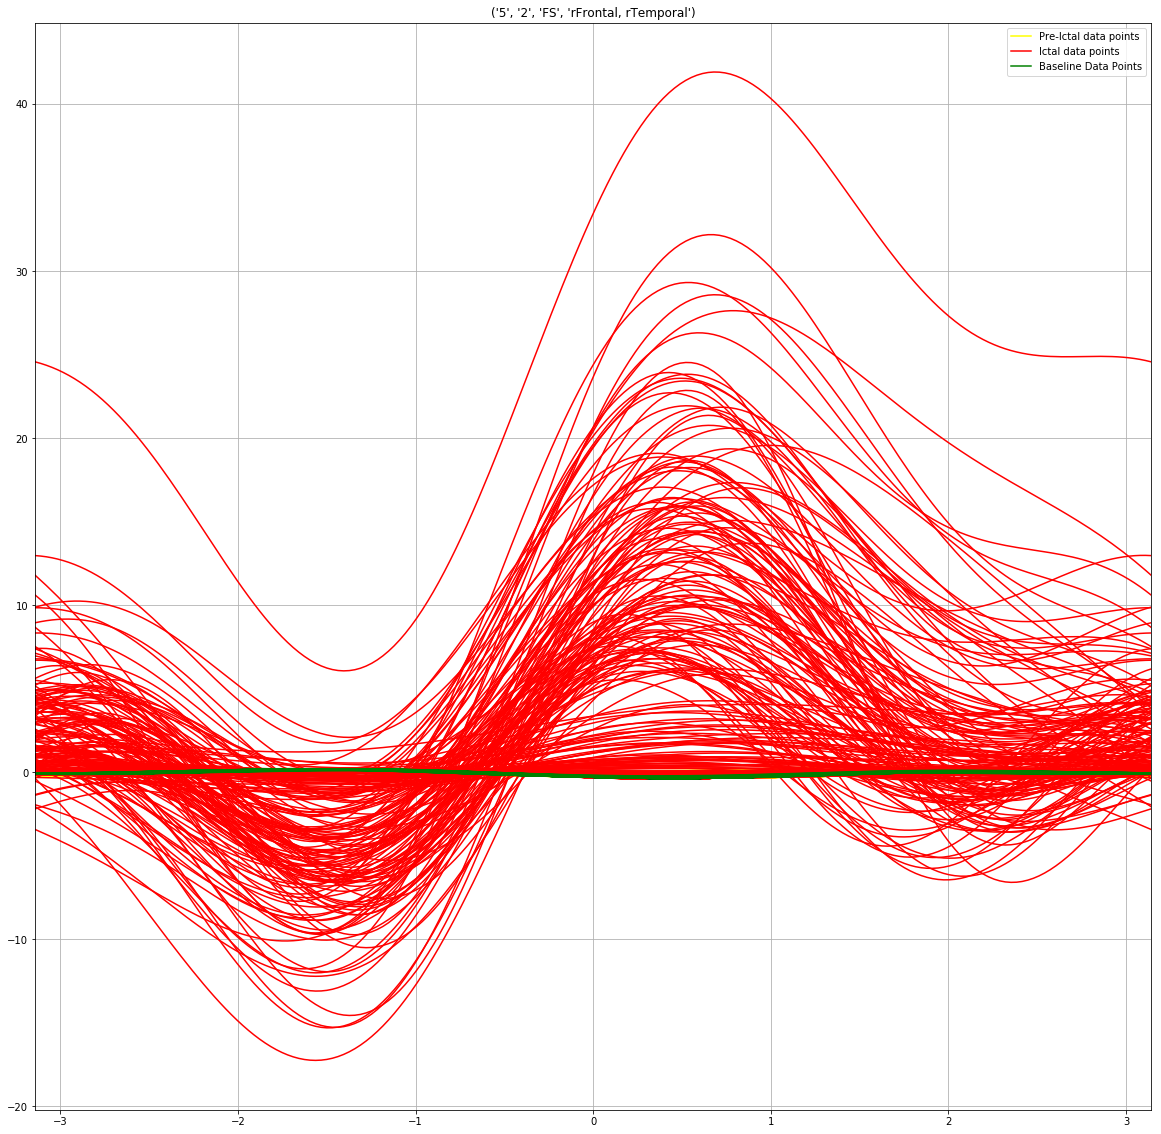

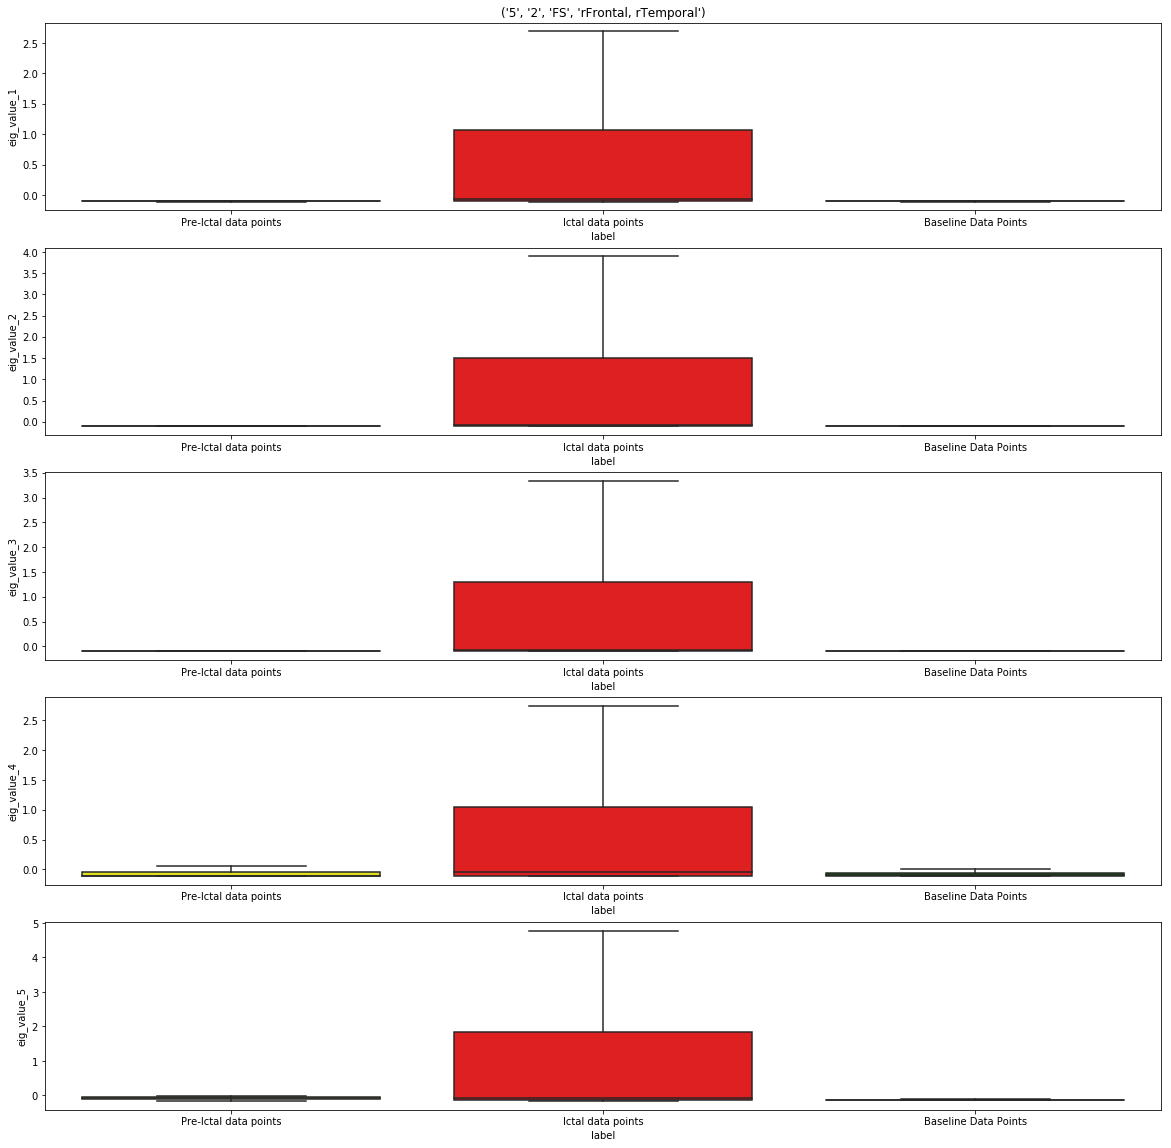

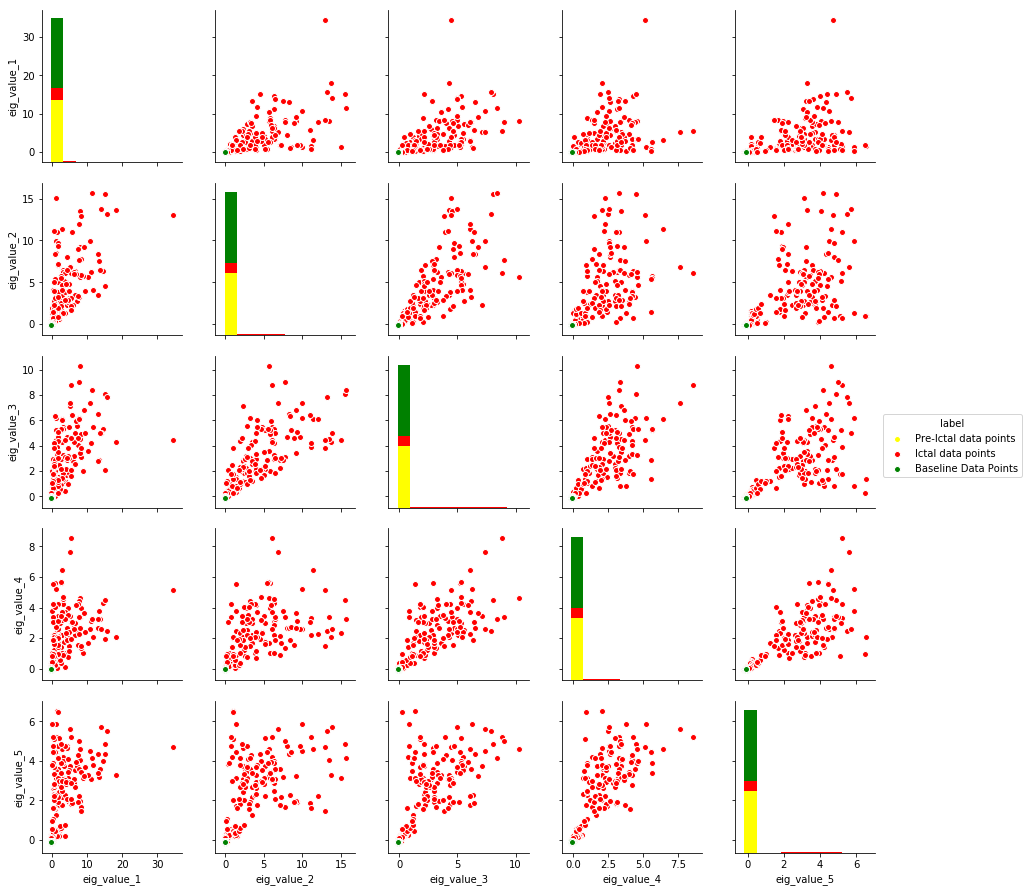

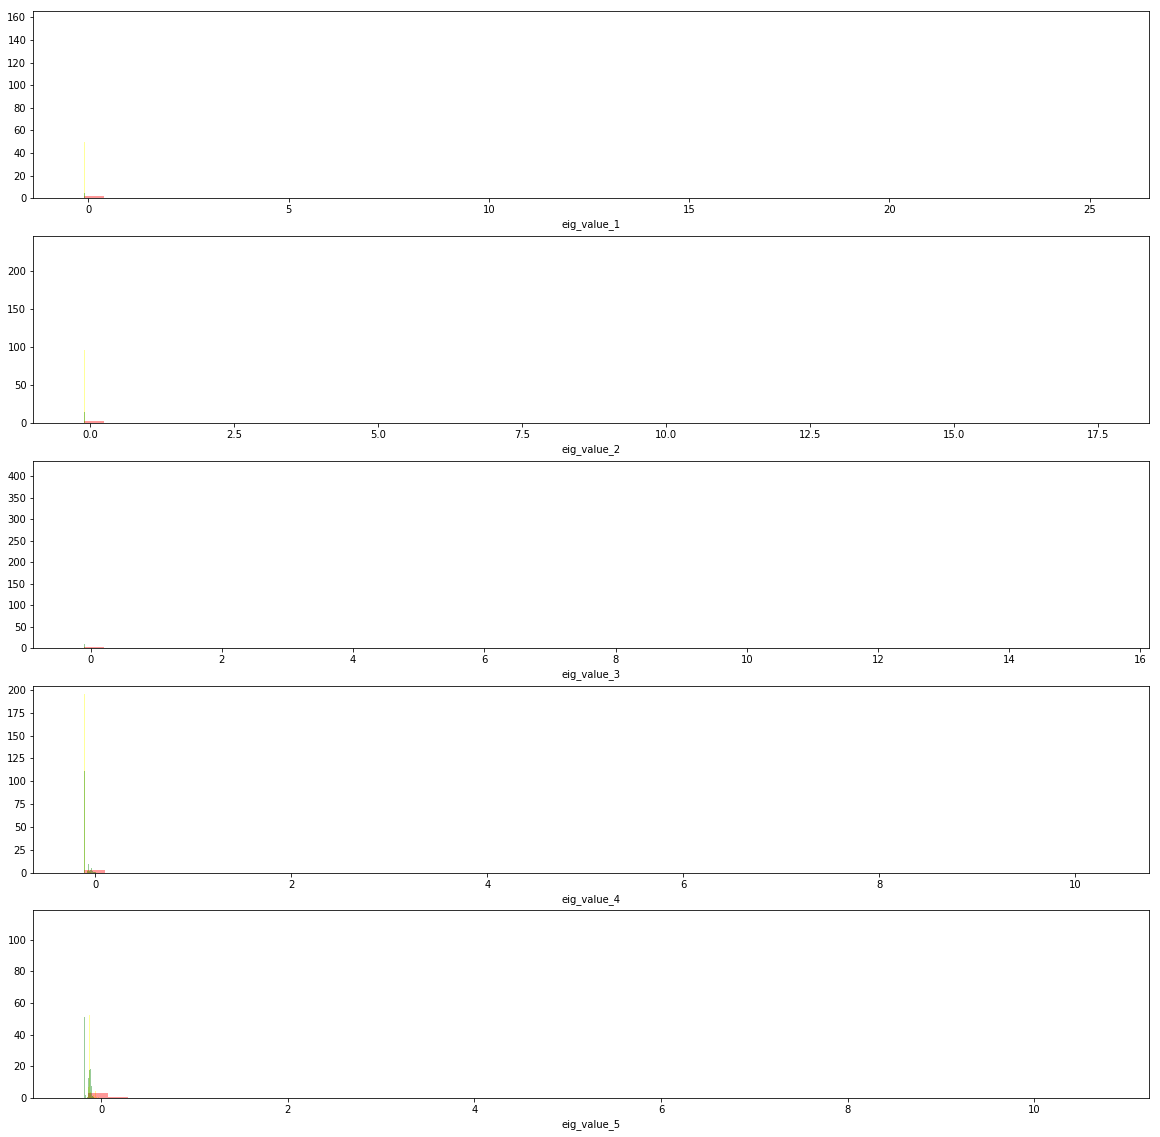

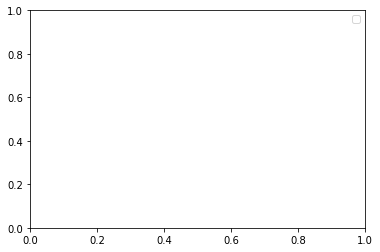

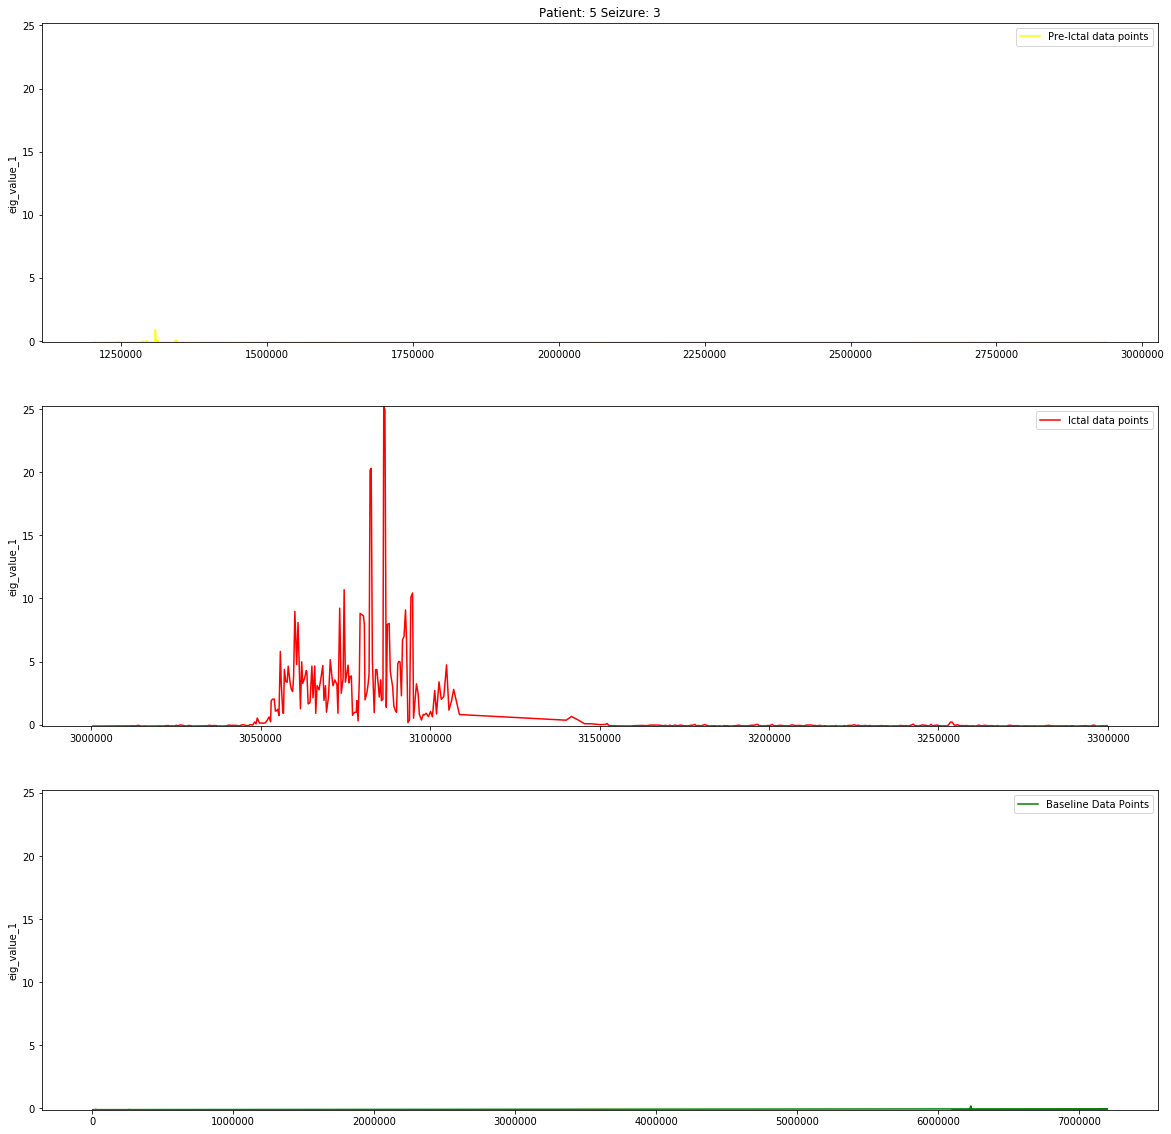

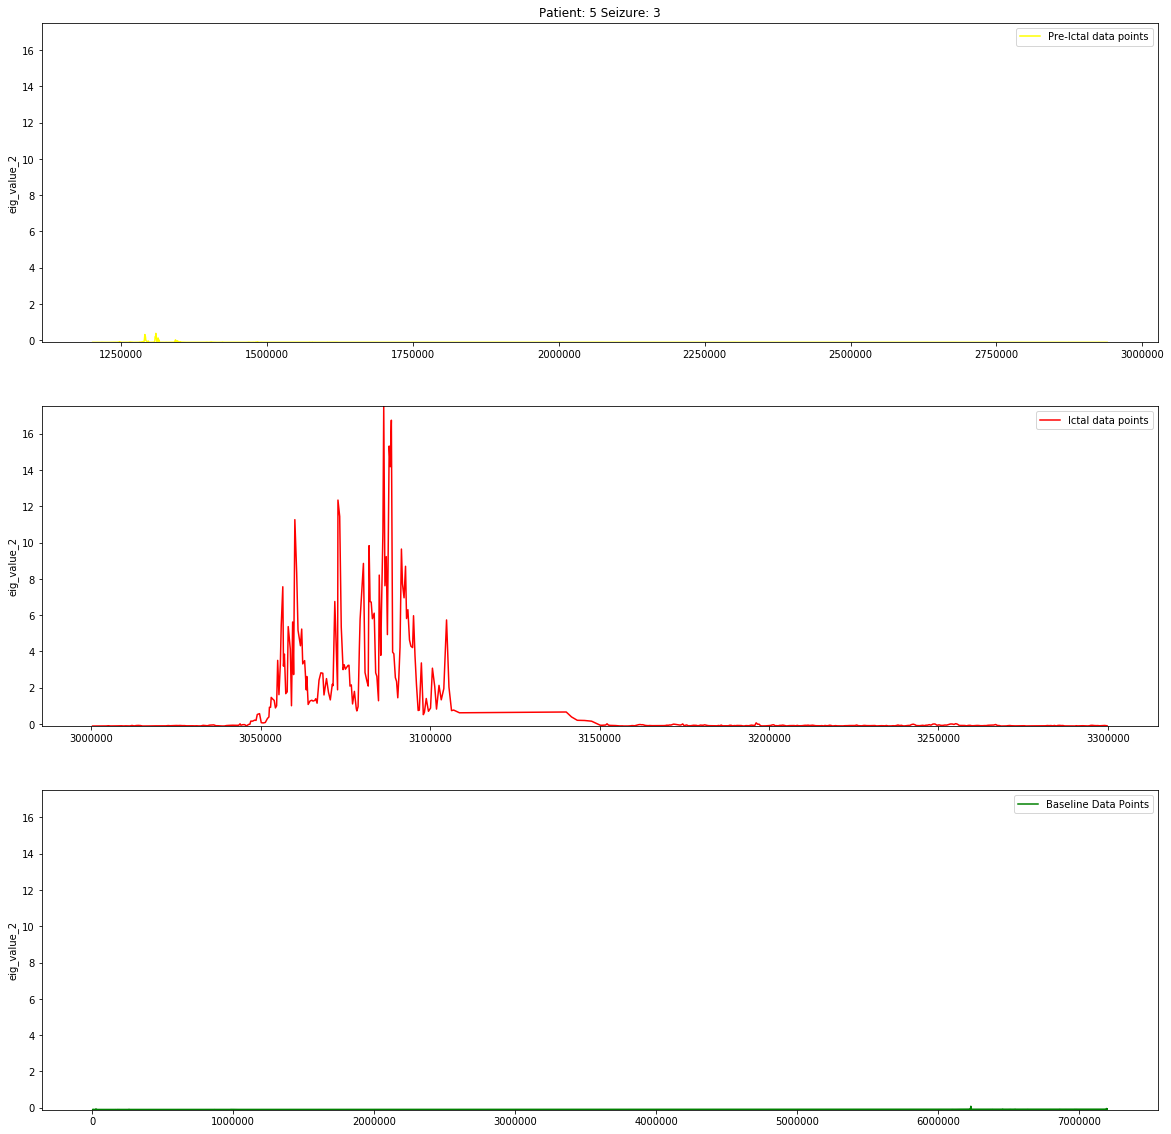

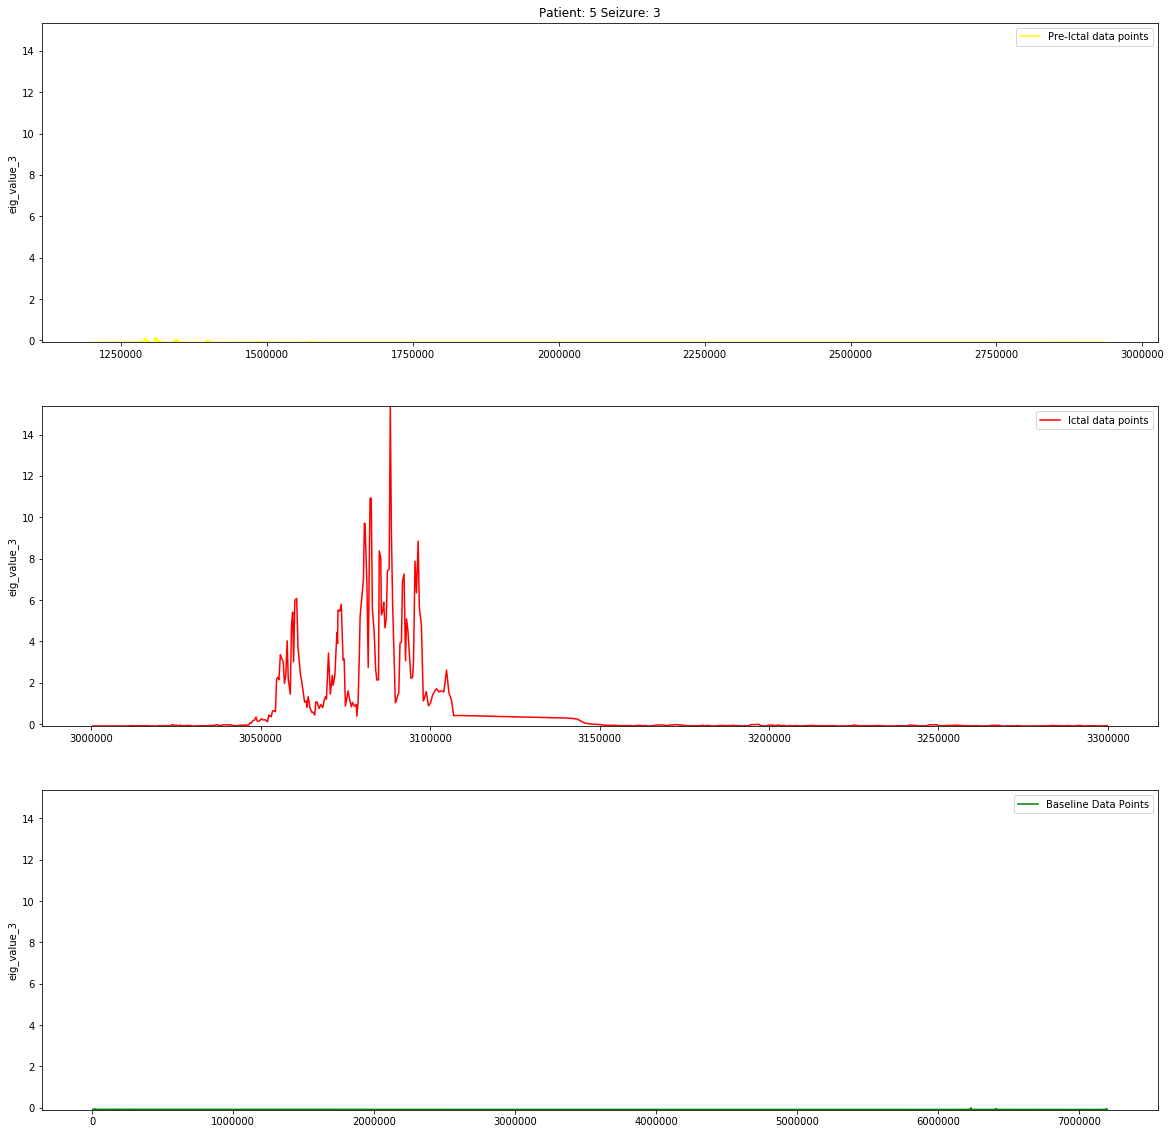

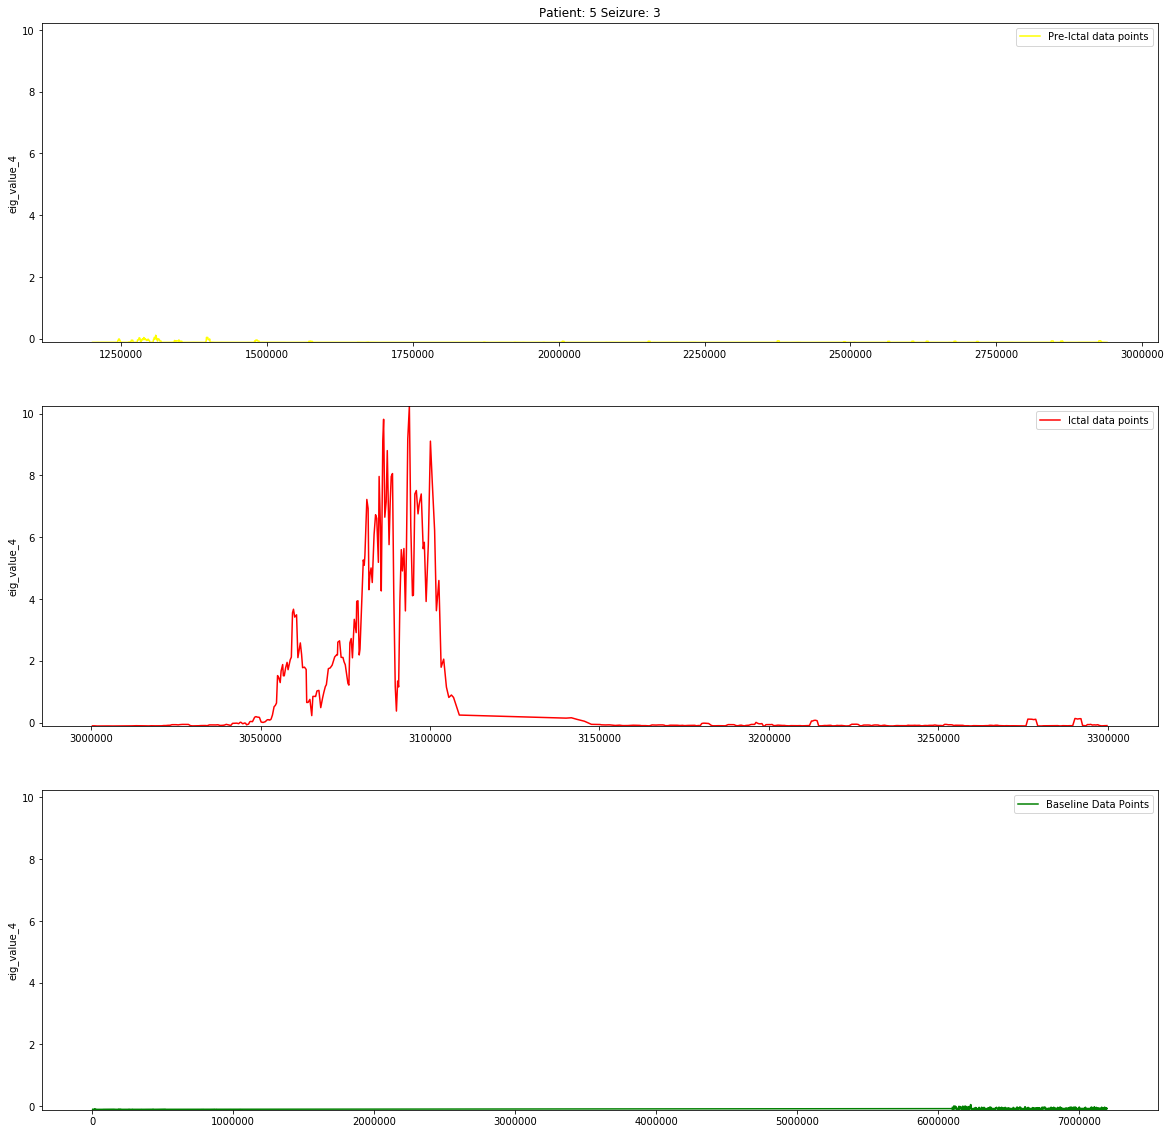

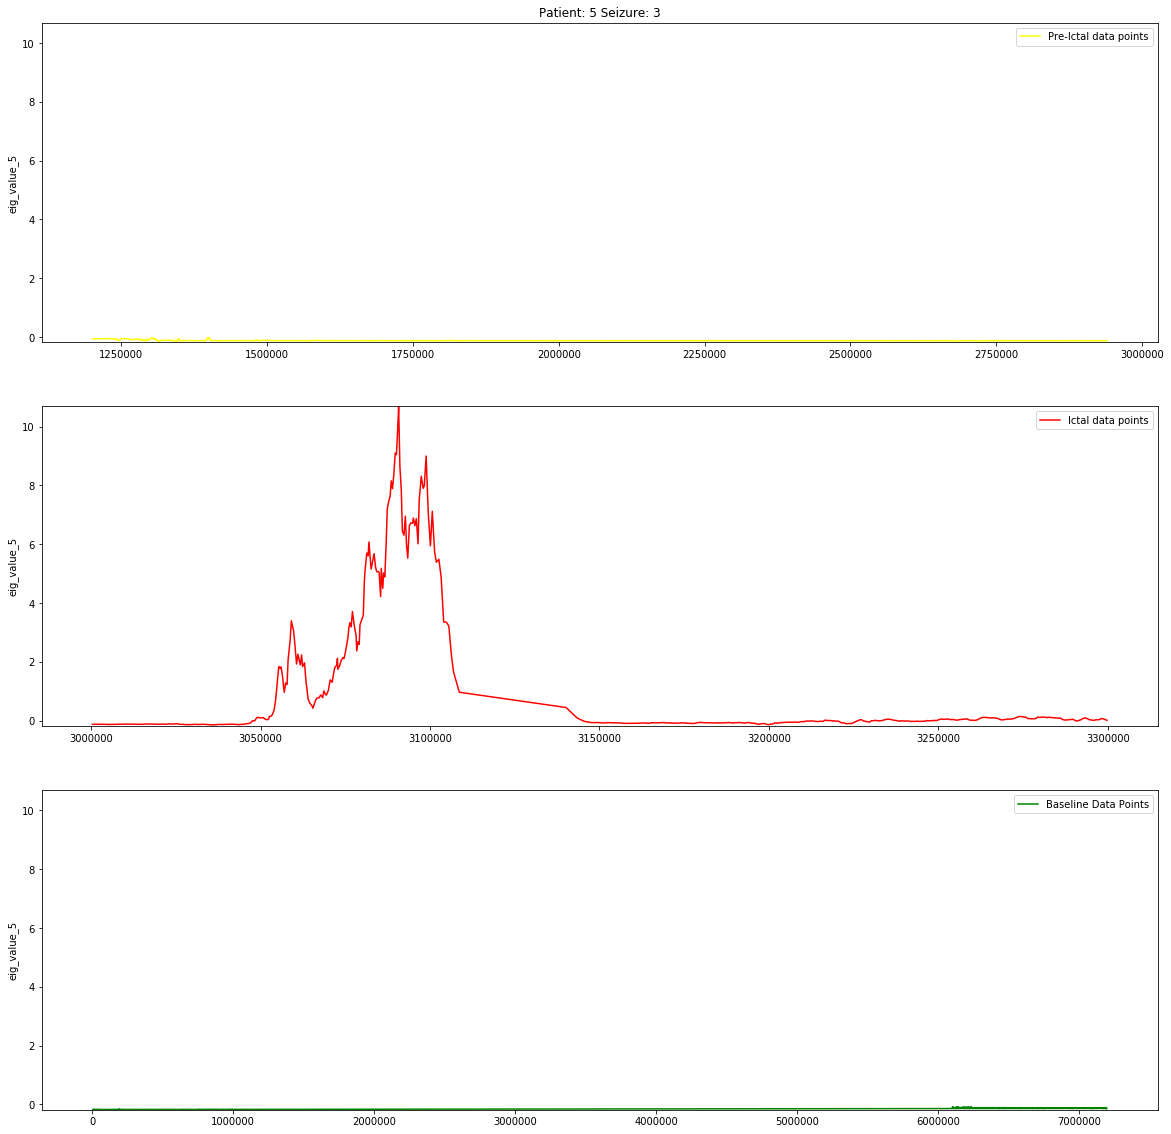

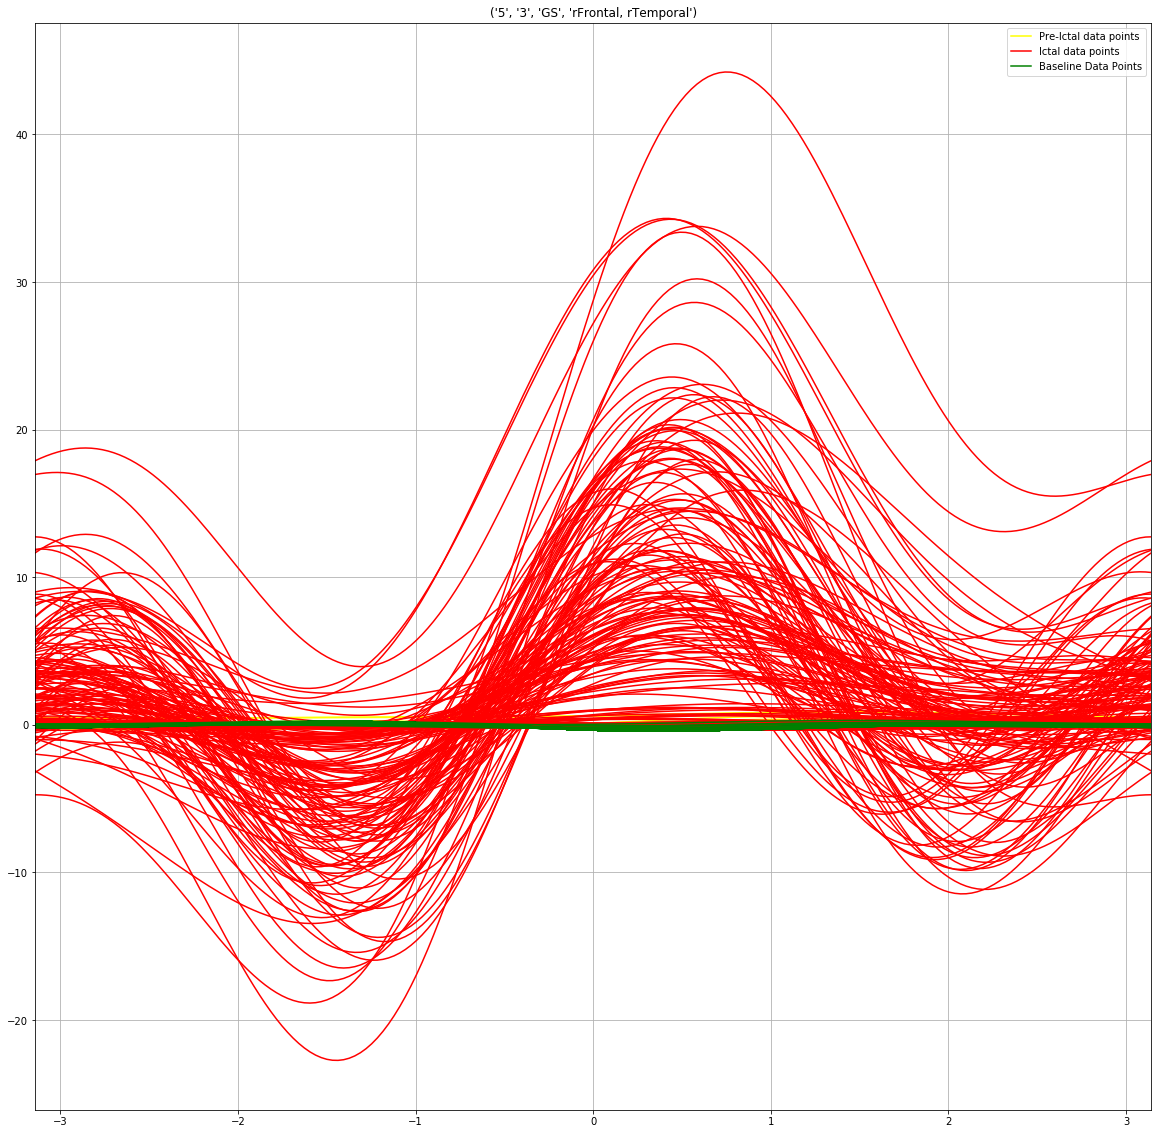

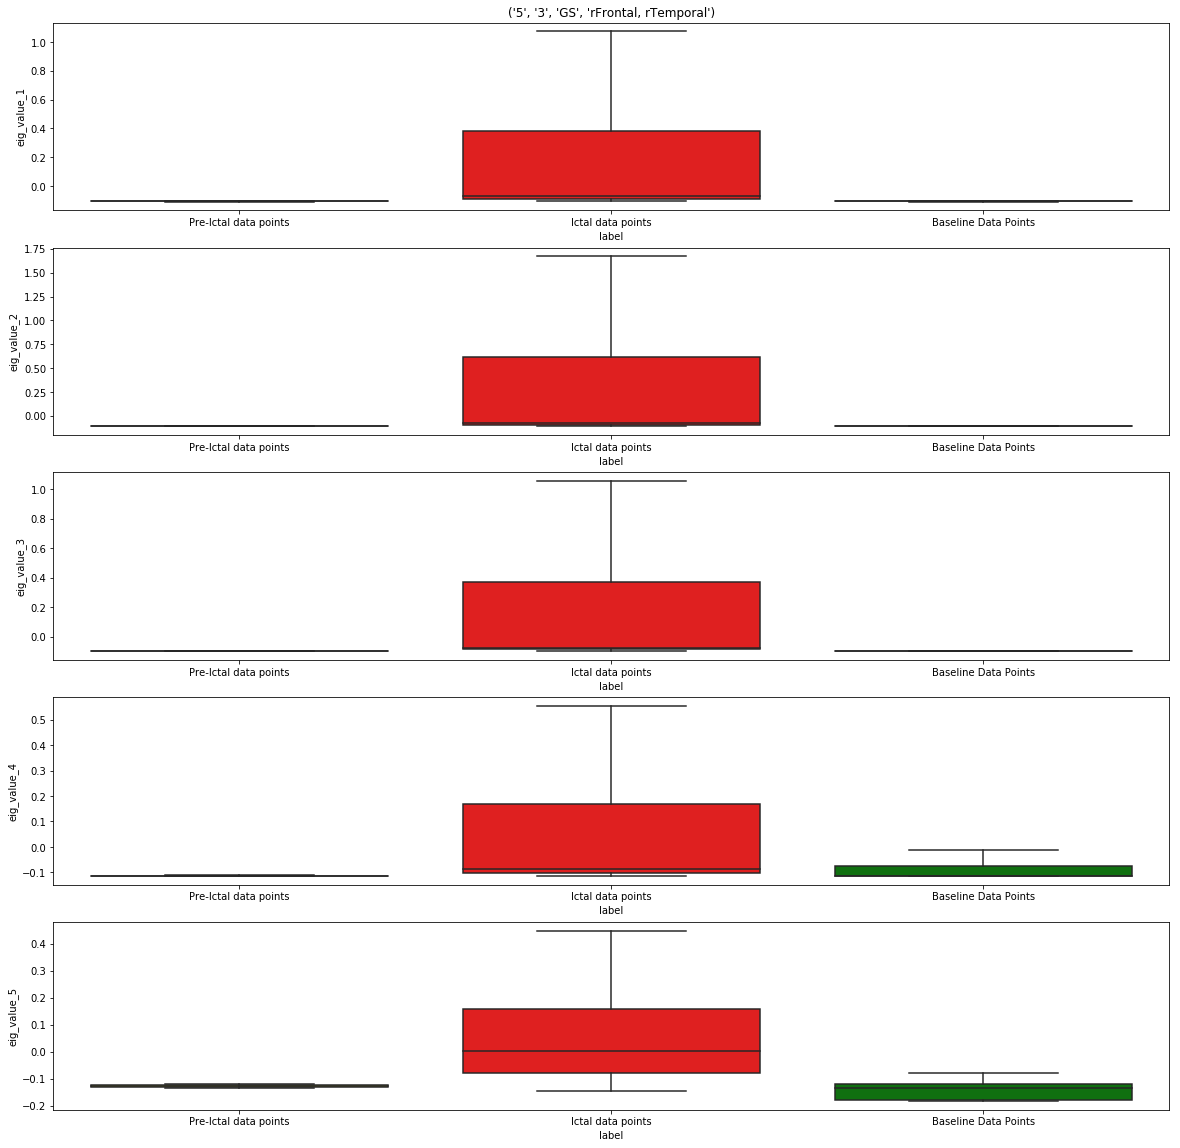

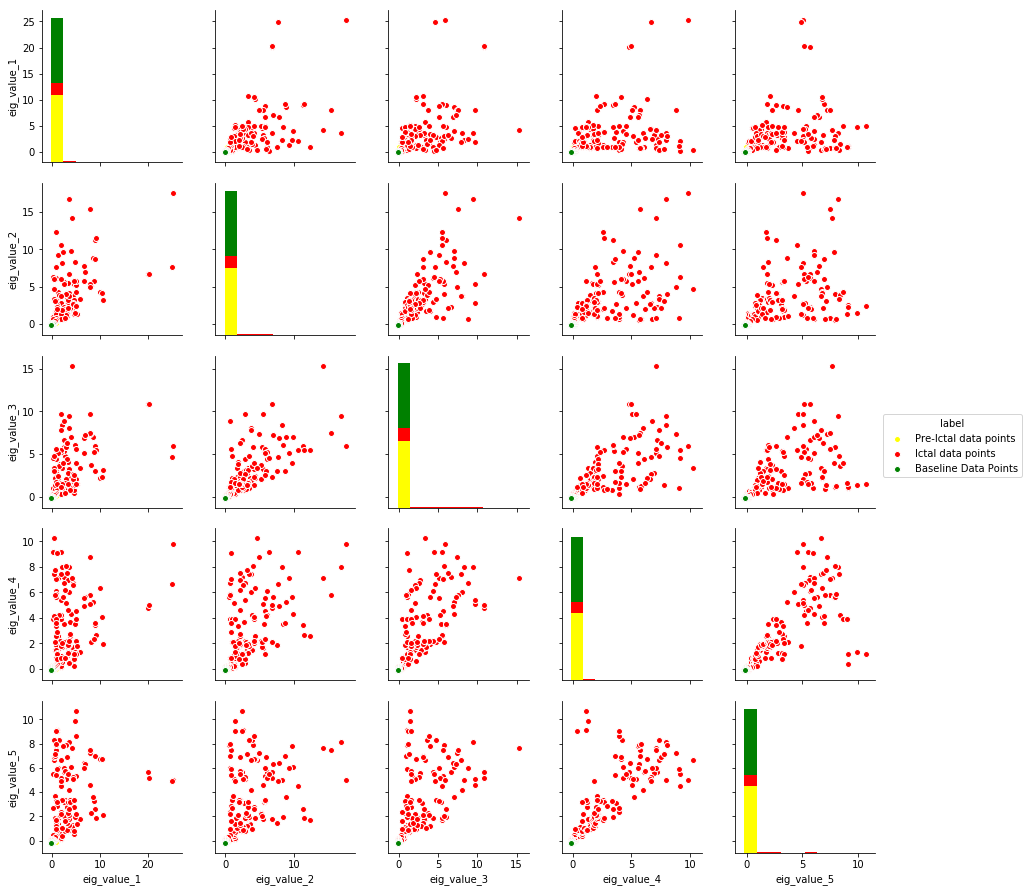

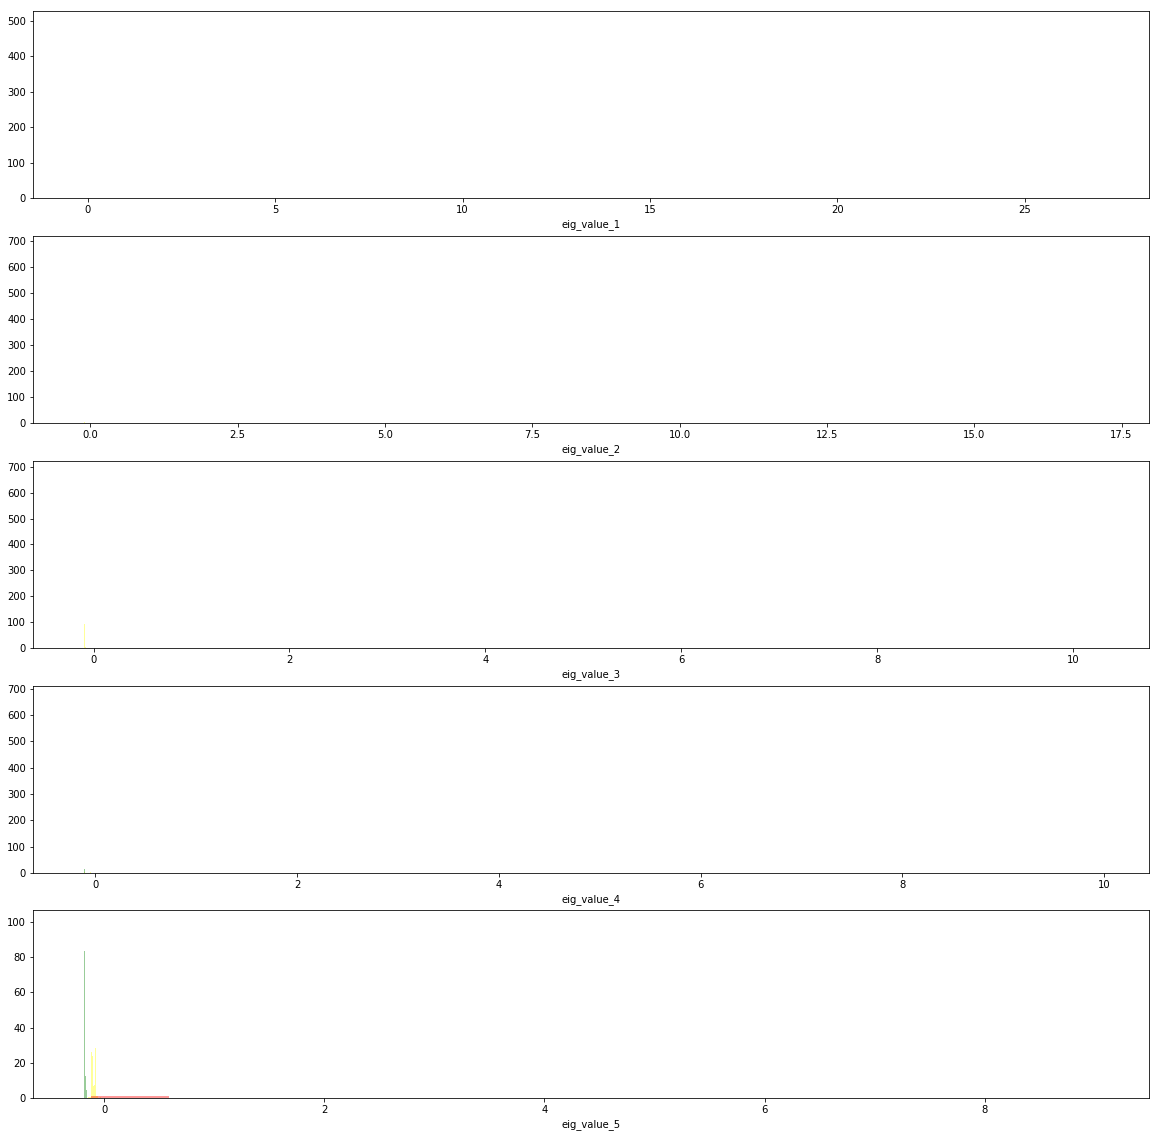

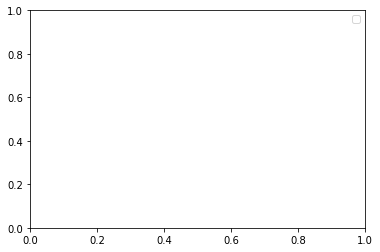

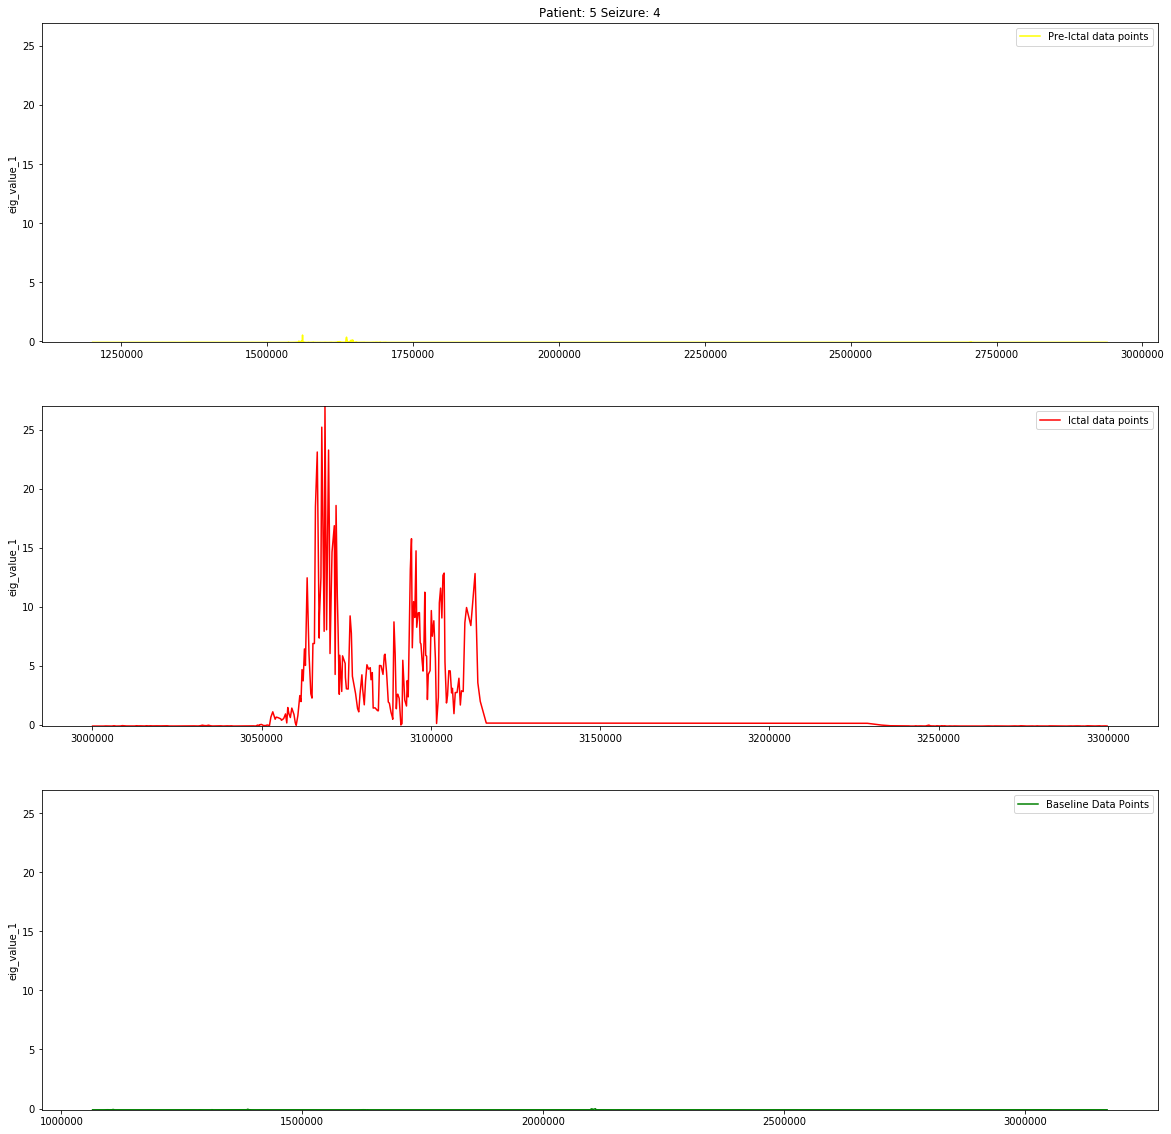

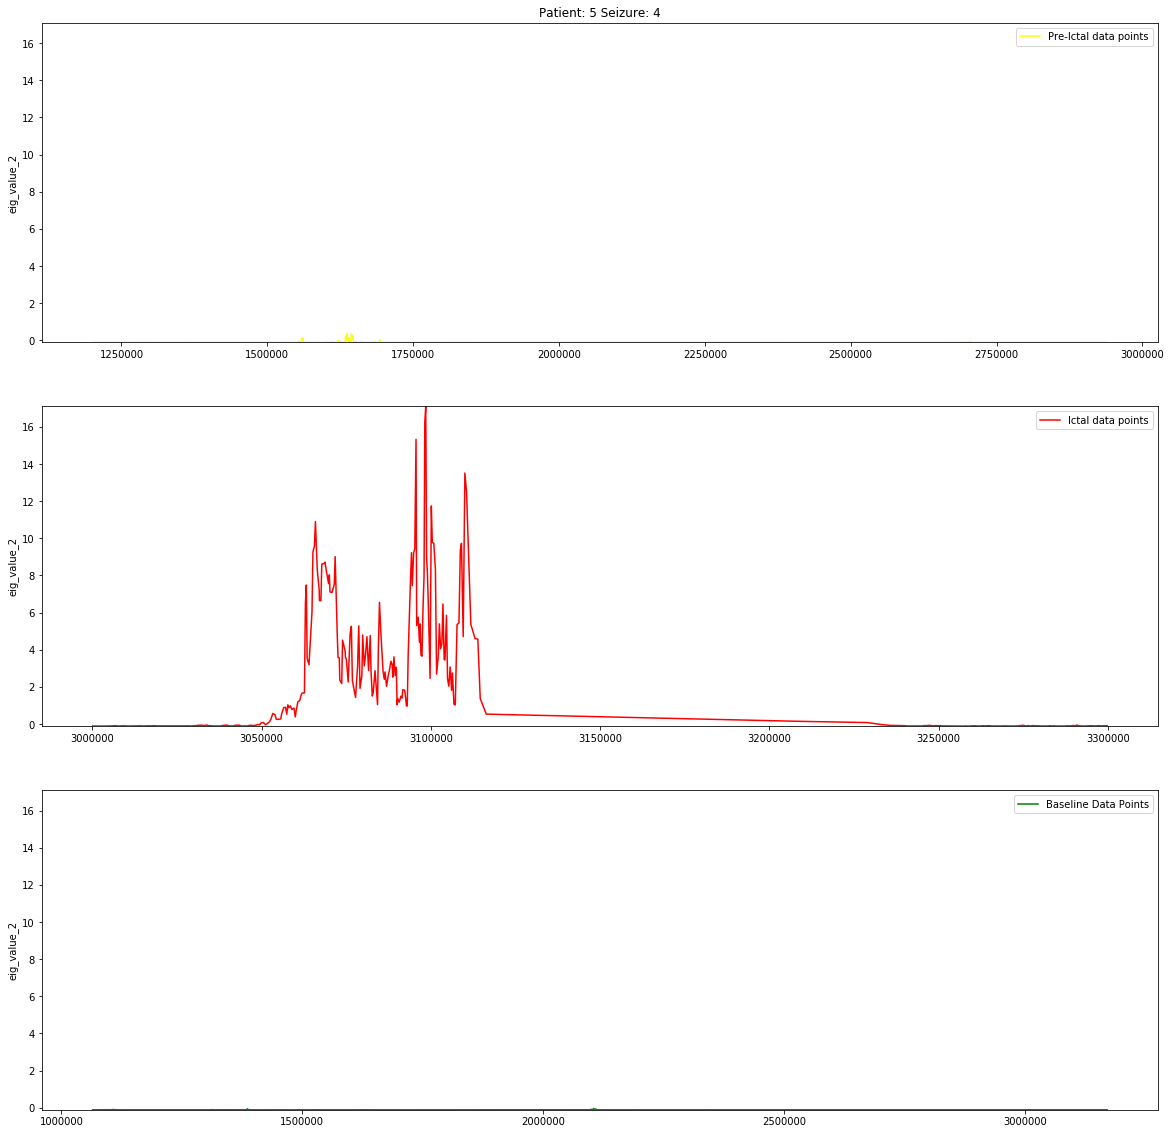

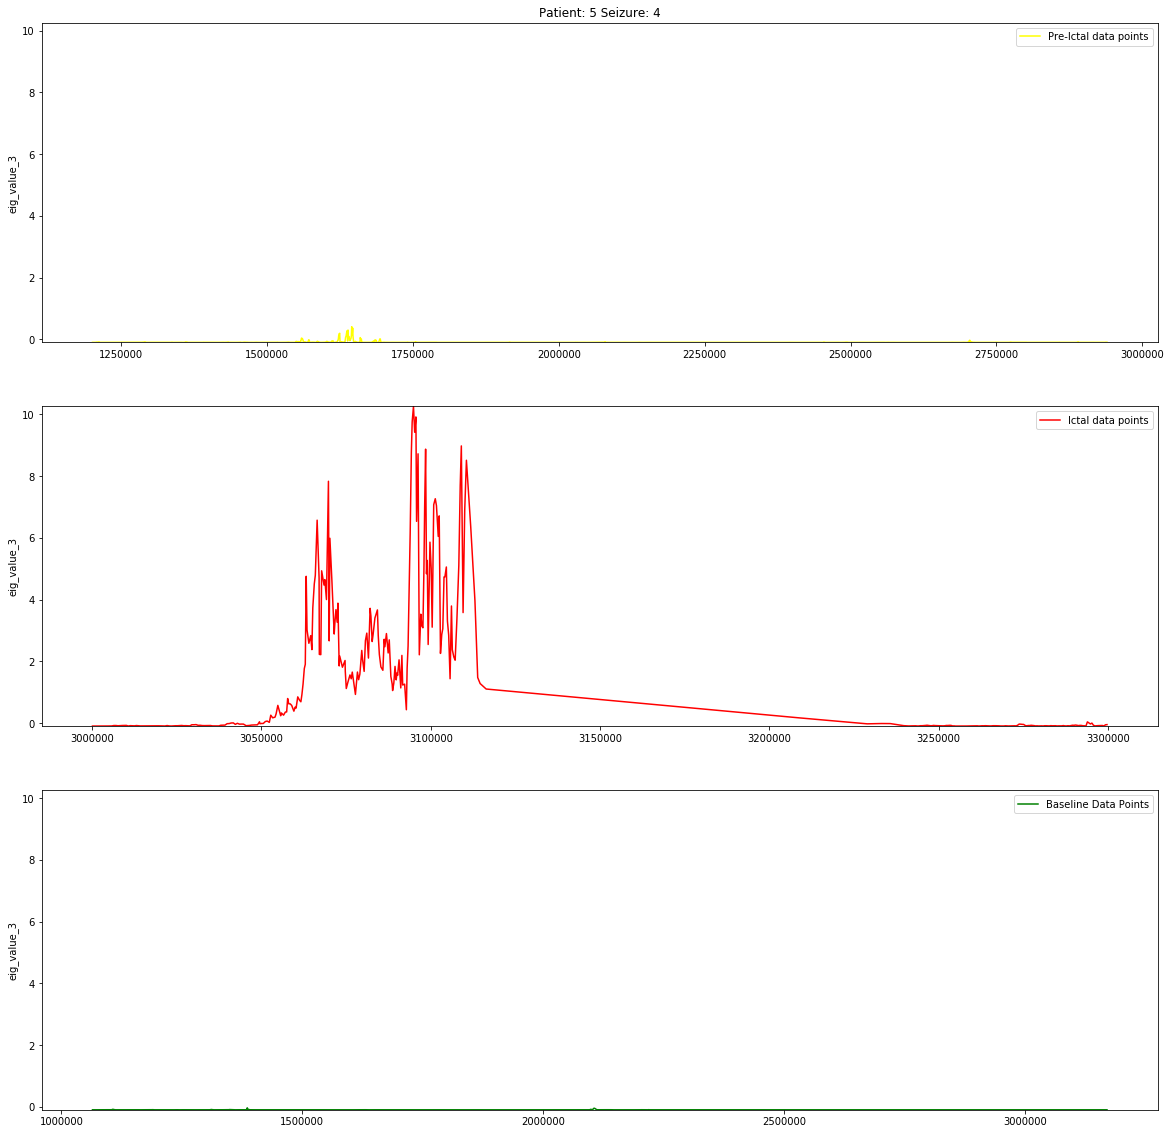

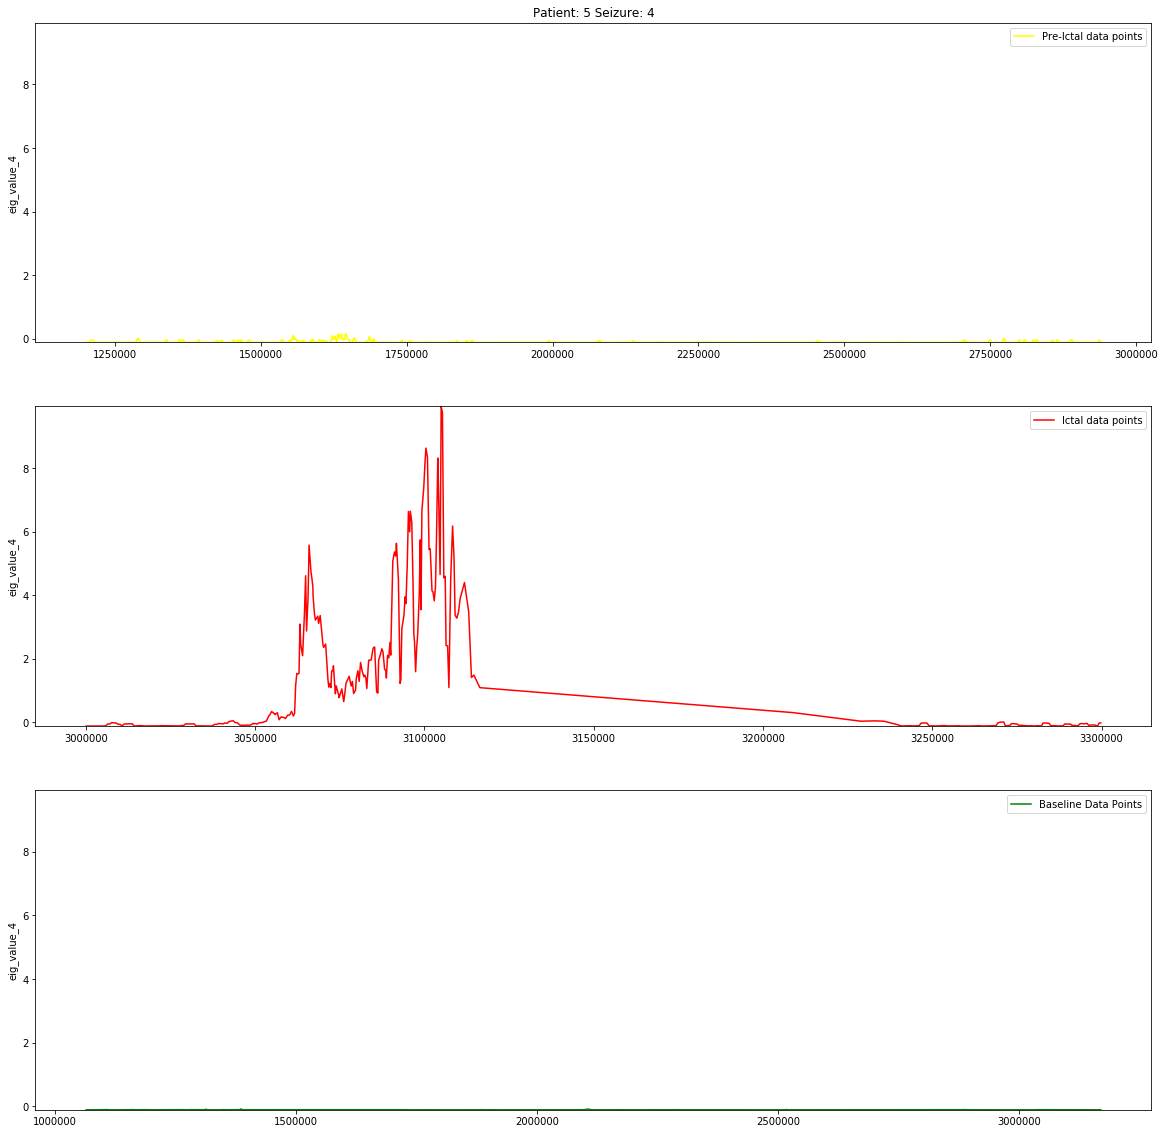

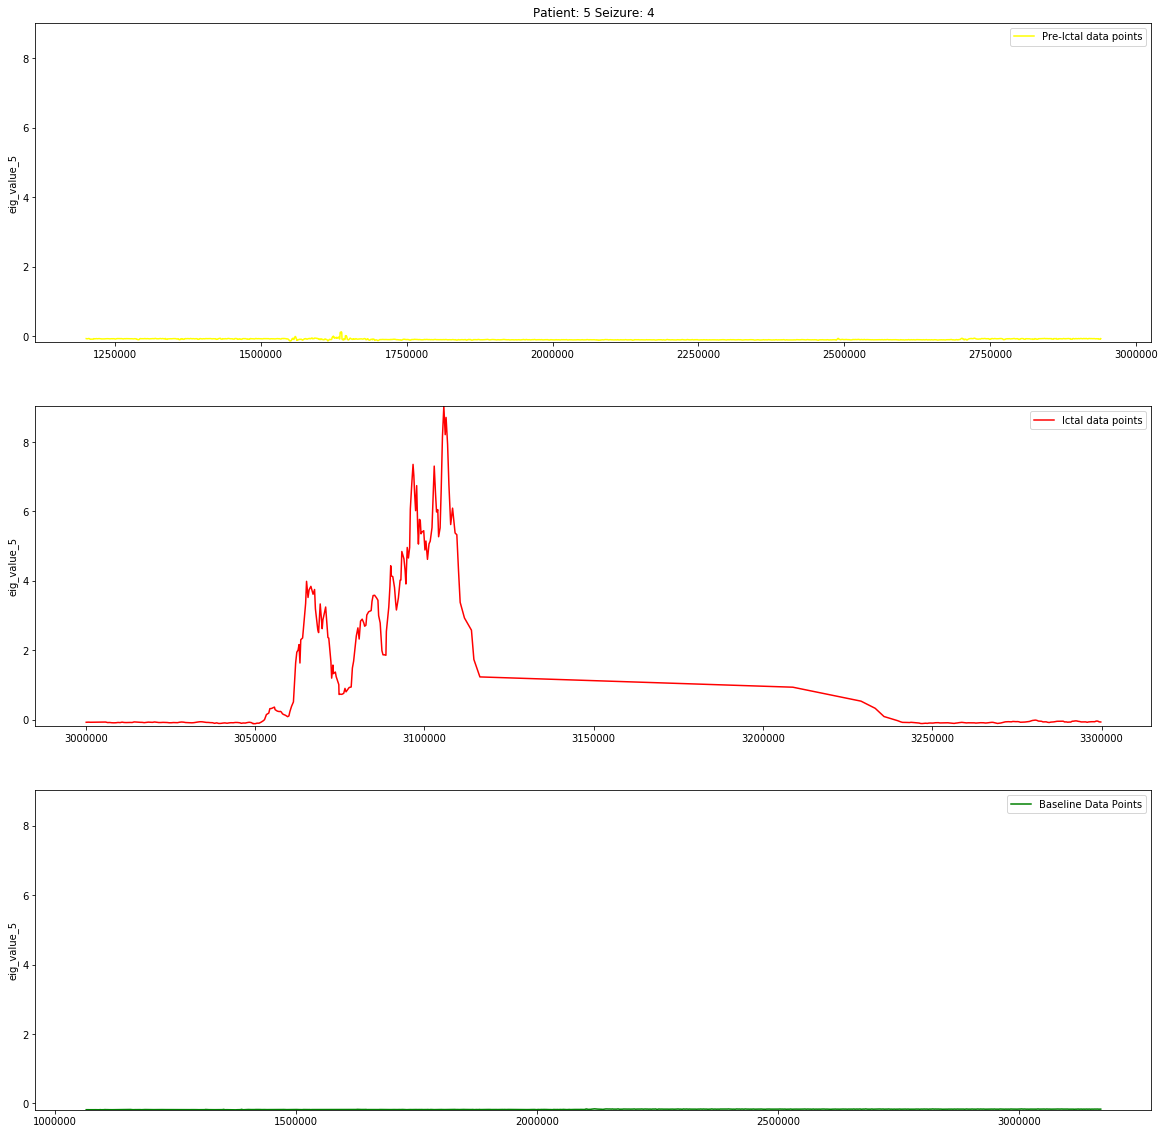

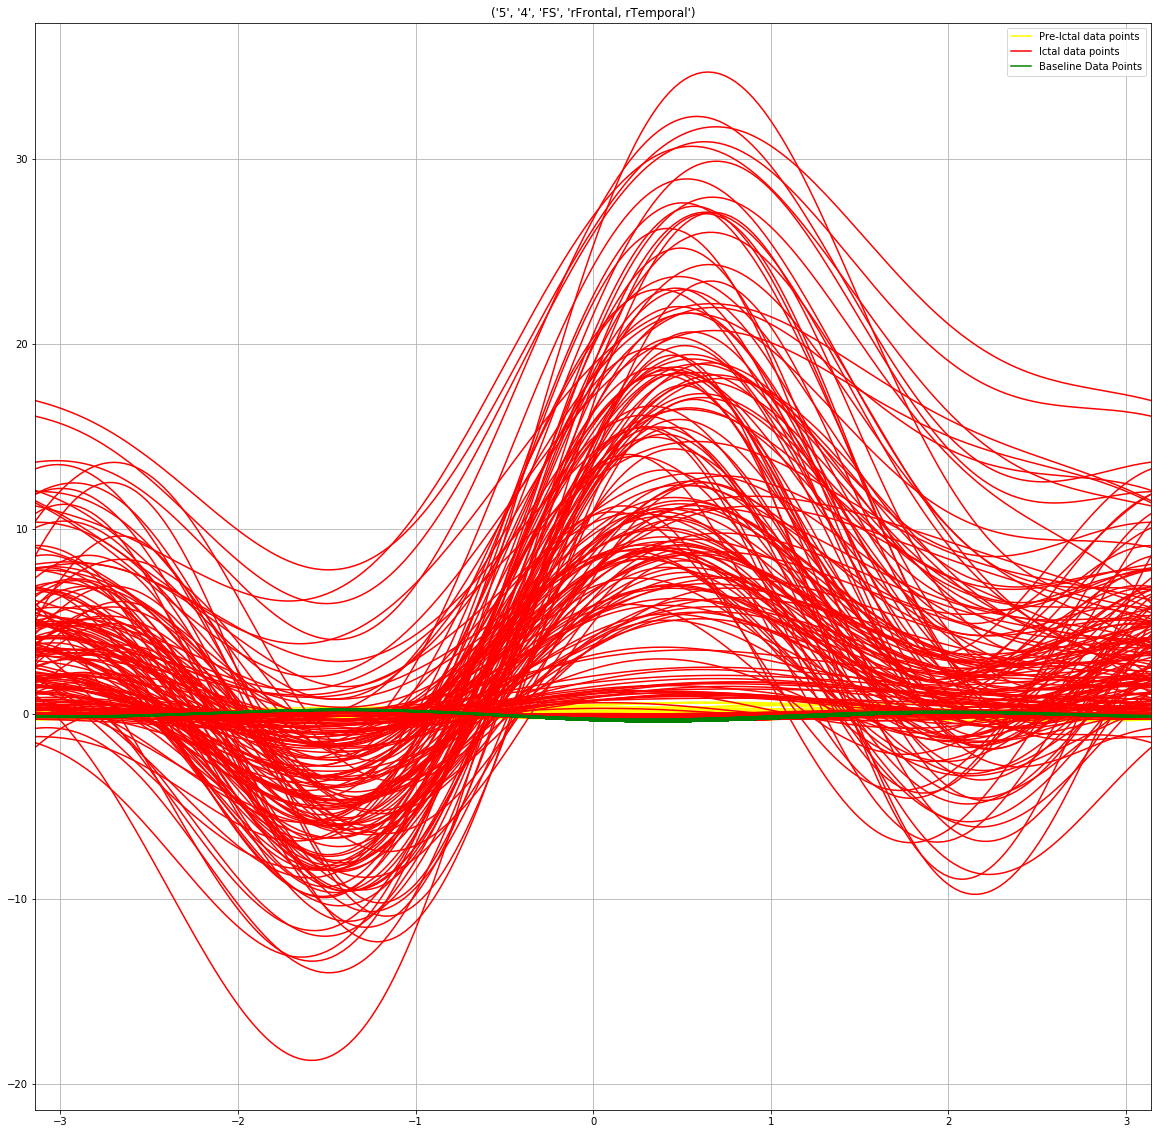

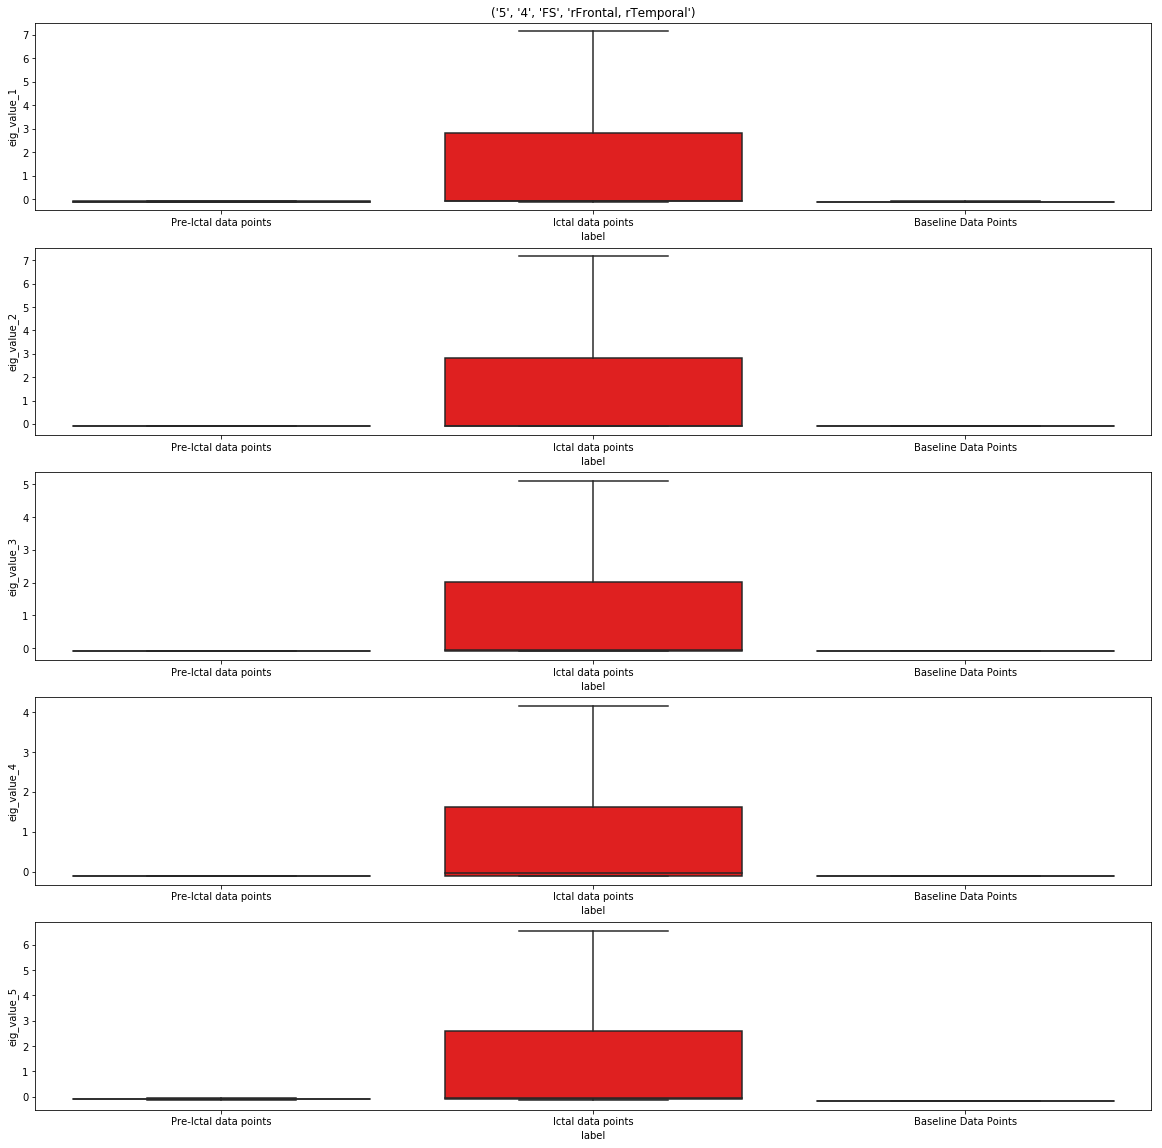

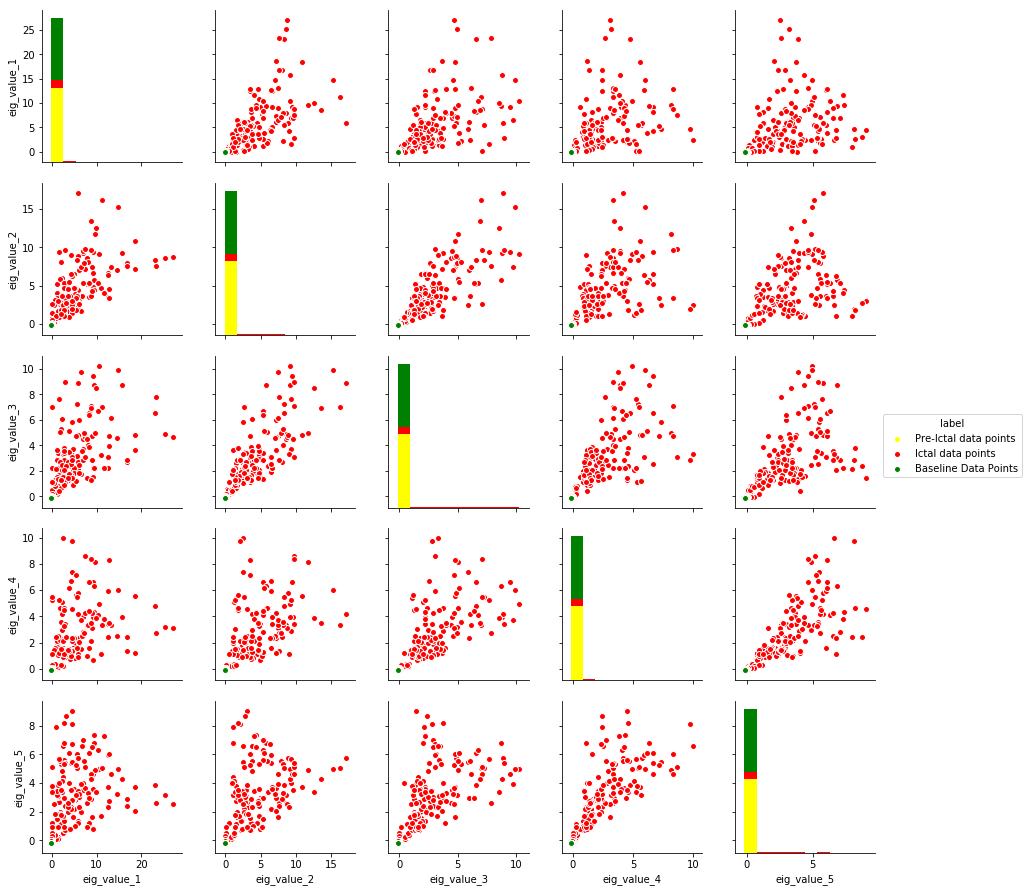

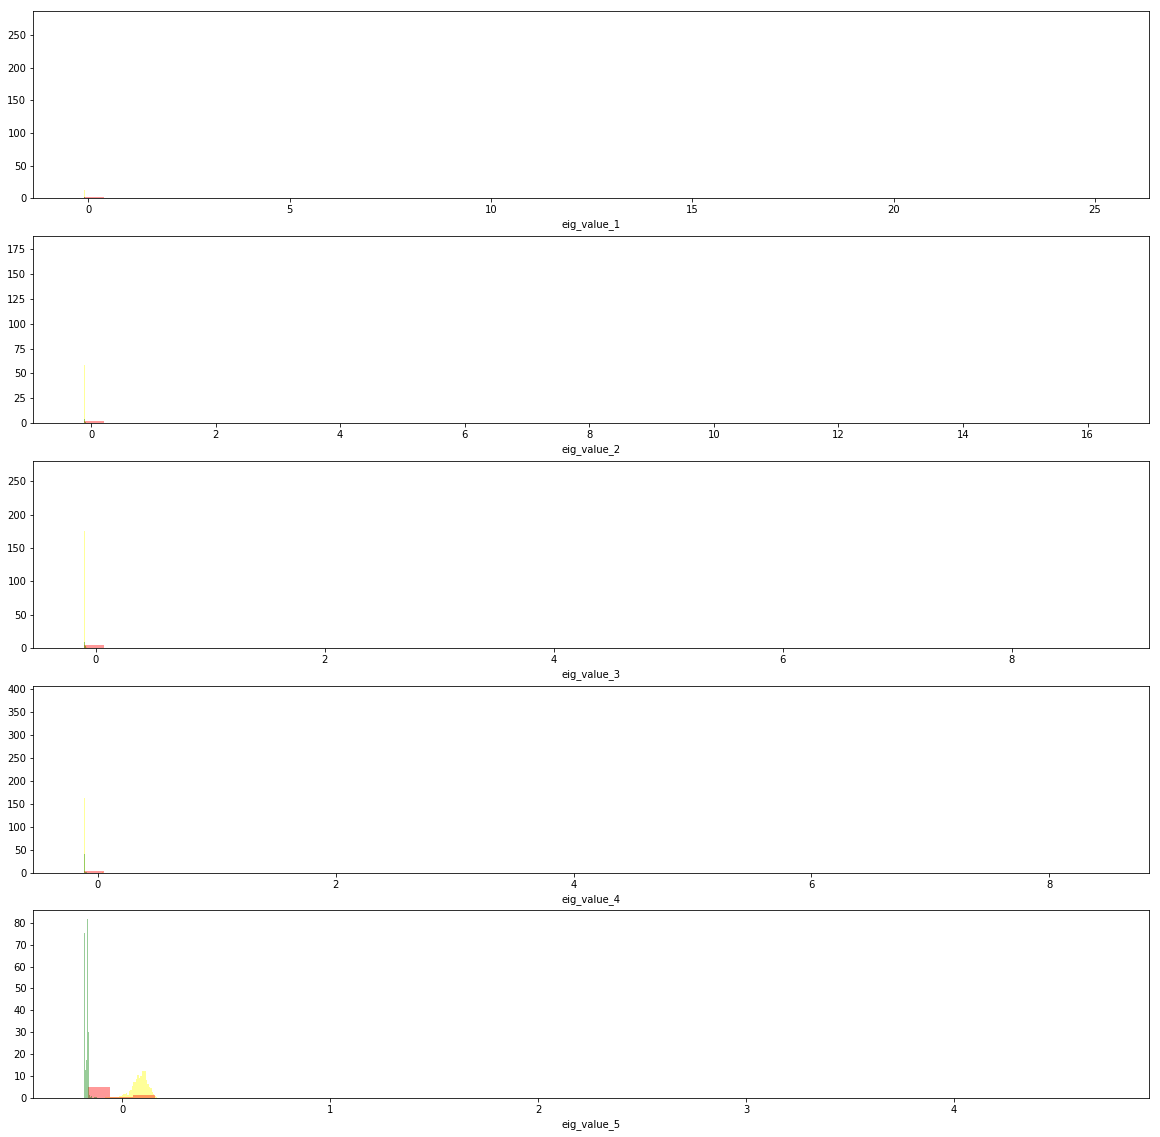

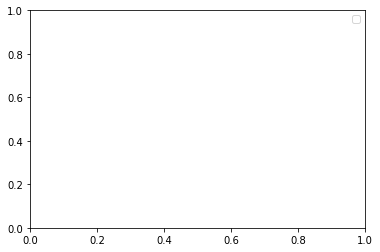

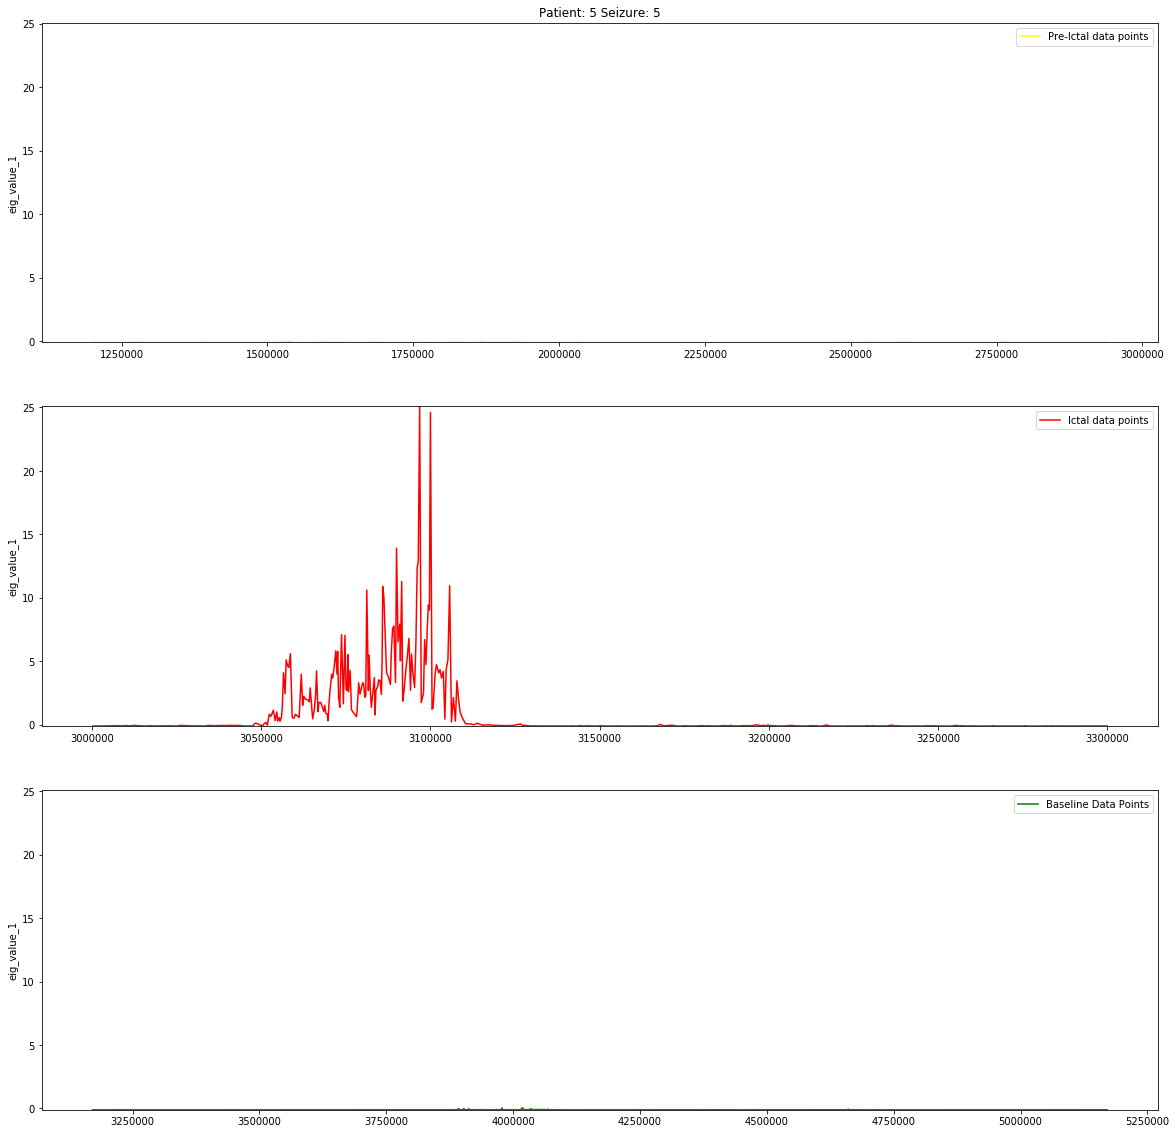

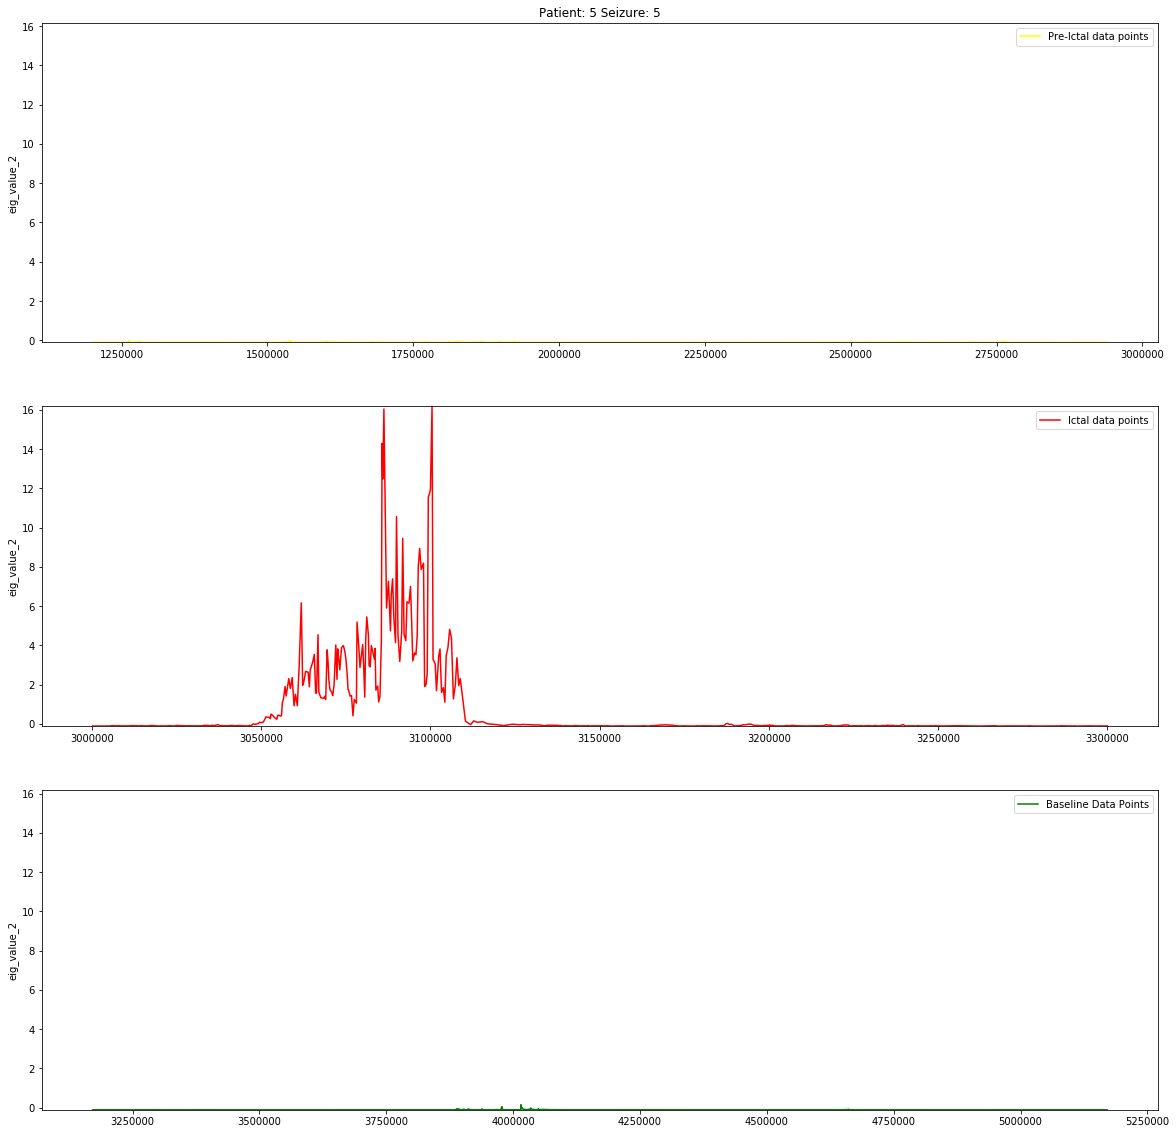

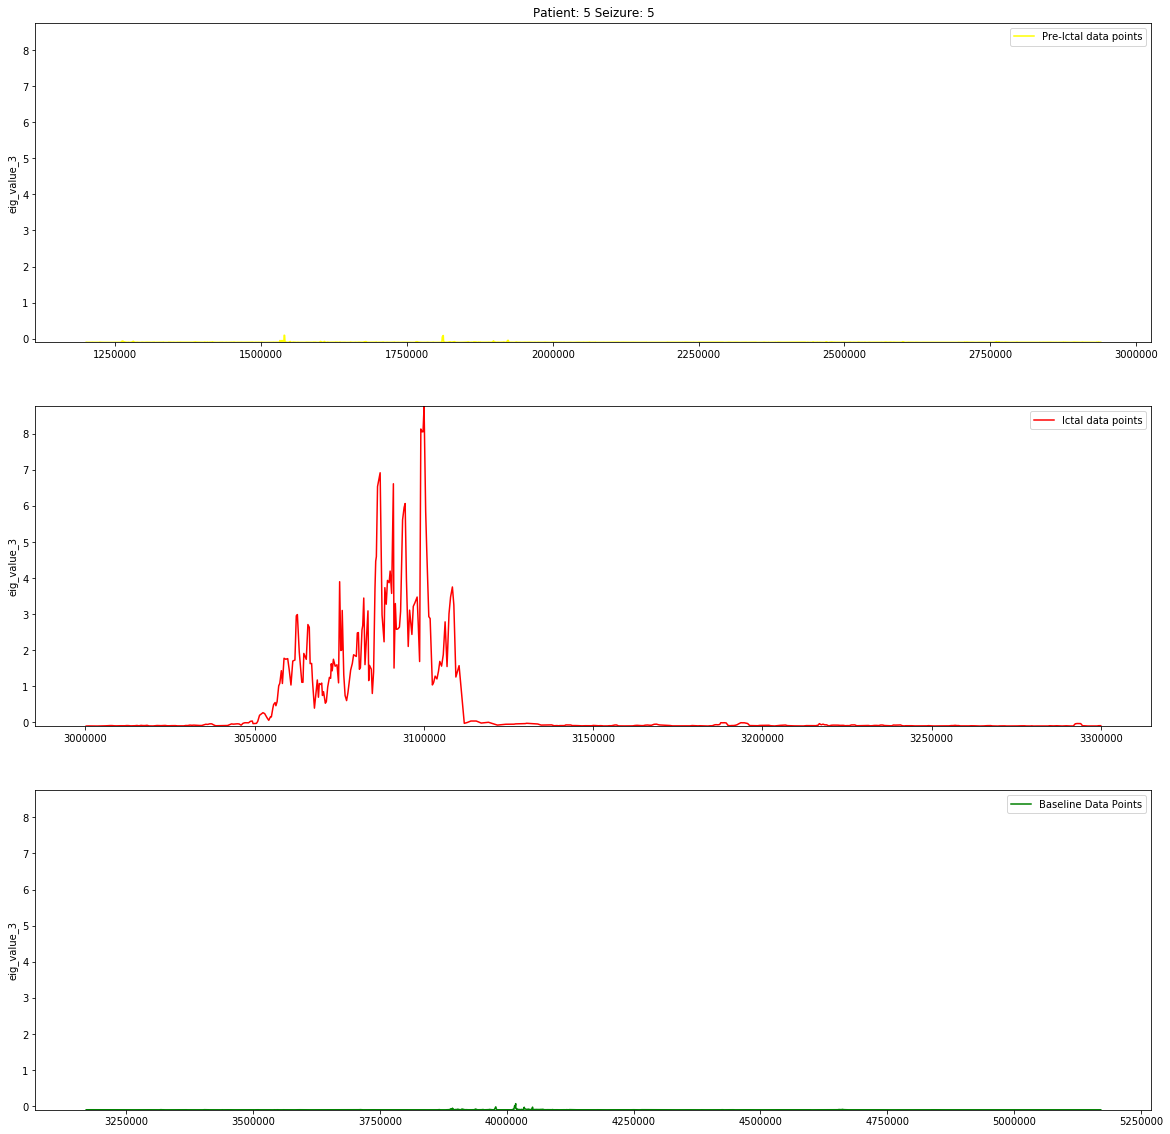

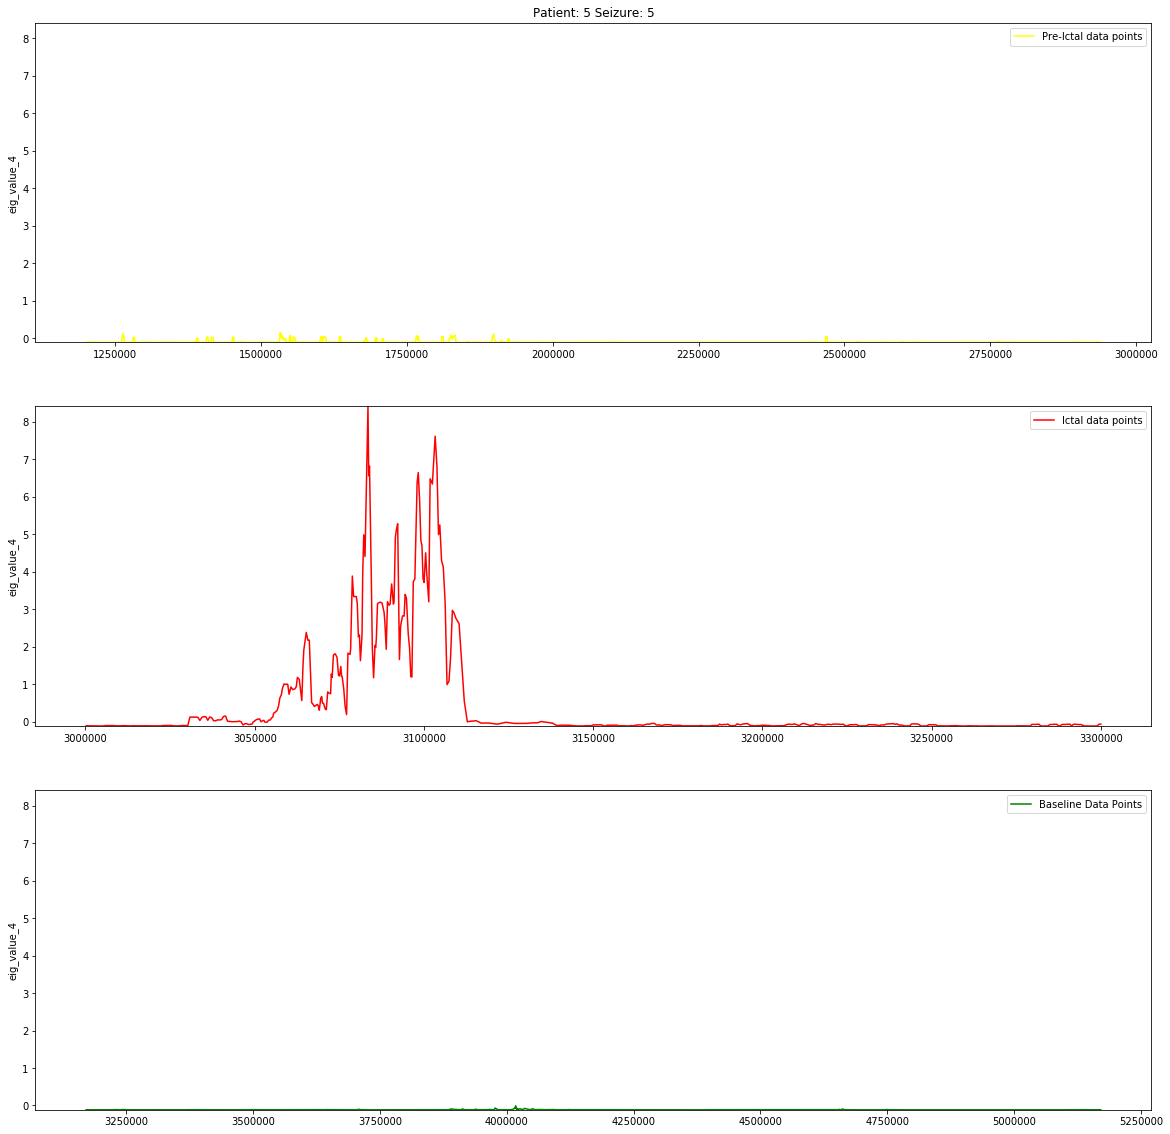

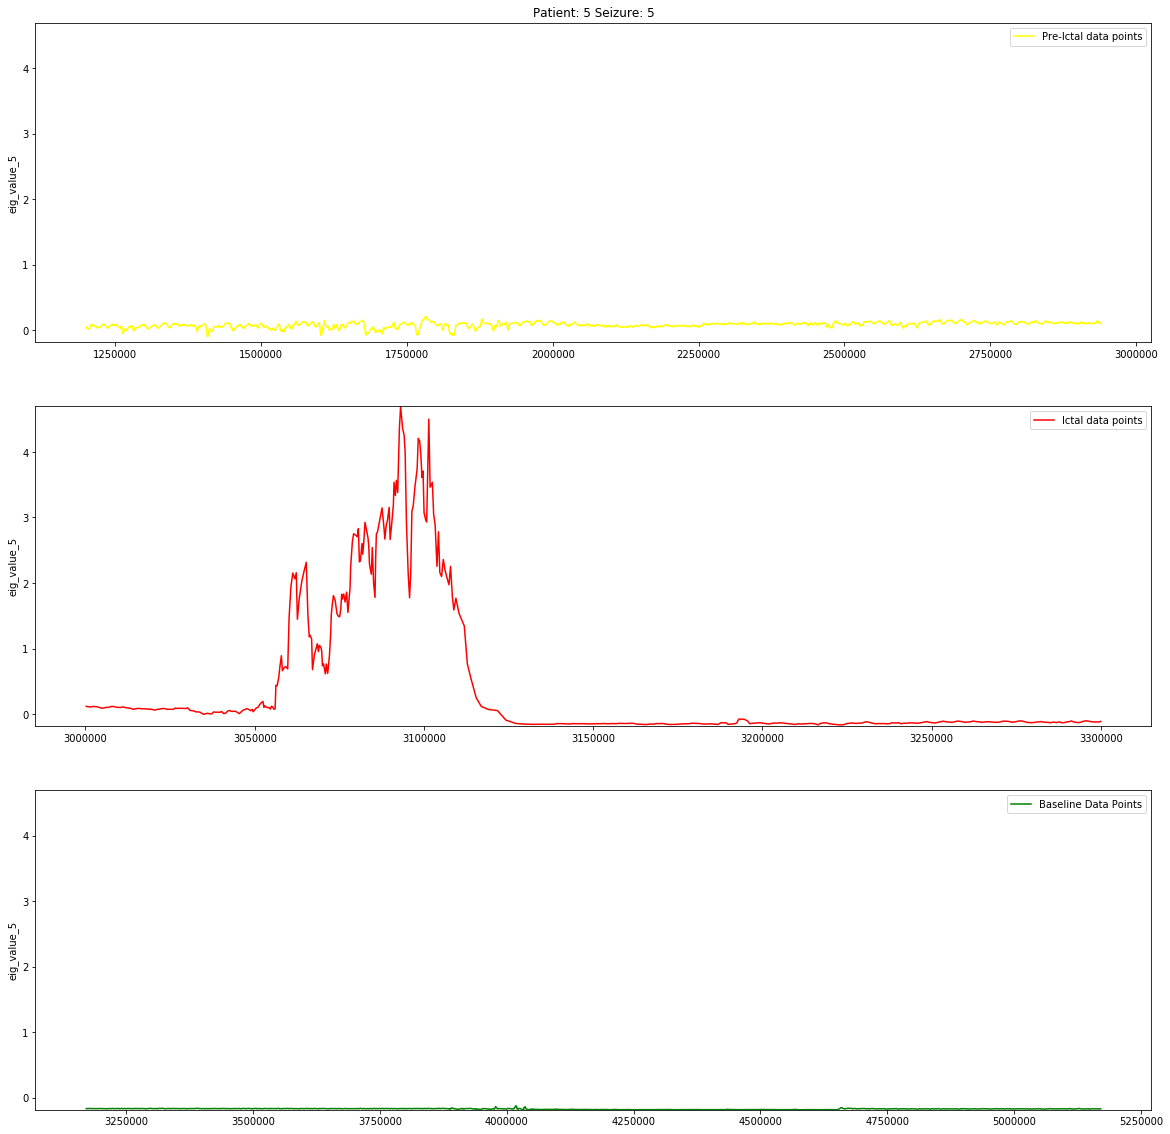

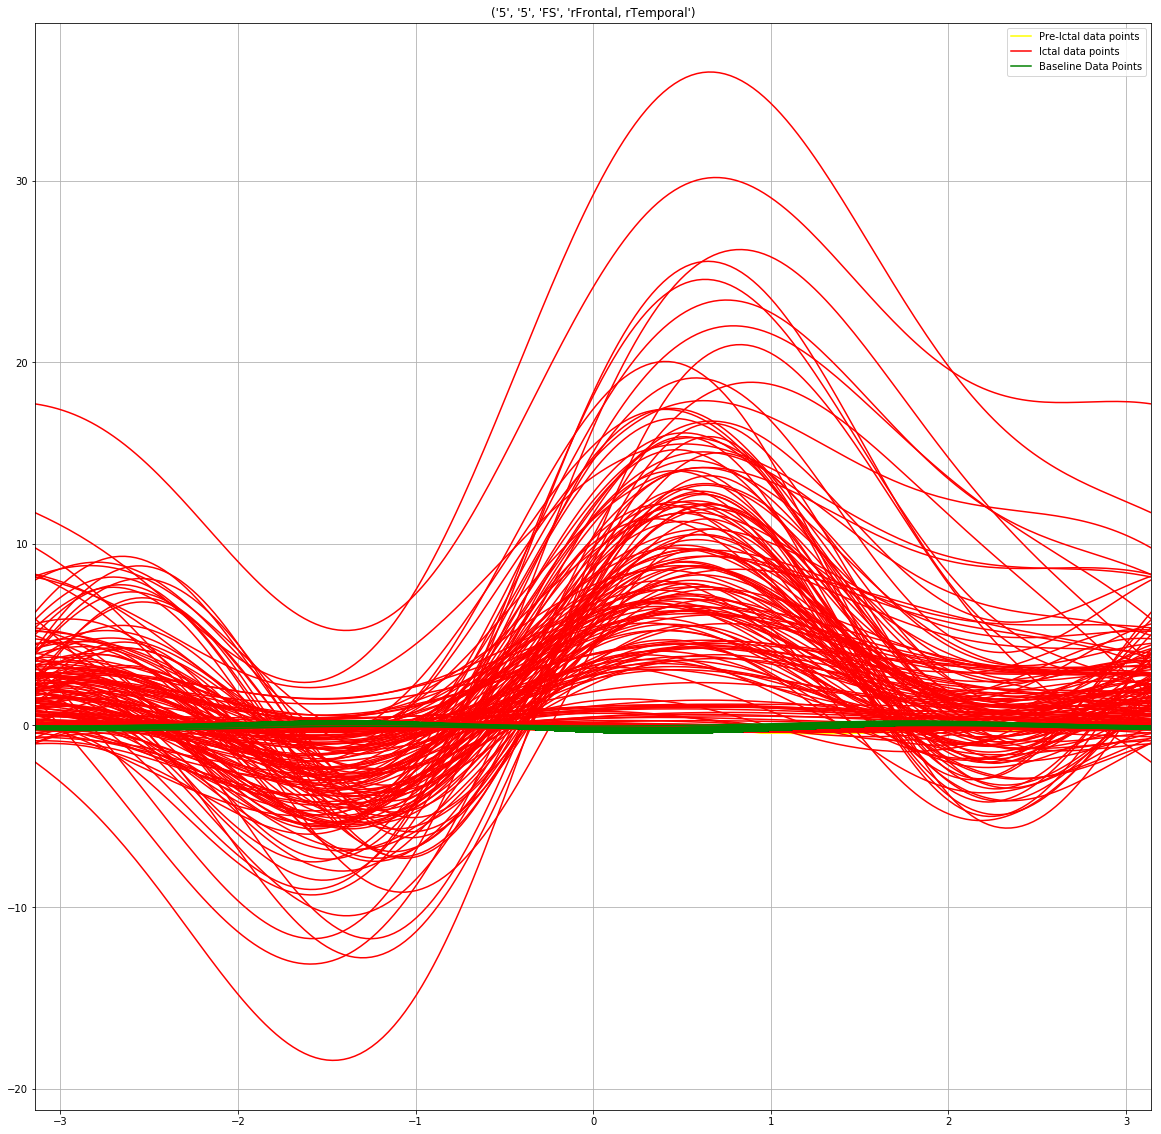

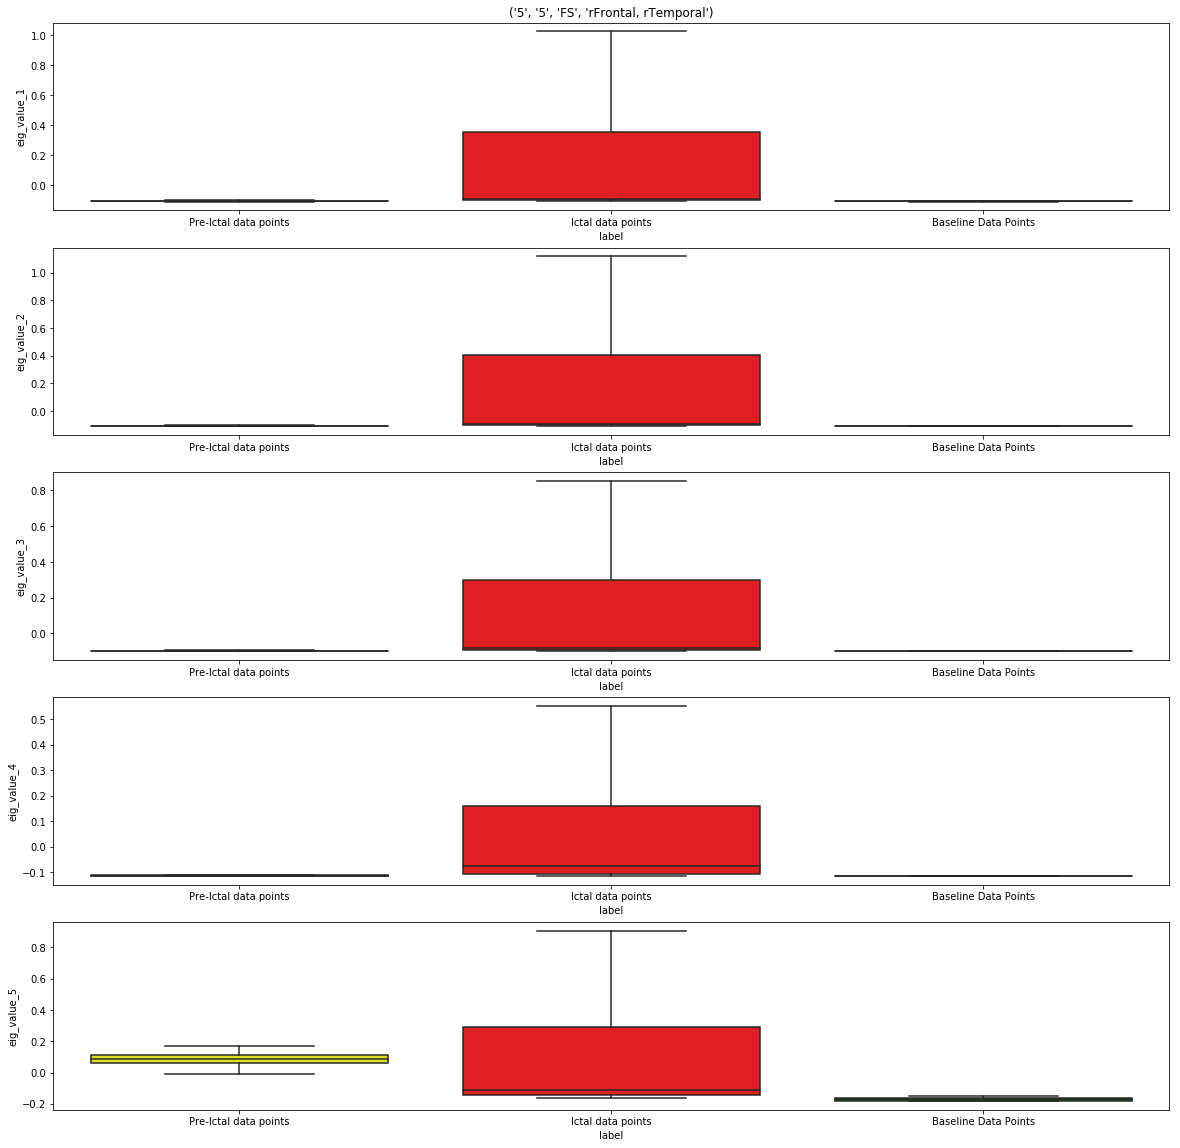

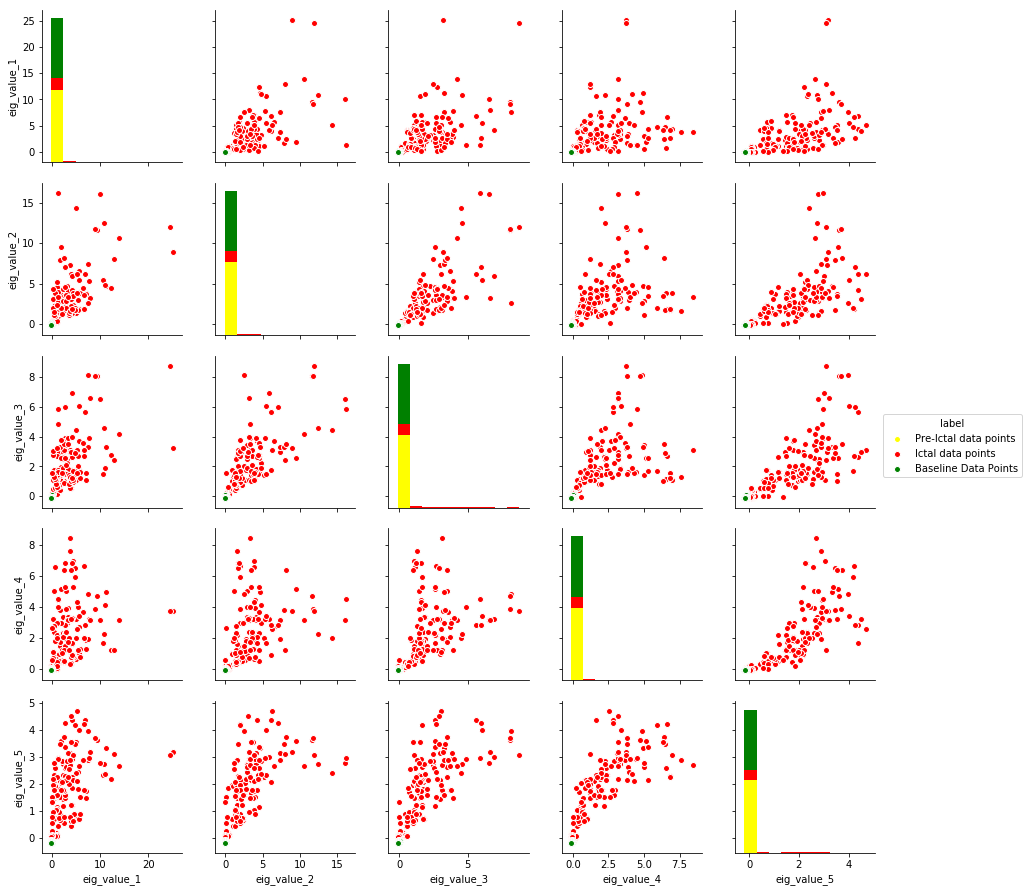

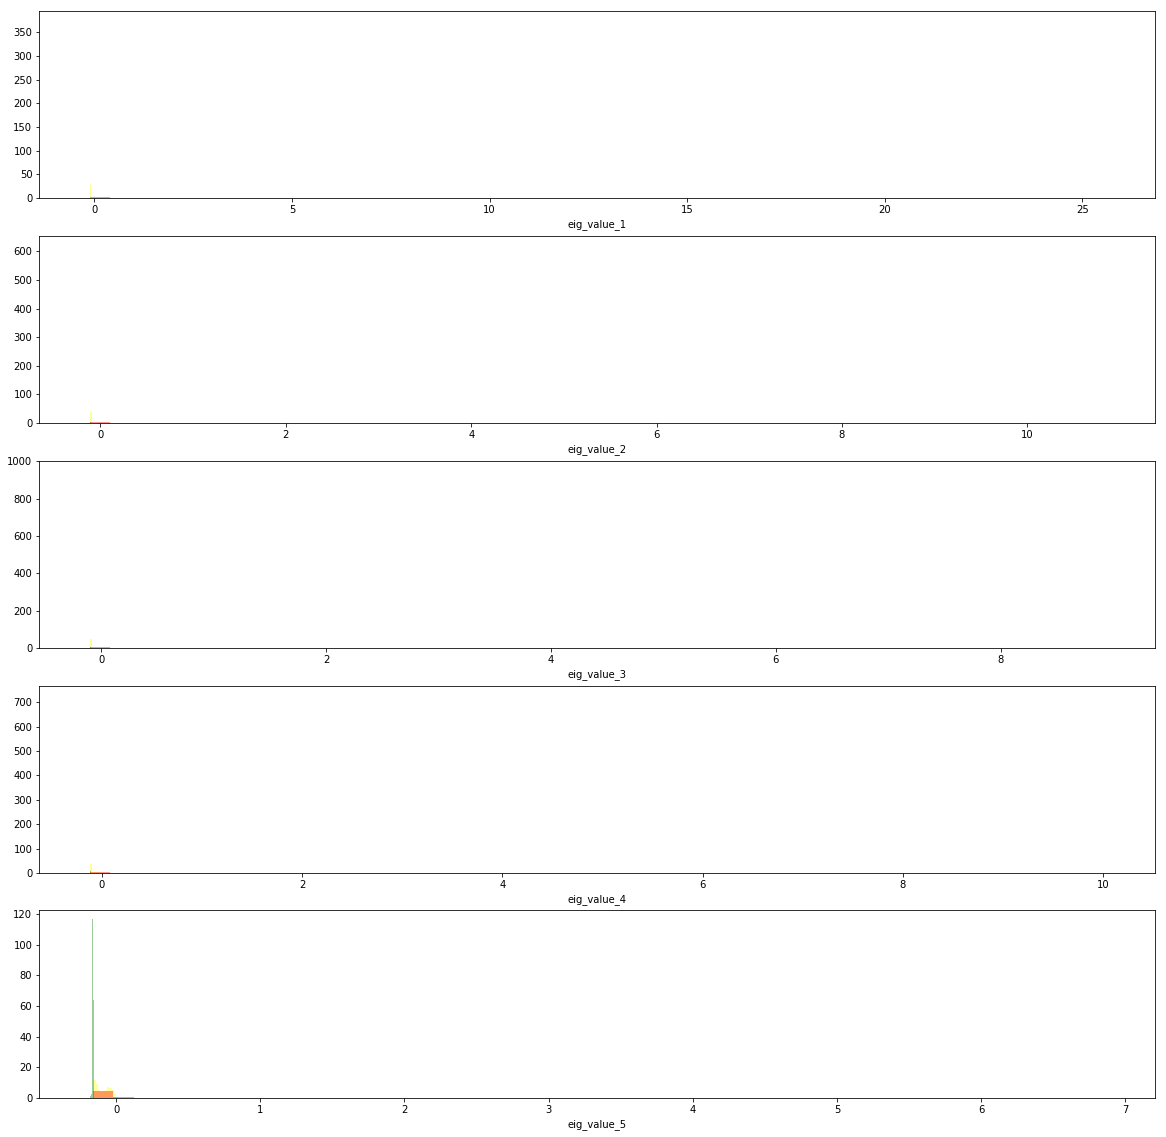

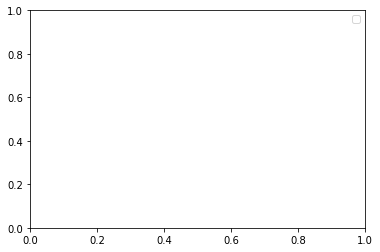

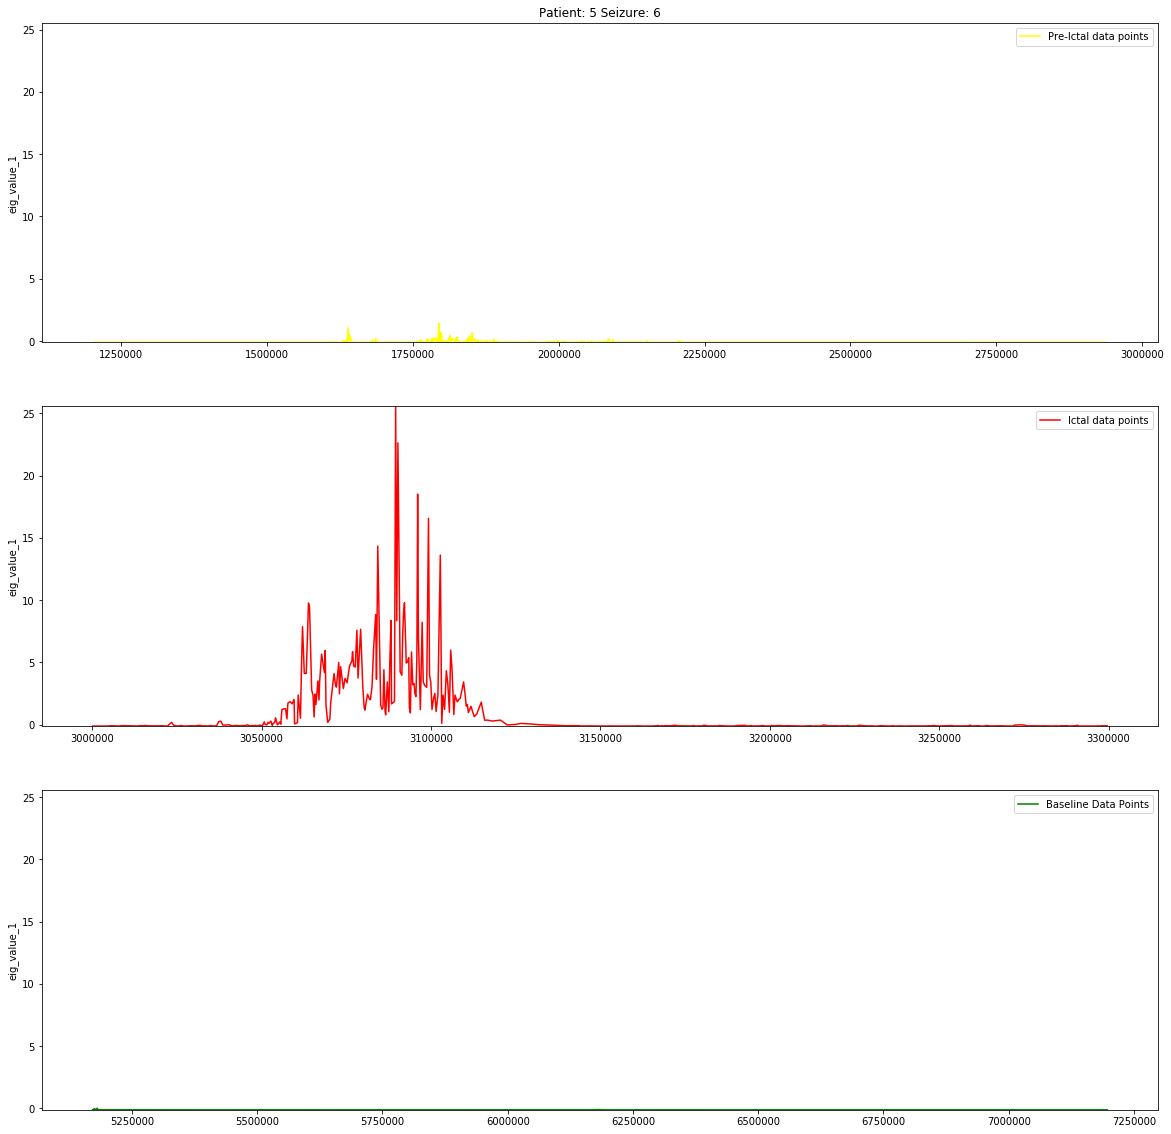

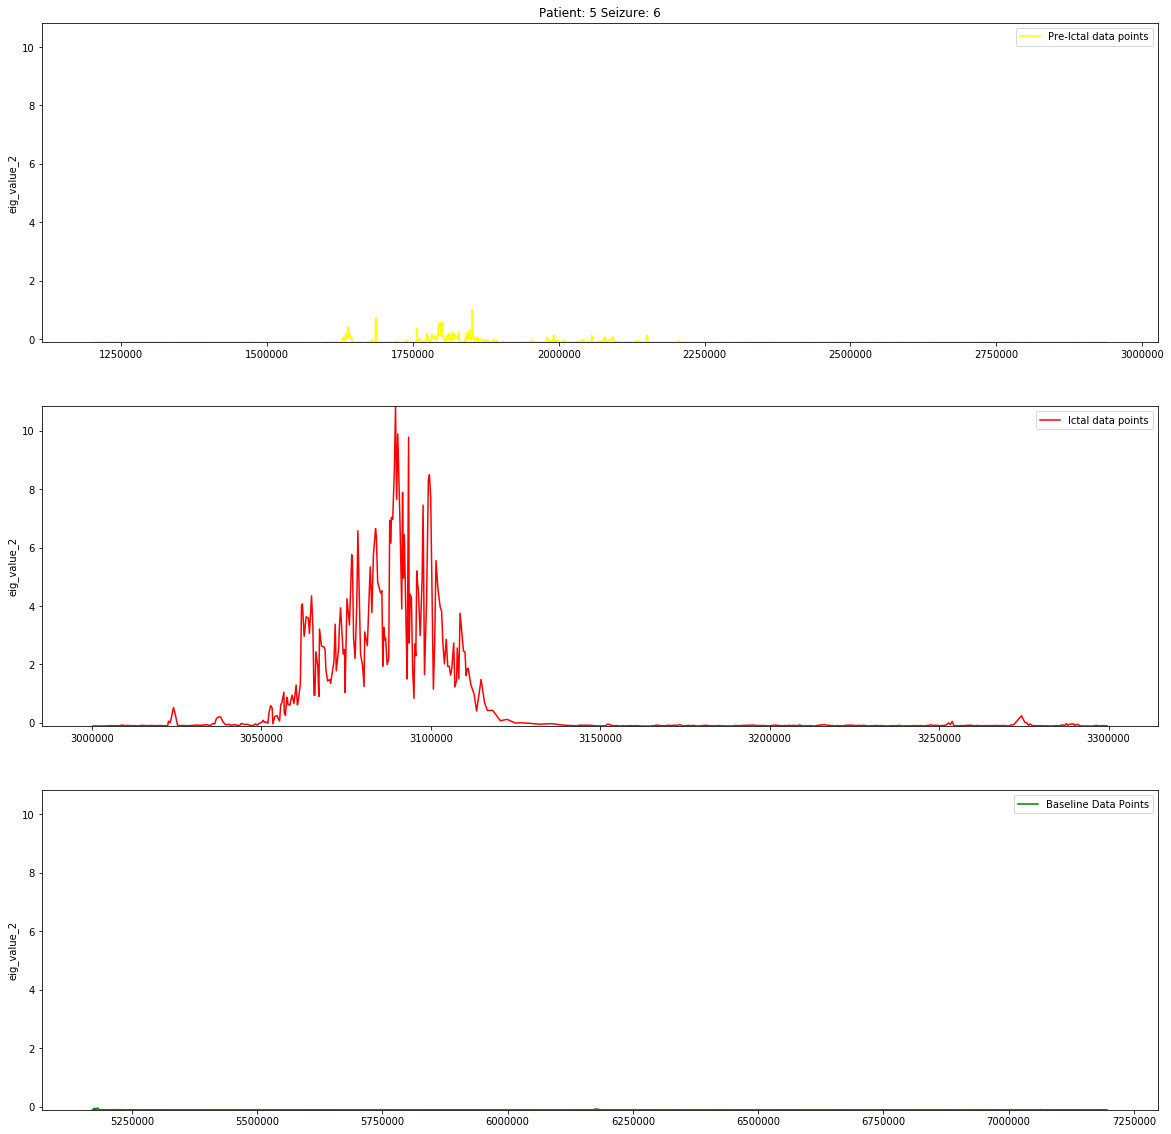

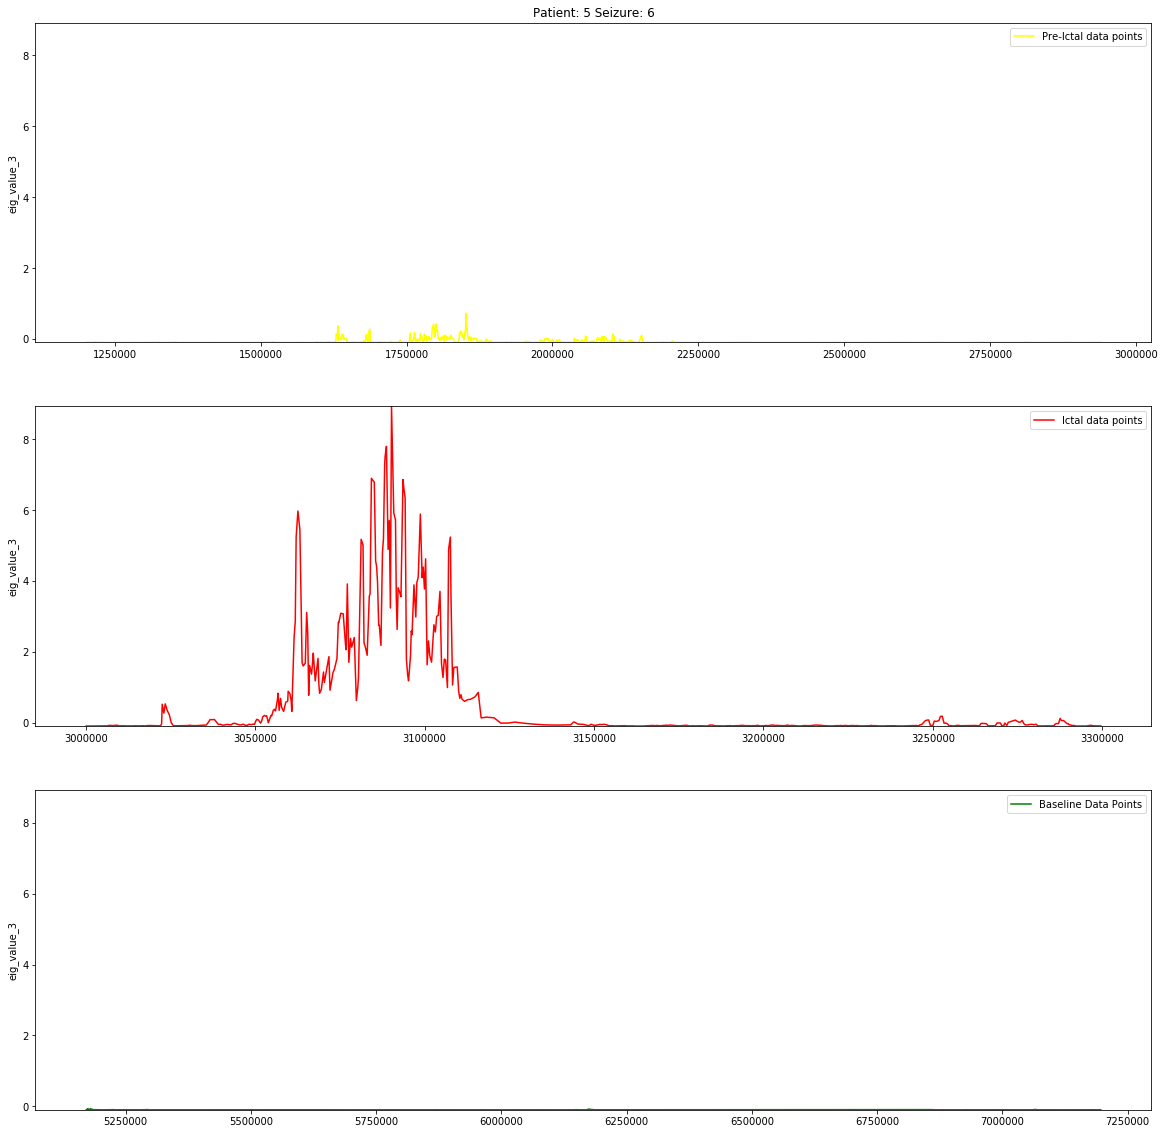

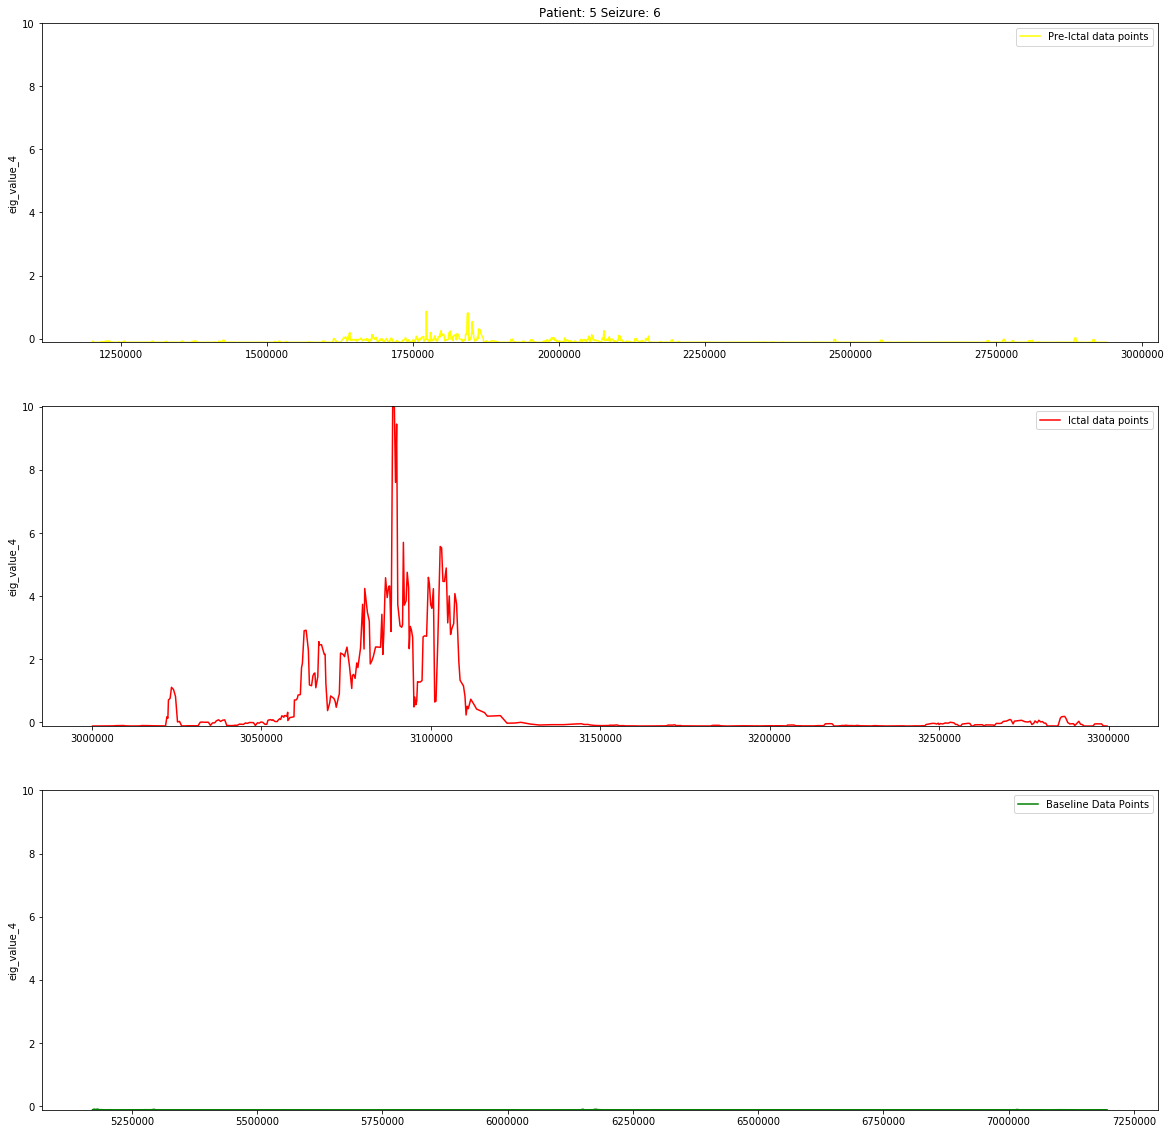

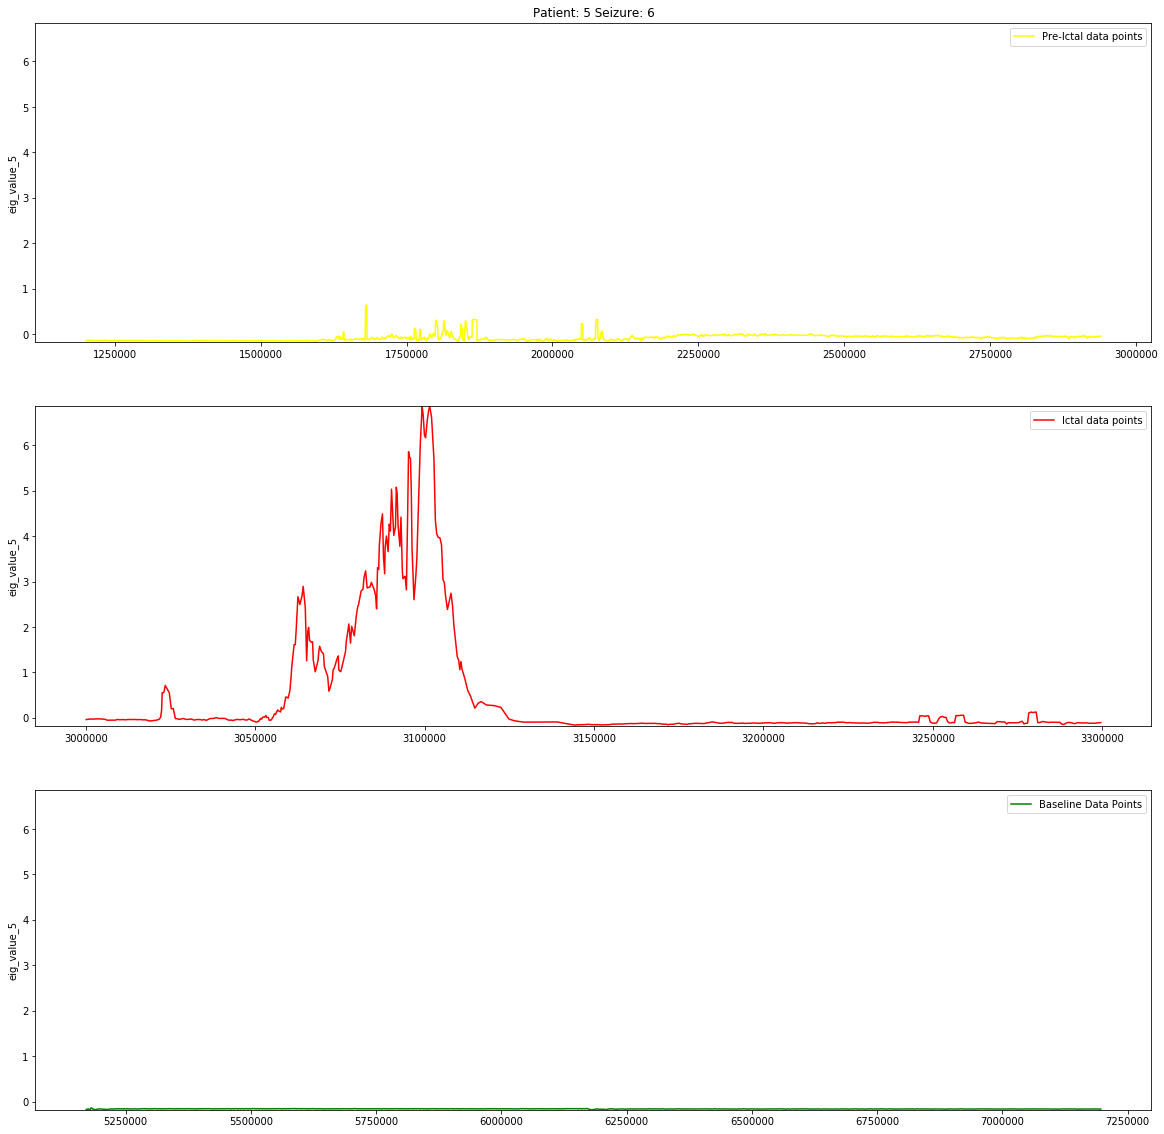

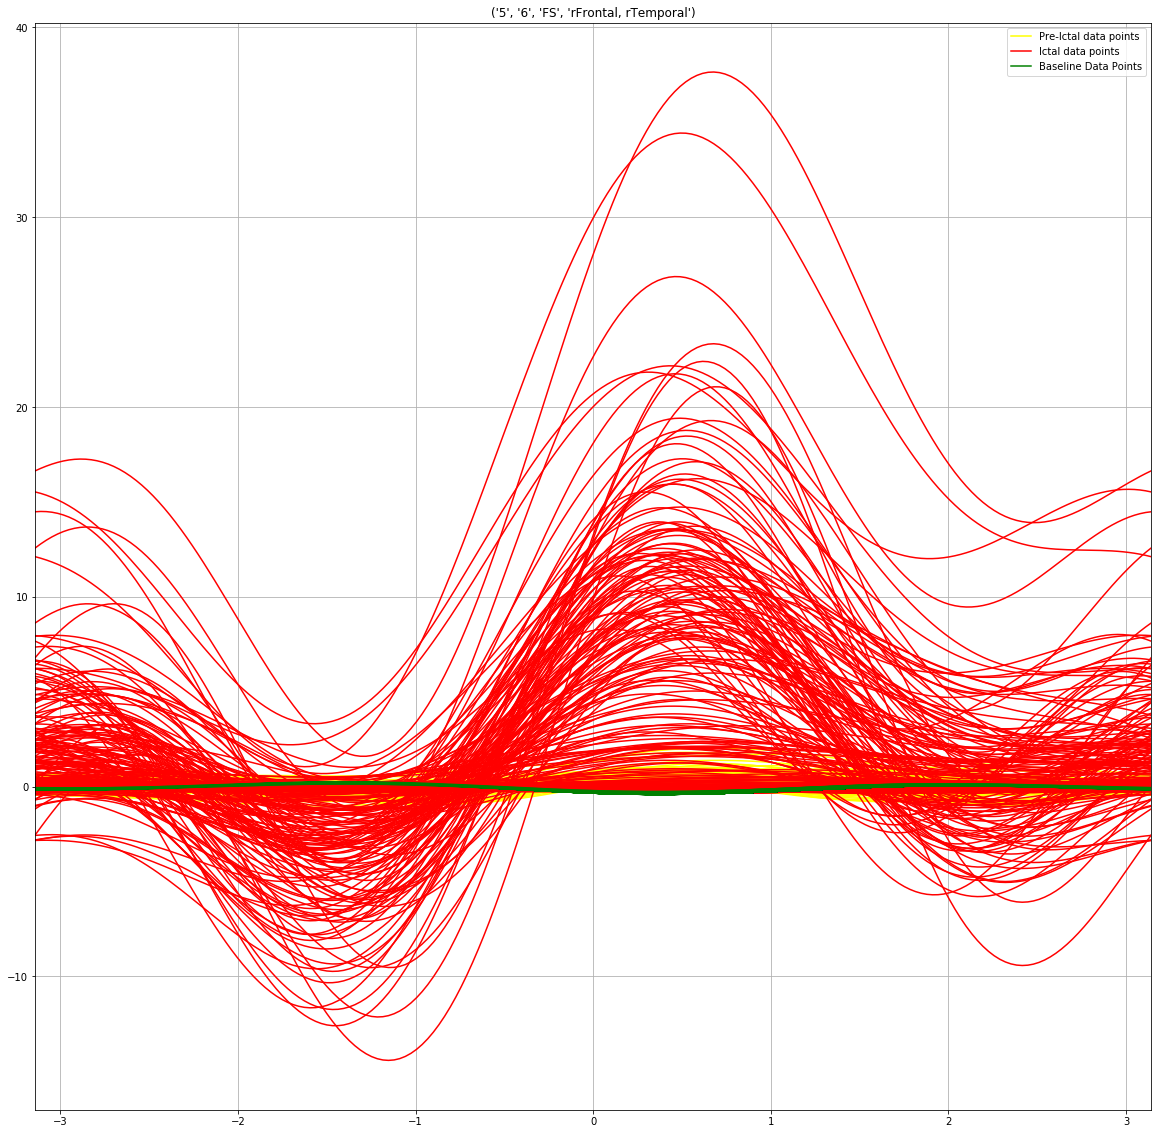

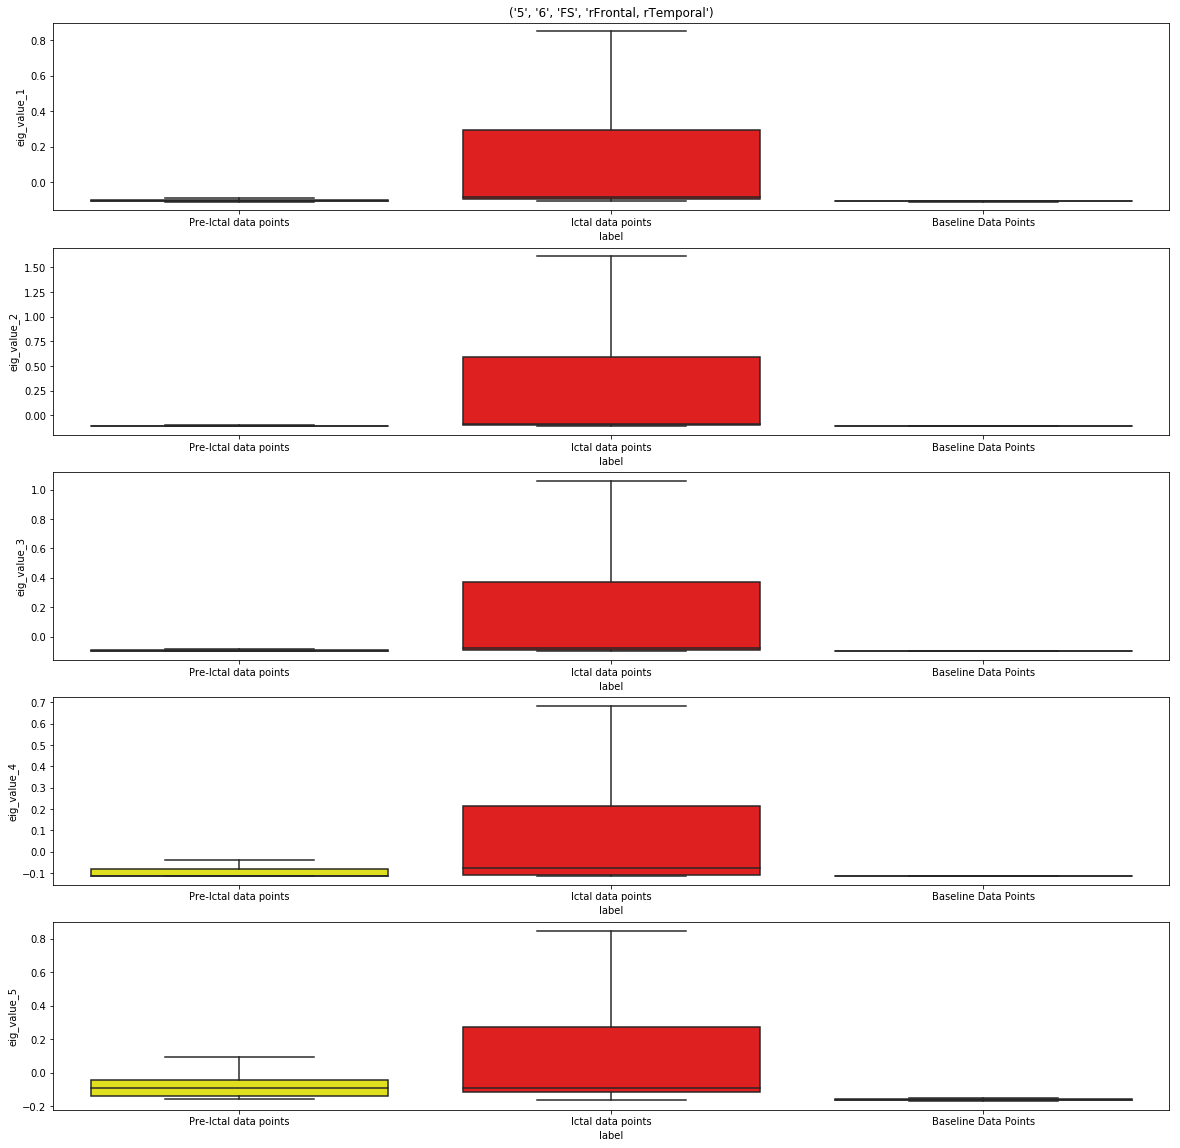

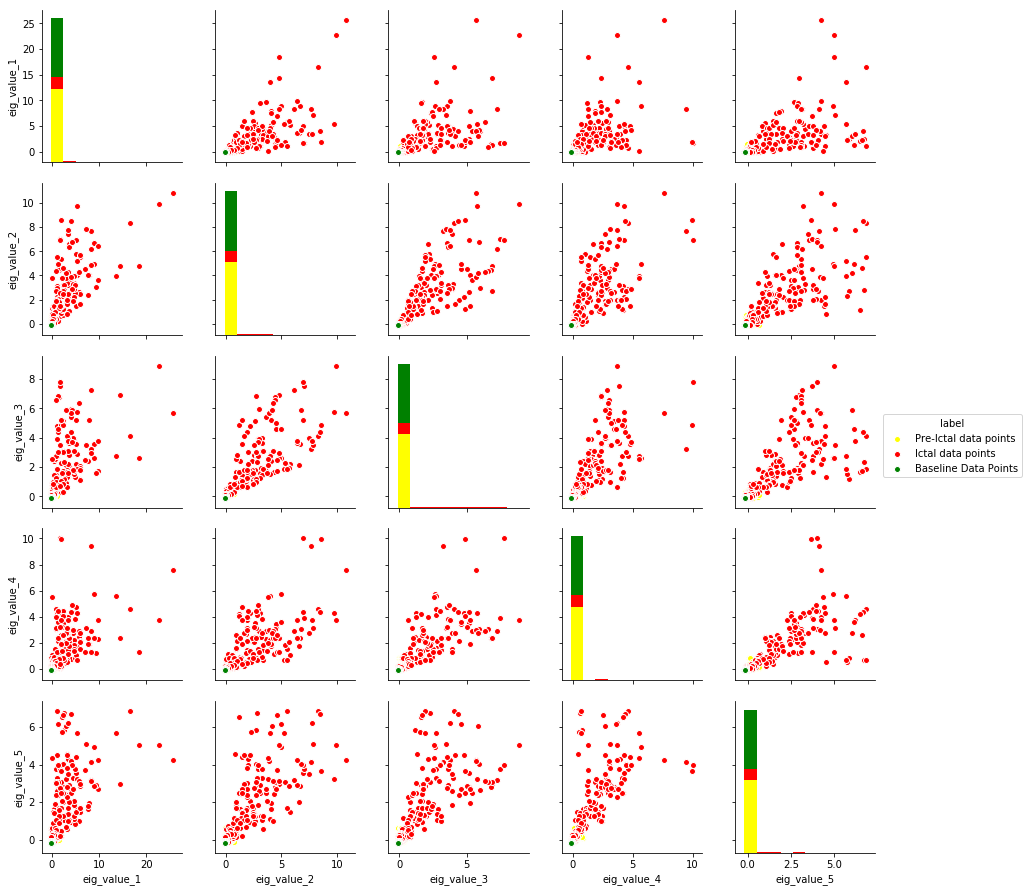

In [12]:

import classification.eda.hist as plt_hist
import classification.eda.andrews as plt_and
import classification.eda.series as plt_ts
import classification.eda.box as plt_box
import classification.eda.scatter as plt_sc
import matplotlib.pyplot as plt


    
if plot_eda_all_new:

    for data_patient_seizure in data_groups_list:

        if flag_hist:
            plt_hist.histogram(path_to_save,
                                    data_patient_seizure[1],
                                    data_patient_seizure[0],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color',
                                     bins=hist_bins,
                                     dist=dist)


        if flag_series:
            plt_ts.time_series_plot(path_to_save, data_patient_seizure[1],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color')
        if flag_andrews:
            plt_and.andrews_curves(path_to_save,
                                    data_patient_seizure[1],
                                    data_patient_seizure[0],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color')
        if flag_box:
            plt_box.box_plot(path_to_save,
                            data_patient_seizure[1],
                            data_patient_seizure[0],
                            features,
                            'time_sample',
                            'patient_nr',
                            'seizure_nr',
                            'label',
                            'color')

        if flag_pair:

            plt_sc.pair_plot(path_to_save,
                            data_patient_seizure[1],
                            data_patient_seizure[0],
                            features,
                            'time_sample',
                            'patient_nr',
                            'seizure_nr',
                            'label',
                            'color')
            
else:
    import os
    from IPython.display import Image
    a = [name for name in os.listdir(path_to_save) if name.endswith(".png")]
    for image in a:
        display(Image(filename=path_to_save + image))
    
    

In [13]:
import classification.cross_validation as cv

# ***********************************Learning****************************
# Learn from data_struct using nested cross_validation
# learninig is an optimization and respective test results
# for each partition of the dataset according to cv_out


# prepare data for classification - watch out for memory concerns
X = data[features]
y = data[label]
groups = data[group_id]

learning_results = cv.nested_cross_validation(path_to_save,
                                       X,y, groups,
                                       pipe,
                                       param_grid, scoring,
                                       compute_all_new, cv_out, cv_in,
                                       search_function)
#************************************************************************
groups = data_groups.groups.keys()

for learning_result, group in zip(learning_results, groups):
        learning_result['group'] = group
        
cv_object = learning_results

cv.generate_classification_report(cv_object)



Fitting 6 folds for each of 256 candidates, totalling 1536 fits


/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import itertools

if hyper_param_heat:
    for clf, test in learning_results:
        print clf.best_estimator_
        cv_results = clf.cv_results_
        keys = cv_results.keys()

        for grid in param_grid:
            estimator_params = [key 
                                for key in grid.keys()
                                if 'estimator' in key]
            print estimator_params
            param_bi_comb = itertools.combinations(estimator_params, r=2)

            for bi_comb in param_bi_comb:

                for key in keys:

                    if 'param' not in key and 'rank' not in key:
                        metric = cv_results[key]
                        df = metric.reshape(len([2**i for i in xrange(-5, 11)]), len([2**i for i in xrange(-15, 1)]))

                        #df = pd.DataFrame(df, columns=[str(2**i) for i in xrange(-15, 1)])
                        #df['ix'] = [str(2**i) for i in xrange(-5, 11)]
                        #df.set_index('ix')

                        plt.figure()
                        sns.heatmap(df,
                                    xticklabels=[2**i for i in xrange(-5, 11)],
                                    yticklabels=[2**i for i in xrange(-15, 1)],
                                    cbar_kws={'label': key},
                                   )
                        plt.title(key)
                        plt.xlabel(bi_comb[0])
                        plt.ylabel(bi_comb[1])
                        #plt.savefig(path_to_save + '/' + key)
                        plt.show()
                        
hyper_param_list=False                        
if hyper_param_list:
    for learning_result in learning_results:

        cv_results = learning_result['cv_results']
        keys = list(cv_results.keys())
        print keys
        
        for grid in param_grid:
            params = grid.keys()
            print params
            for param in params:
                
                key_param_variation = keys[keys.index('param_' + param)]
                param_variation = cv_results[key_param_variation]
                
                print param_variation
                stop
                
                

        

In [ ]:
from classification.cross_validation import *

In [ ]:
report = generate_classification_report(cv_object)
report.to_hdf(path_to_save + 'classification_resport.h5', '/report' )

pd.read_hdf(path_to_save + 'classification_resport.h5', '/report' )

In [ ]:
string = report.to_latex()
print string.replace('\_', " ")

In [ ]:
import numpy as np
import pandas as pd
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
s = pd.DataFrame(np.random.randn(8, 4), index=arrays)
s


In [ ]:
print s.to_latex()

In [ ]:
del classification_report

In [ ]:
best_params

In [ ]:
learning_results